<a href="https://colab.research.google.com/github/MillicentOmondi/ml/blob/main/Copy_of_Millicent_Omondi_Theses_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOME INSURANCE PRICE PREDICTION USING MACHINE LEARNING
## Internship project

In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(color_codes=True)
plt.style.use('fivethirtyeight')

In [ ]:
#pip install yellowbrick
#Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier.

In [ ]:
from yellowbrick.style import set_palette
set_palette('flatui')

In [ ]:
#Read the data set
df = pd.read_csv('home_insurance.csv')

In [ ]:
#View the first five rows
df.head()

,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,P1_PT_EMP_STATUS,BUS_USE,CLERICAL,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,...,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,MTA_FAP,MTA_APRP,MTA_DATE,LAST_ANN_PREM_GROSS,POL_STATUS,i,Police
0,11/22/2007,22/11/2007,N,R,NaN,N,NaN,Y,19.0,1000000.0,...,N,N,N,NaN,NaN,NaN,274.81,Lapsed,1,P000001
1,11/22/2007,01/01/2008,N,E,NaN,Y,N,Y,25.0,1000000.0,...,N,N,Y,308.83,-9.27,NaN,308.83,Live,2,P000002
2,11/23/2007,23/11/2007,N,E,NaN,N,NaN,N,NaN,0.0,...,N,N,Y,52.65,52.65,03/11/2010,52.65,Live,3,P000003
3,11/23/2007,12/12/2007,N,R,NaN,N,NaN,N,NaN,0.0,...,N,N,N,NaN,NaN,NaN,54.23,Live,4,P000004
4,11/22/2007,15/12/2007,N,R,NaN,N,NaN,Y,5.0,1000000.0,...,N,N,N,NaN,NaN,NaN,244.58,Live,5,P000005


In [ ]:
#View the last five rows
df.tail()

,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,P1_PT_EMP_STATUS,BUS_USE,CLERICAL,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,...,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,MTA_FAP,MTA_APRP,MTA_DATE,LAST_ANN_PREM_GROSS,POL_STATUS,i,Police
256131,NaN,22/02/2005,Y,R,NaN,N,NaN,Y,16.0,1000000.0,...,N,N,N,NaN,NaN,NaN,235.08,Lapsed,256132,P256132
256132,NaN,01/12/2000,N,R,NaN,N,NaN,Y,0.0,1000000.0,...,N,N,Y,194.02,194.02,01/12/2010,194.02,Live,256133,P256133
256133,NaN,18/01/2006,N,R,NaN,N,NaN,Y,1.0,1000000.0,...,N,N,N,NaN,NaN,NaN,287.30,Live,256134,P256134
256134,NaN,31/12/2004,N,R,NaN,N,NaN,Y,32.0,1000000.0,...,N,N,N,NaN,NaN,NaN,457.57,Lapsed,256135,P256135
256135,NaN,09/12/2006,N,R,NaN,N,NaN,Y,9.0,1000000.0,...,N,N,N,NaN,NaN,NaN,186.22,Live,256136,P256136


In [ ]:
#Shape of the data set
df.shape

(256136, 66)

We observe that the data set has 256,136 rows with 66 columns.

The last_ann_prem_gross is our target variable.

In [ ]:
#To get more information on the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256136 entries, 0 to 256135
Data columns (total 66 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   QUOTE_DATE              129524 non-null  object 
 1   COVER_START             189021 non-null  object 
 2   CLAIM3YEARS             190039 non-null  object 
 3   P1_EMP_STATUS           189021 non-null  object 
 4   P1_PT_EMP_STATUS        1782 non-null    object 
 5   BUS_USE                 189021 non-null  object 
 6   CLERICAL                2944 non-null    object 
 7   AD_BUILDINGS            189021 non-null  object 
 8   RISK_RATED_AREA_B       140876 non-null  float64
 9   SUM_INSURED_BUILDINGS   189021 non-null  float64
 10  NCD_GRANTED_YEARS_B     189021 non-null  float64
 11  AD_CONTENTS             189021 non-null  object 
 12  RISK_RATED_AREA_C       180290 non-null  float64
 13  SUM_INSURED_CONTENTS    189021 non-null  float64
 14  NCD_GRANTED_YEARS_C 

We observe that some of the variables have some missing values.

We have foats, objects and integers.

In [ ]:
#We check for column names
df.columns.values

array(['QUOTE_DATE', 'COVER_START', 'CLAIM3YEARS', 'P1_EMP_STATUS',
       'P1_PT_EMP_STATUS', 'BUS_USE', 'CLERICAL', 'AD_BUILDINGS',
       'RISK_RATED_AREA_B', 'SUM_INSURED_BUILDINGS',
       'NCD_GRANTED_YEARS_B', 'AD_CONTENTS', 'RISK_RATED_AREA_C',
       'SUM_INSURED_CONTENTS', 'NCD_GRANTED_YEARS_C', 'CONTENTS_COVER',
       'BUILDINGS_COVER', 'SPEC_SUM_INSURED', 'SPEC_ITEM_PREM',
       'UNSPEC_HRP_PREM', 'P1_DOB', 'P1_MAR_STATUS', 'P1_POLICY_REFUSED',
       'P1_SEX', 'APPR_ALARM', 'APPR_LOCKS', 'BEDROOMS',
       'ROOF_CONSTRUCTION', 'WALL_CONSTRUCTION', 'FLOODING', 'LISTED',
       'MAX_DAYS_UNOCC', 'NEIGH_WATCH', 'OCC_STATUS', 'OWNERSHIP_TYPE',
       'PAYING_GUESTS', 'PROP_TYPE', 'SAFE_INSTALLED', 'SEC_DISC_REQ',
       'SUBSIDENCE', 'YEARBUILT', 'CAMPAIGN_DESC', 'PAYMENT_METHOD',
       'PAYMENT_FREQUENCY', 'LEGAL_ADDON_PRE_REN', 'LEGAL_ADDON_POST_REN',
       'HOME_EM_ADDON_PRE_REN', 'HOME_EM_ADDON_POST_REN',
       'GARDEN_ADDON_PRE_REN', 'GARDEN_ADDON_POST_REN',
       '

In [ ]:
#Checking for categorical and numerical columns
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("sum of cat_variables:",len(cat_cols))
print("Numerical Variables:")
print(num_cols)
print("sum of numerical_variables:",len(num_cols))

Categorical Variables:
Index(['QUOTE_DATE', 'COVER_START', 'CLAIM3YEARS', 'P1_EMP_STATUS',
       'P1_PT_EMP_STATUS', 'BUS_USE', 'CLERICAL', 'AD_BUILDINGS',
       'AD_CONTENTS', 'CONTENTS_COVER', 'BUILDINGS_COVER', 'P1_DOB',
       'P1_MAR_STATUS', 'P1_POLICY_REFUSED', 'P1_SEX', 'APPR_ALARM',
       'APPR_LOCKS', 'FLOODING', 'NEIGH_WATCH', 'OCC_STATUS', 'SAFE_INSTALLED',
       'SEC_DISC_REQ', 'SUBSIDENCE', 'PAYMENT_METHOD', 'LEGAL_ADDON_PRE_REN',
       'LEGAL_ADDON_POST_REN', 'HOME_EM_ADDON_PRE_REN',
       'HOME_EM_ADDON_POST_REN', 'GARDEN_ADDON_PRE_REN',
       'GARDEN_ADDON_POST_REN', 'KEYCARE_ADDON_PRE_REN',
       'KEYCARE_ADDON_POST_REN', 'HP1_ADDON_PRE_REN', 'HP1_ADDON_POST_REN',
       'HP2_ADDON_PRE_REN', 'HP2_ADDON_POST_REN', 'HP3_ADDON_PRE_REN',
       'HP3_ADDON_POST_REN', 'MTA_FLAG', 'MTA_DATE', 'POL_STATUS', 'Police'],
      dtype='object')
sum of cat_variables: 42
Numerical Variables:
['RISK_RATED_AREA_B', 'SUM_INSURED_BUILDINGS', 'NCD_GRANTED_YEARS_B', 'RISK_RATED_AR

We have 42 categorical variables and 24 numerical variables.

In [ ]:
#Getting statistical information regarding the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RISK_RATED_AREA_B,140876.0,10.274440,8.449942,0.00,3.00,9.000,14.0000,98.00
SUM_INSURED_BUILDINGS,189021.0,778130.472276,415504.938301,0.00,1000000.00,1000000.000,1000000.0000,1000000.00
NCD_GRANTED_YEARS_B,189021.0,4.477132,2.677538,0.00,3.00,6.000,6.0000,9.00
RISK_RATED_AREA_C,180290.0,9.055649,7.624659,0.00,3.00,7.000,13.0000,98.00
SUM_INSURED_CONTENTS,189021.0,47836.219256,10706.355022,0.00,50000.00,50000.000,50000.0000,100000.00
NCD_GRANTED_YEARS_C,189021.0,5.497336,1.777452,0.00,6.00,6.000,6.0000,9.00
SPEC_SUM_INSURED,189021.0,329.517122,1333.646192,0.00,0.00,0.000,0.0000,47500.00
SPEC_ITEM_PREM,189021.0,2.507135,10.666524,0.00,0.00,0.000,0.0000,973.53
UNSPEC_HRP_PREM,189021.0,5.653579,10.254535,0.00,0.00,0.000,12.4500,162.61
BEDROOMS,189021.0,2.779712,0.801433,1.00,2.00,3.000,3.0000,7.00


## **Data Preprocessing**

Now that we have an overview of the dataset, we proceed to preprocessing it so as to have it in the right form.

### We check for duplicate values

In [ ]:
df.duplicated().sum()

0

We have observed that there are no duplicates.

### Checking for missing values

In [ ]:
#Check for missing values
df.isnull().values.sum()

5508531

There are 5,508,531 missing values in the dataset, that is, in both rows and columns.

In [ ]:
#Number and percentage of missing values according to columns
{col: [df[col].isnull().sum(),f'% {np.round(np.mean(df[col].isnull()*100),)}'
] for col in df.columns if df[col].isnull().any()}

{'QUOTE_DATE': [126612, '% 49.0'],
 'COVER_START': [67115, '% 26.0'],
 'CLAIM3YEARS': [66097, '% 26.0'],
 'P1_EMP_STATUS': [67115, '% 26.0'],
 'P1_PT_EMP_STATUS': [254354, '% 99.0'],
 'BUS_USE': [67115, '% 26.0'],
 'CLERICAL': [253192, '% 99.0'],
 'AD_BUILDINGS': [67115, '% 26.0'],
 'RISK_RATED_AREA_B': [115260, '% 45.0'],
 'SUM_INSURED_BUILDINGS': [67115, '% 26.0'],
 'NCD_GRANTED_YEARS_B': [67115, '% 26.0'],
 'AD_CONTENTS': [67115, '% 26.0'],
 'RISK_RATED_AREA_C': [75846, '% 30.0'],
 'SUM_INSURED_CONTENTS': [67115, '% 26.0'],
 'NCD_GRANTED_YEARS_C': [67115, '% 26.0'],
 'CONTENTS_COVER': [67115, '% 26.0'],
 'BUILDINGS_COVER': [67115, '% 26.0'],
 'SPEC_SUM_INSURED': [67115, '% 26.0'],
 'SPEC_ITEM_PREM': [67115, '% 26.0'],
 'UNSPEC_HRP_PREM': [67115, '% 26.0'],
 'P1_DOB': [67115, '% 26.0'],
 'P1_MAR_STATUS': [67115, '% 26.0'],
 'P1_POLICY_REFUSED': [67115, '% 26.0'],
 'P1_SEX': [67115, '% 26.0'],
 'APPR_ALARM': [67115, '% 26.0'],
 'APPR_LOCKS': [67115, '% 26.0'],
 'BEDROOMS': [67115, '% 

We see that some have over 90% of missing values.

Let's create a bar graph to give a better visualisation of the missing values.

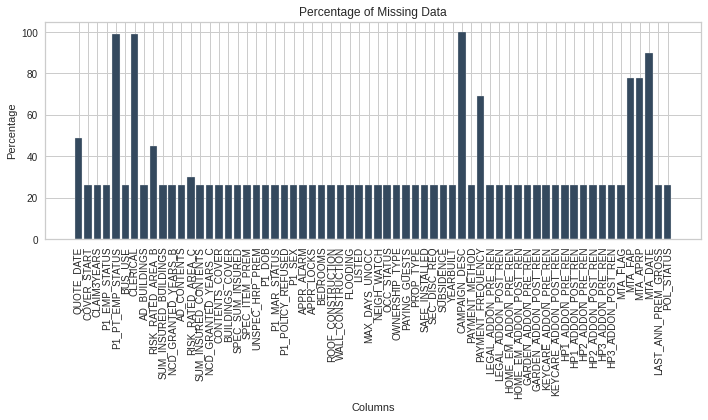

In [ ]:
# Code to calculate missing values
missing_data = {col: [df[col].isnull().sum(), f'% {np.round(np.mean(df[col].isnull()*100))}']
                for col in df.columns if df[col].isnull().any()}

# Extracting column names and corresponding missing percentages
columns = list(missing_data.keys())
percentages = [float(value[1].strip('% ')) for value in missing_data.values()]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(columns, percentages)

# Customizing the plot
plt.title('Percentage of Missing Data')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

# Displaying the plot
plt.tight_layout()
plt.show()

### Seaborn heatmap to visualize missing values.

We can also use a heatmap to visualize the missing values.

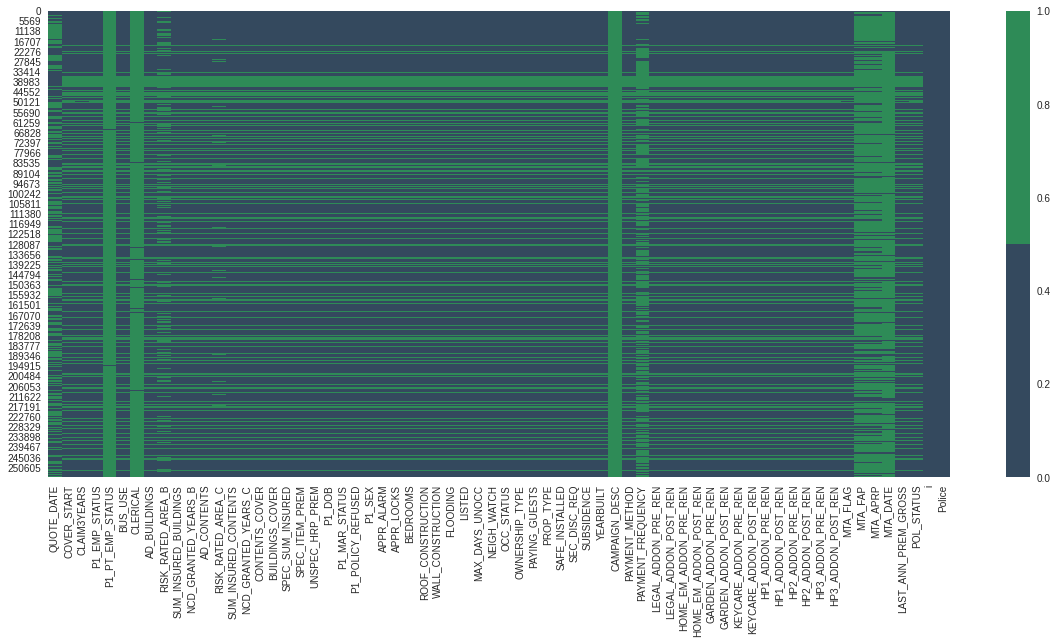

In [ ]:
plt.figure(figsize=(18,8))

colours = ['#34495E','seagreen']
sns.heatmap(df.isnull(),cmap=sns.color_palette(colours))
plt.savefig('missingValues_HeatMap_plot.png')

### Using missingno library to visualize the missing values.

In [ ]:
#We intall the missingno library to visualize the missing data values.
#pip install missingno

In [ ]:
#Missingno library helps to visualize missing data in a data set columnwise.
#It shows the size of available data per column.
import missingno as msno

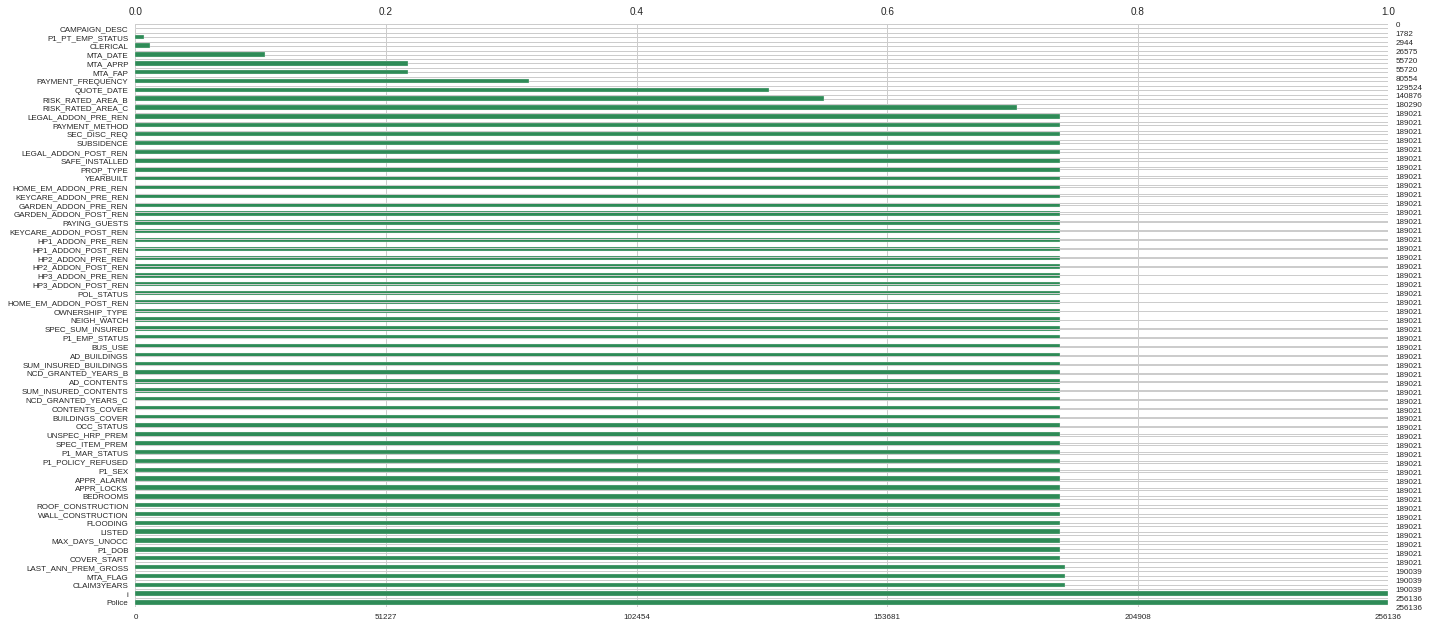

In [ ]:
msno.bar(df,figsize=(20,10), fontsize=8,color ='seagreen',log=False, sort="descending")
plt.savefig('missingValues2_plot.png')

From both the bar graph and heatmap, we observe that the CAMPAIGN DESC column is empty, indicating a complete lack of data in this property. Furthermore, both P1_PT_EMP_STATUS and CLERICAL have a restricted amount of available data points, with an abscence rate of 99%. Similarly, the MTA_DATE, and MTA_APRP and MTA_FAP columns show a relatively low presence of data, with rates of 90% and 78%, respectively.
With this,we proceed by dropping these columns.

# **Dropping Columns with a huge percentage of missing values**

In [ ]:
df2 = df.drop(['CAMPAIGN_DESC','MTA_DATE','CLERICAL','P1_PT_EMP_STATUS','MTA_FAP','MTA_APRP'],axis=1)

We dropped columns with missing values ranging from 78% to 100%.

In [ ]:
df2.shape

(256136, 60)

Now we have 256136 rows with 60 columns.

### **Dropping rows with missing values per column**

After careful observation, it has come to our attention that a significant portion of the columns in our dataset consists of missing values, specifically amounting to 26%. In order to address this issue, we decided to remove the rows based on the 'BEDROOMS' column. It was noticed that the 'BEDROOMS' column exhibited the same 26% missing value pattern as the other columns. Therefore, we made the assumption that these rows corresponded to each respective column. To verify this, we proceeded to examine the data, and indeed, it was confirmed that the 'BEDROOMS' column aligned consistently with the other columns.

In [ ]:
# Drop the rows that has NaN or missing value in it based on the specific column
df3 = df2.dropna(subset=['BEDROOMS'])

In [ ]:
df3.shape

(189021, 60)

We have remained with 189,021 rows and 60 columns.

In [ ]:
df3.head()

,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,BUS_USE,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,...,HP1_ADDON_POST_REN,HP2_ADDON_PRE_REN,HP2_ADDON_POST_REN,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,LAST_ANN_PREM_GROSS,POL_STATUS,i,Police
0,11/22/2007,22/11/2007,N,R,N,Y,19.0,1000000.0,7.0,Y,...,N,N,N,N,N,N,274.81,Lapsed,1,P000001
1,11/22/2007,01/01/2008,N,E,Y,Y,25.0,1000000.0,6.0,Y,...,N,N,N,N,N,Y,308.83,Live,2,P000002
2,11/23/2007,23/11/2007,N,E,N,N,NaN,0.0,0.0,Y,...,N,N,N,N,N,Y,52.65,Live,3,P000003
3,11/23/2007,12/12/2007,N,R,N,N,NaN,0.0,0.0,Y,...,N,N,N,N,N,N,54.23,Live,4,P000004
4,11/22/2007,15/12/2007,N,R,N,Y,5.0,1000000.0,7.0,Y,...,N,N,N,N,N,N,244.58,Live,5,P000005


In [ ]:
df3.isnull().sum()

QUOTE_DATE                109877
COVER_START                    0
CLAIM3YEARS                    0
P1_EMP_STATUS                  0
BUS_USE                        0
AD_BUILDINGS                   0
RISK_RATED_AREA_B          48145
SUM_INSURED_BUILDINGS          0
NCD_GRANTED_YEARS_B            0
AD_CONTENTS                    0
RISK_RATED_AREA_C           8731
SUM_INSURED_CONTENTS           0
NCD_GRANTED_YEARS_C            0
CONTENTS_COVER                 0
BUILDINGS_COVER                0
SPEC_SUM_INSURED               0
SPEC_ITEM_PREM                 0
UNSPEC_HRP_PREM                0
P1_DOB                         0
P1_MAR_STATUS                  0
P1_POLICY_REFUSED              0
P1_SEX                         0
APPR_ALARM                     0
APPR_LOCKS                     0
BEDROOMS                       0
ROOF_CONSTRUCTION              0
WALL_CONSTRUCTION              0
FLOODING                       0
LISTED                         0
MAX_DAYS_UNOCC                 0
NEIGH_WATC

We now observe that we only have 3 columns with missing values.
We look at the percentage of the missing values.

In [ ]:
#Number and percentage of missing values according to columns
pd.DataFrame({col: [df3[col].isnull().sum(),f'% {np.round(np.mean(df3[col].isnull()*100),)}'
] for col in df3.columns if df3[col].isnull().any()})

,QUOTE_DATE,RISK_RATED_AREA_B,RISK_RATED_AREA_C,PAYMENT_FREQUENCY
0,109877,48145,8731,108467
1,% 58.0,% 25.0,% 5.0,% 57.0


We observe that 'QUOTE DATE' has 58% of miising values.
It will be difficult to impute dates so we ended up dropping the column altogether.

In [ ]:
#df3 = df3.drop(['QUOTE_DATE'],axis=1)

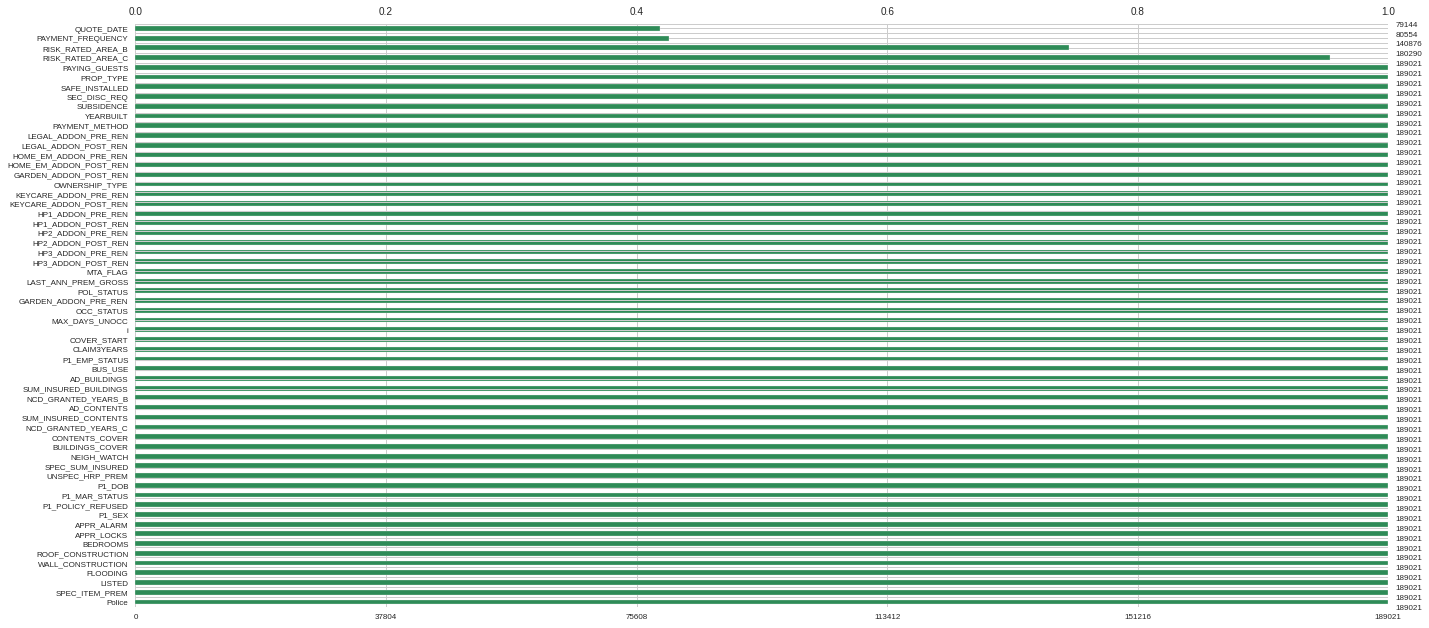

In [ ]:
msno.bar(df3,figsize=(20,10), fontsize=8,color ='seagreen',log=False, sort="descending")
plt.savefig('missingValues3_plot.png')

### Imputation for RISK_RATED_AREA_B & C, PAYMENT FREQUENCY

We will use the mean to replace the missing values.

We will replace the NaN's in PAYMENT FREQUENCY with 0's.

In [ ]:
df3['RISK_RATED_AREA_B'] = df3['RISK_RATED_AREA_B'].fillna(df3['RISK_RATED_AREA_B'].mean())

In [ ]:
df3['RISK_RATED_AREA_C'] = df3['RISK_RATED_AREA_C'].fillna(df3['RISK_RATED_AREA_C'].mean())

In [ ]:
df3['PAYMENT_FREQUENCY']=df3['PAYMENT_FREQUENCY'].fillna(0)

Visualizing missing values again using missingno.

<Axes: >

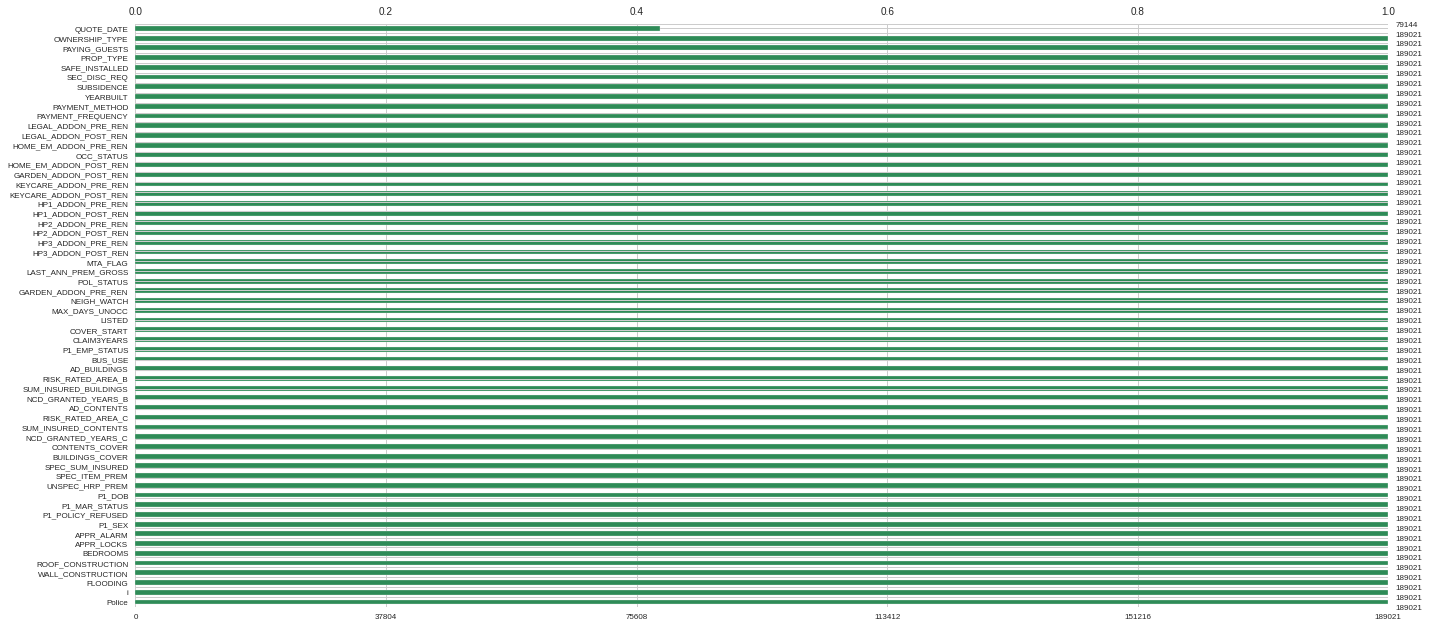

In [ ]:
msno.bar(df3,figsize=(20,10), fontsize=8,color ='seagreen',log=False, sort="descending")

**# Dropping Irrelevant Data**

In [ ]:
## Dropping the i and police columns as they are not relevant to our work
# i shows the number of rows while police shows the policy number.
#Quote date still has 58% of missing data.
df4 = df3.drop(['Police','i','QUOTE_DATE'],axis=1)

### Checking the variables data type

In [ ]:
df4.dtypes

COVER_START                object
CLAIM3YEARS                object
P1_EMP_STATUS              object
BUS_USE                    object
AD_BUILDINGS               object
RISK_RATED_AREA_B         float64
SUM_INSURED_BUILDINGS     float64
NCD_GRANTED_YEARS_B       float64
AD_CONTENTS                object
RISK_RATED_AREA_C         float64
SUM_INSURED_CONTENTS      float64
NCD_GRANTED_YEARS_C       float64
CONTENTS_COVER             object
BUILDINGS_COVER            object
SPEC_SUM_INSURED          float64
SPEC_ITEM_PREM            float64
UNSPEC_HRP_PREM           float64
P1_DOB                     object
P1_MAR_STATUS              object
P1_POLICY_REFUSED          object
P1_SEX                     object
APPR_ALARM                 object
APPR_LOCKS                 object
BEDROOMS                  float64
ROOF_CONSTRUCTION         float64
WALL_CONSTRUCTION         float64
FLOODING                   object
LISTED                    float64
MAX_DAYS_UNOCC            float64
NEIGH_WATCH   

In [ ]:
df4.shape

(189021, 57)

We dropped 3 columns that we deemed irrelevant to our work, that is, they will not add value.

In [ ]:
df4.isnull().sum().sum()

0

Now we do not have any missing values and the size of our data set is 189,021 rows with 57 columns (variables).

In [ ]:
df4.columns

Index(['COVER_START', 'CLAIM3YEARS', 'P1_EMP_STATUS', 'BUS_USE',
       'AD_BUILDINGS', 'RISK_RATED_AREA_B', 'SUM_INSURED_BUILDINGS',
       'NCD_GRANTED_YEARS_B', 'AD_CONTENTS', 'RISK_RATED_AREA_C',
       'SUM_INSURED_CONTENTS', 'NCD_GRANTED_YEARS_C', 'CONTENTS_COVER',
       'BUILDINGS_COVER', 'SPEC_SUM_INSURED', 'SPEC_ITEM_PREM',
       'UNSPEC_HRP_PREM', 'P1_DOB', 'P1_MAR_STATUS', 'P1_POLICY_REFUSED',
       'P1_SEX', 'APPR_ALARM', 'APPR_LOCKS', 'BEDROOMS', 'ROOF_CONSTRUCTION',
       'WALL_CONSTRUCTION', 'FLOODING', 'LISTED', 'MAX_DAYS_UNOCC',
       'NEIGH_WATCH', 'OCC_STATUS', 'OWNERSHIP_TYPE', 'PAYING_GUESTS',
       'PROP_TYPE', 'SAFE_INSTALLED', 'SEC_DISC_REQ', 'SUBSIDENCE',
       'YEARBUILT', 'PAYMENT_METHOD', 'PAYMENT_FREQUENCY',
       'LEGAL_ADDON_PRE_REN', 'LEGAL_ADDON_POST_REN', 'HOME_EM_ADDON_PRE_REN',
       'HOME_EM_ADDON_POST_REN', 'GARDEN_ADDON_PRE_REN',
       'GARDEN_ADDON_POST_REN', 'KEYCARE_ADDON_PRE_REN',
       'KEYCARE_ADDON_POST_REN', 'HP1_ADDON_PRE_REN',

Now that our data set does not have any missing values, we may proceed with looking for relationships between the variables.

Using some graphs like bar graphs, box plots, piechart, histograms, correlation matrix etc.

In [ ]:
cat_cols=df4.select_dtypes(include=['object']).columns
num_cols = df4.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("sum of cat_variables:",len(cat_cols))
print("Numerical Variables:")
print(num_cols)
print("sum of numerical_variables:",len(num_cols))

Categorical Variables:
Index(['COVER_START', 'CLAIM3YEARS', 'P1_EMP_STATUS', 'BUS_USE',
       'AD_BUILDINGS', 'AD_CONTENTS', 'CONTENTS_COVER', 'BUILDINGS_COVER',
       'P1_DOB', 'P1_MAR_STATUS', 'P1_POLICY_REFUSED', 'P1_SEX', 'APPR_ALARM',
       'APPR_LOCKS', 'FLOODING', 'NEIGH_WATCH', 'OCC_STATUS', 'SAFE_INSTALLED',
       'SEC_DISC_REQ', 'SUBSIDENCE', 'PAYMENT_METHOD', 'LEGAL_ADDON_PRE_REN',
       'LEGAL_ADDON_POST_REN', 'HOME_EM_ADDON_PRE_REN',
       'HOME_EM_ADDON_POST_REN', 'GARDEN_ADDON_PRE_REN',
       'GARDEN_ADDON_POST_REN', 'KEYCARE_ADDON_PRE_REN',
       'KEYCARE_ADDON_POST_REN', 'HP1_ADDON_PRE_REN', 'HP1_ADDON_POST_REN',
       'HP2_ADDON_PRE_REN', 'HP2_ADDON_POST_REN', 'HP3_ADDON_PRE_REN',
       'HP3_ADDON_POST_REN', 'MTA_FLAG', 'POL_STATUS'],
      dtype='object')
sum of cat_variables: 37
Numerical Variables:
['RISK_RATED_AREA_B', 'SUM_INSURED_BUILDINGS', 'NCD_GRANTED_YEARS_B', 'RISK_RATED_AREA_C', 'SUM_INSURED_CONTENTS', 'NCD_GRANTED_YEARS_C', 'SPEC_SUM_INSURED', '

### Checking at the unique values in some of the data's columns

In [ ]:
df4['SUM_INSURED_BUILDINGS'].unique()

array([1000000.,       0.])

In [ ]:
df4['SUM_INSURED_CONTENTS'].unique()

array([ 50000.,  75000.,  60000.,      0.,  70000.,  65000., 100000.,
        80000.,  90000.,  55000.,  85000.])

In [ ]:
df4['YEARBUILT']

0         1960.0
1         1960.0
2         1946.0
3         1870.0
4         1960.0
           ...  
256131    1980.0
256132    1980.0
256133    1900.0
256134    1900.0
256135    1946.0
Name: YEARBUILT, Length: 189021, dtype: float64

We convert Wall_construction and Roof_Construction to strings as they represent codes of the type of wall and roof construction respectfully.

We also need to convert Cover_StartDate and P1_DOB to date time for easier working.








In [ ]:
df4.columns

Index(['COVER_START', 'CLAIM3YEARS', 'P1_EMP_STATUS', 'BUS_USE',
       'AD_BUILDINGS', 'RISK_RATED_AREA_B', 'SUM_INSURED_BUILDINGS',
       'NCD_GRANTED_YEARS_B', 'AD_CONTENTS', 'RISK_RATED_AREA_C',
       'SUM_INSURED_CONTENTS', 'NCD_GRANTED_YEARS_C', 'CONTENTS_COVER',
       'BUILDINGS_COVER', 'SPEC_SUM_INSURED', 'SPEC_ITEM_PREM',
       'UNSPEC_HRP_PREM', 'P1_DOB', 'P1_MAR_STATUS', 'P1_POLICY_REFUSED',
       'P1_SEX', 'APPR_ALARM', 'APPR_LOCKS', 'BEDROOMS', 'ROOF_CONSTRUCTION',
       'WALL_CONSTRUCTION', 'FLOODING', 'LISTED', 'MAX_DAYS_UNOCC',
       'NEIGH_WATCH', 'OCC_STATUS', 'OWNERSHIP_TYPE', 'PAYING_GUESTS',
       'PROP_TYPE', 'SAFE_INSTALLED', 'SEC_DISC_REQ', 'SUBSIDENCE',
       'YEARBUILT', 'PAYMENT_METHOD', 'PAYMENT_FREQUENCY',
       'LEGAL_ADDON_PRE_REN', 'LEGAL_ADDON_POST_REN', 'HOME_EM_ADDON_PRE_REN',
       'HOME_EM_ADDON_POST_REN', 'GARDEN_ADDON_PRE_REN',
       'GARDEN_ADDON_POST_REN', 'KEYCARE_ADDON_PRE_REN',
       'KEYCARE_ADDON_POST_REN', 'HP1_ADDON_PRE_REN',

In [ ]:
df4['PROP_TYPE'].nunique()

36

In [ ]:
#Multiple columns string conversion
df4[['WALL_CONSTRUCTION', 'ROOF_CONSTRUCTION','BEDROOMS','SUM_INSURED_CONTENTS']] = df4[['WALL_CONSTRUCTION', 'ROOF_CONSTRUCTION','BEDROOMS','SUM_INSURED_CONTENTS']].astype(str)
print("After converting multiple columns to string:\n", df4.dtypes)

After converting multiple columns to string:
 COVER_START                object
CLAIM3YEARS                object
P1_EMP_STATUS              object
BUS_USE                    object
AD_BUILDINGS               object
RISK_RATED_AREA_B         float64
SUM_INSURED_BUILDINGS     float64
NCD_GRANTED_YEARS_B       float64
AD_CONTENTS                object
RISK_RATED_AREA_C         float64
SUM_INSURED_CONTENTS       object
NCD_GRANTED_YEARS_C       float64
CONTENTS_COVER             object
BUILDINGS_COVER            object
SPEC_SUM_INSURED          float64
SPEC_ITEM_PREM            float64
UNSPEC_HRP_PREM           float64
P1_DOB                     object
P1_MAR_STATUS              object
P1_POLICY_REFUSED          object
P1_SEX                     object
APPR_ALARM                 object
APPR_LOCKS                 object
BEDROOMS                   object
ROOF_CONSTRUCTION          object
WALL_CONSTRUCTION          object
FLOODING                   object
LISTED                    float64
MA

## Converting some of the numerical variables to Categorical Variables.

In [ ]:
df4['SUM_INSURED_CONTENTS'].unique()

array(['50000.0', '75000.0', '60000.0', '0.0', '70000.0', '65000.0',
       '100000.0', '80000.0', '90000.0', '55000.0', '85000.0'],
      dtype=object)

In [ ]:
df4[['OWNERSHIP_TYPE','SUM_INSURED_BUILDINGS','NCD_GRANTED_YEARS_B','NCD_GRANTED_YEARS_C','PAYMENT_FREQUENCY']]=df4[['OWNERSHIP_TYPE','SUM_INSURED_BUILDINGS','NCD_GRANTED_YEARS_B','NCD_GRANTED_YEARS_C','PAYMENT_FREQUENCY']].astype(str)
print("After converting multiple columns to string:\n", df4.dtypes)

After converting multiple columns to string:
 COVER_START                object
CLAIM3YEARS                object
P1_EMP_STATUS              object
BUS_USE                    object
AD_BUILDINGS               object
RISK_RATED_AREA_B         float64
SUM_INSURED_BUILDINGS      object
NCD_GRANTED_YEARS_B        object
AD_CONTENTS                object
RISK_RATED_AREA_C         float64
SUM_INSURED_CONTENTS       object
NCD_GRANTED_YEARS_C        object
CONTENTS_COVER             object
BUILDINGS_COVER            object
SPEC_SUM_INSURED          float64
SPEC_ITEM_PREM            float64
UNSPEC_HRP_PREM           float64
P1_DOB                     object
P1_MAR_STATUS              object
P1_POLICY_REFUSED          object
P1_SEX                     object
APPR_ALARM                 object
APPR_LOCKS                 object
BEDROOMS                   object
ROOF_CONSTRUCTION          object
WALL_CONSTRUCTION          object
FLOODING                   object
LISTED                    float64
MA

In [ ]:
df4[['LISTED','MAX_DAYS_UNOCC','OWNERSHIP_TYPE','PAYING_GUESTS','BEDROOMS','PROP_TYPE']]=df4[['LISTED','MAX_DAYS_UNOCC','OWNERSHIP_TYPE','PAYING_GUESTS','BEDROOMS','PROP_TYPE']].astype(str)
print("After converting multiple columns to string:\n", df4.dtypes)

After converting multiple columns to string:
 COVER_START                object
CLAIM3YEARS                object
P1_EMP_STATUS              object
BUS_USE                    object
AD_BUILDINGS               object
RISK_RATED_AREA_B         float64
SUM_INSURED_BUILDINGS      object
NCD_GRANTED_YEARS_B        object
AD_CONTENTS                object
RISK_RATED_AREA_C         float64
SUM_INSURED_CONTENTS       object
NCD_GRANTED_YEARS_C        object
CONTENTS_COVER             object
BUILDINGS_COVER            object
SPEC_SUM_INSURED          float64
SPEC_ITEM_PREM            float64
UNSPEC_HRP_PREM           float64
P1_DOB                     object
P1_MAR_STATUS              object
P1_POLICY_REFUSED          object
P1_SEX                     object
APPR_ALARM                 object
APPR_LOCKS                 object
BEDROOMS                   object
ROOF_CONSTRUCTION          object
WALL_CONSTRUCTION          object
FLOODING                   object
LISTED                     object
MA

### Converting the COVER_START and P1_DOB to datetime

In [ ]:
df4['COVER_START'] = pd.to_datetime(
                          df4['COVER_START'],
                          format='%d/%m/%Y'
)
df4['P1_DOB'] = pd.to_datetime(
                          df4['P1_DOB'],
                          format='%d/%m/%Y'
)


# printing dataframe
print(df4)
print()

print(df4.dtypes)


       COVER_START CLAIM3YEARS P1_EMP_STATUS BUS_USE AD_BUILDINGS  \
0       2007-11-22           N             R       N            Y   
1       2008-01-01           N             E       Y            Y   
2       2007-11-23           N             E       N            N   
3       2007-12-12           N             R       N            N   
4       2007-12-15           N             R       N            Y   
...            ...         ...           ...     ...          ...   
256131  2005-02-22           Y             R       N            Y   
256132  2000-12-01           N             R       N            Y   
256133  2006-01-18           N             R       N            Y   
256134  2004-12-31           N             R       N            Y   
256135  2006-12-09           N             R       N            Y   

        RISK_RATED_AREA_B SUM_INSURED_BUILDINGS NCD_GRANTED_YEARS_B  \
0                19.00000             1000000.0                 7.0   
1                25.00000    

We check the number of data types again

In [ ]:
cat_cols=df4.select_dtypes(include=['object']).columns
num_cols = df4.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("sum of cat_variables:",len(cat_cols))
print("Numerical Variables:")
print(num_cols)
print("sum of numerical_variables:",len(num_cols))

Categorical Variables:
Index(['CLAIM3YEARS', 'P1_EMP_STATUS', 'BUS_USE', 'AD_BUILDINGS',
       'SUM_INSURED_BUILDINGS', 'NCD_GRANTED_YEARS_B', 'AD_CONTENTS',
       'SUM_INSURED_CONTENTS', 'NCD_GRANTED_YEARS_C', 'CONTENTS_COVER',
       'BUILDINGS_COVER', 'P1_MAR_STATUS', 'P1_POLICY_REFUSED', 'P1_SEX',
       'APPR_ALARM', 'APPR_LOCKS', 'BEDROOMS', 'ROOF_CONSTRUCTION',
       'WALL_CONSTRUCTION', 'FLOODING', 'LISTED', 'MAX_DAYS_UNOCC',
       'NEIGH_WATCH', 'OCC_STATUS', 'OWNERSHIP_TYPE', 'PAYING_GUESTS',
       'PROP_TYPE', 'SAFE_INSTALLED', 'SEC_DISC_REQ', 'SUBSIDENCE',
       'PAYMENT_METHOD', 'PAYMENT_FREQUENCY', 'LEGAL_ADDON_PRE_REN',
       'LEGAL_ADDON_POST_REN', 'HOME_EM_ADDON_PRE_REN',
       'HOME_EM_ADDON_POST_REN', 'GARDEN_ADDON_PRE_REN',
       'GARDEN_ADDON_POST_REN', 'KEYCARE_ADDON_PRE_REN',
       'KEYCARE_ADDON_POST_REN', 'HP1_ADDON_PRE_REN', 'HP1_ADDON_POST_REN',
       'HP2_ADDON_PRE_REN', 'HP2_ADDON_POST_REN', 'HP3_ADDON_PRE_REN',
       'HP3_ADDON_POST_REN', 'MTA_

#### Visual representation of the numerical variables using histogram and boxplots.

Boxplots will show us the presence of outliers.

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(df4[col].skew(), 2))

RISK_RATED_AREA_B
Skew : 1.66
RISK_RATED_AREA_C
Skew : 1.33
SPEC_SUM_INSURED
Skew : 6.99
SPEC_ITEM_PREM
Skew : 12.77
UNSPEC_HRP_PREM
Skew : 1.8
YEARBUILT
Skew : -0.76
LAST_ANN_PREM_GROSS
Skew : 2.19


RISK_RATED_AREA_B


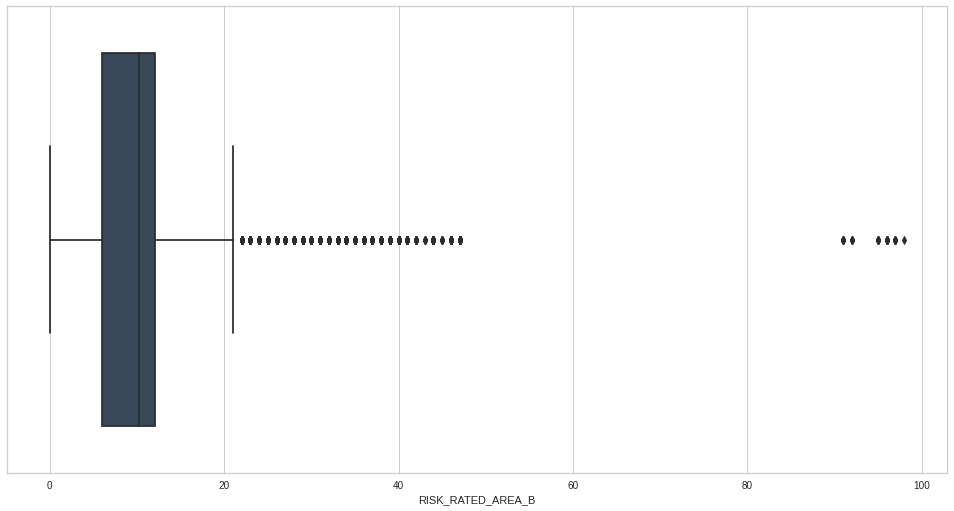

RISK_RATED_AREA_C


<Figure size 576x396 with 0 Axes>

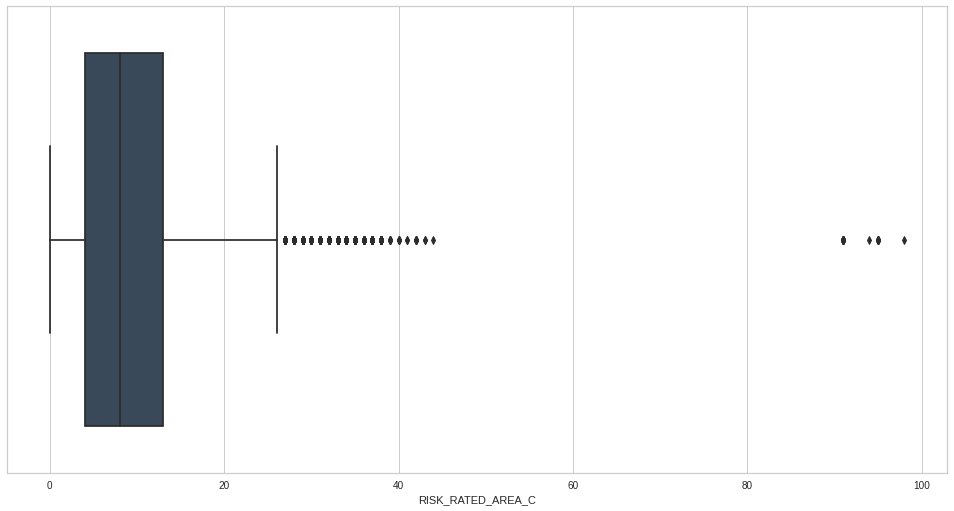

SPEC_SUM_INSURED


<Figure size 576x396 with 0 Axes>

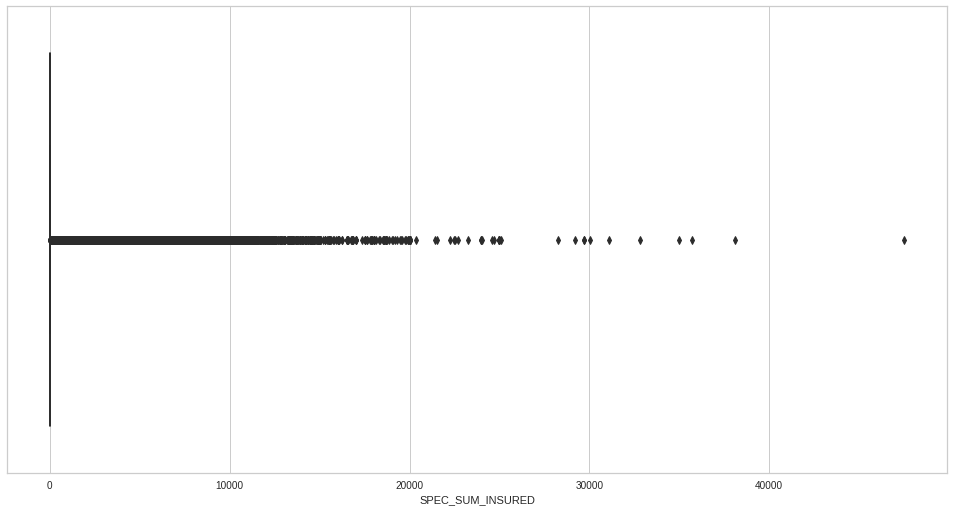

SPEC_ITEM_PREM


<Figure size 576x396 with 0 Axes>

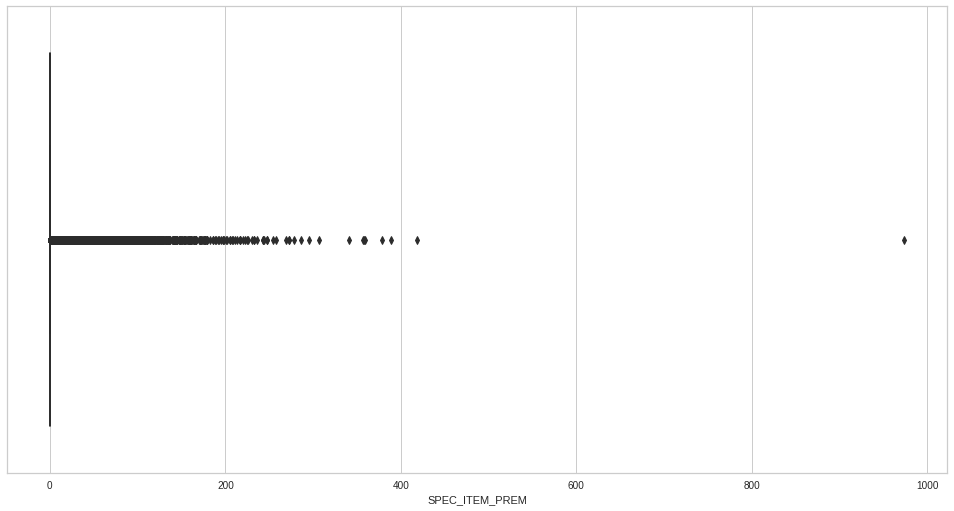

UNSPEC_HRP_PREM


<Figure size 576x396 with 0 Axes>

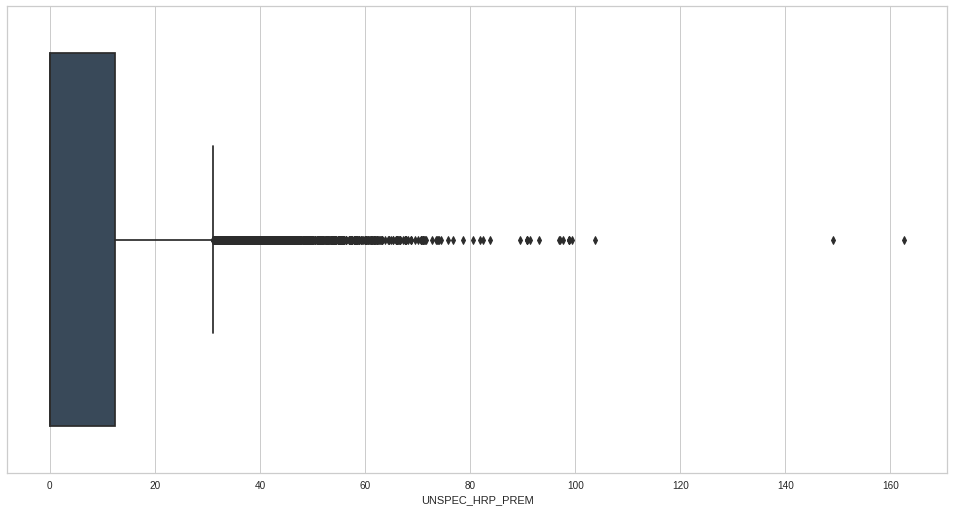

YEARBUILT


<Figure size 576x396 with 0 Axes>

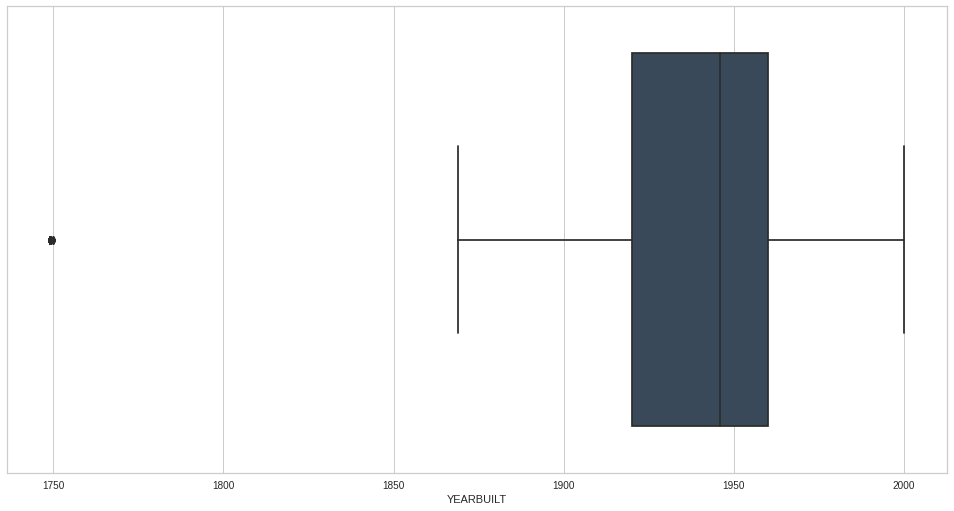

LAST_ANN_PREM_GROSS


<Figure size 576x396 with 0 Axes>

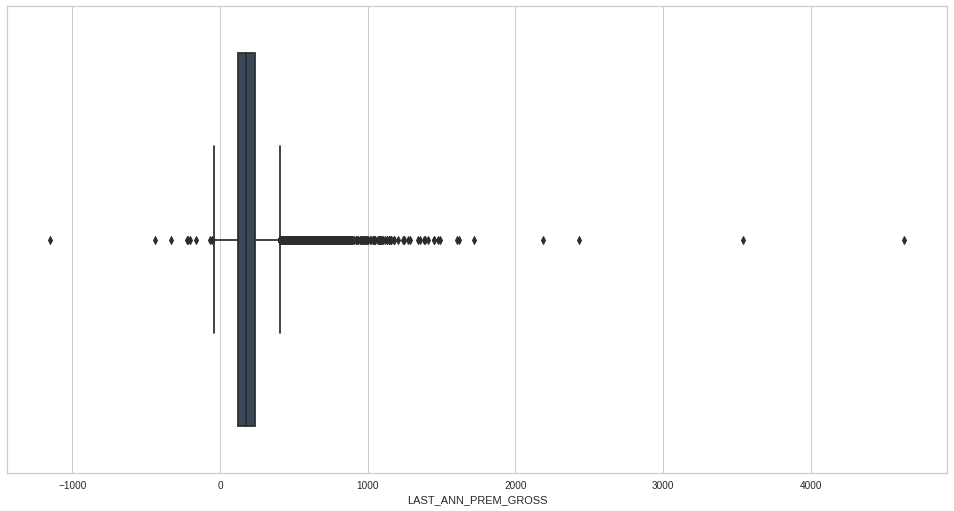

<Figure size 576x396 with 0 Axes>

In [ ]:
for col in num_cols:
    print(col)
    #print('Skew :', round(df4[col].skew(), 2))
    plt.figure(figsize = (15, 8))
    #plt.subplot(1, 2, 1)
    #df4[col].hist(grid=False)
    #plt.ylabel('count')
    #plt.subplot(1, 2, 2)
    sns.boxplot(x=df4[col])
    plt.show()
    plt.savefig('outliers_plot.png')

FRom the above, we observe that most of the numerical values have outliers, so we need to deal with the outliers.

In [ ]:
#We can say that a huge proprtion of those taking home insurance are married couples
df4['P1_MAR_STATUS'].value_counts()

P1_MAR_STATUS
M    66474
P    44148
O    33061
W    25513
S    10270
D     7882
A     1070
C      544
B       32
N       27
Name: count, dtype: int64

Checking for categorical variables count.

Most are binary

In [ ]:
for col in cat_cols:
    print(col)
    # Calculate the value counts
    counts = df4[col].value_counts()
    print(counts)

CLAIM3YEARS
CLAIM3YEARS
N    167185
Y     21836
Name: count, dtype: int64
P1_EMP_STATUS
P1_EMP_STATUS
R    146621
E     36398
S      3065
H      1069
U       921
N       754
V        68
A        52
F        29
I        28
C        16
Name: count, dtype: int64
BUS_USE
BUS_USE
N    186077
Y      2944
Name: count, dtype: int64
AD_BUILDINGS
AD_BUILDINGS
Y    147259
N     41762
Name: count, dtype: int64
SUM_INSURED_BUILDINGS
SUM_INSURED_BUILDINGS
1000000.0    147083
0.0           41938
Name: count, dtype: int64
NCD_GRANTED_YEARS_B
NCD_GRANTED_YEARS_B
6.0    88958
0.0    43755
7.0    25985
5.0    11221
3.0     9503
4.0     3458
9.0     2494
2.0     2268
1.0      833
8.0      546
Name: count, dtype: int64
AD_CONTENTS
AD_CONTENTS
Y    180452
N      8569
Name: count, dtype: int64
SUM_INSURED_CONTENTS
SUM_INSURED_CONTENTS
50000.0     178991
0.0           8735
75000.0        671
60000.0        309
70000.0         98
100000.0        59
65000.0         54
55000.0         44
80000.0         40
85000

### VISUAL REPRESENTATION OF CATEGORICAL VARIABLES

We used both pie chart and bar graph.

CLAIM3YEARS


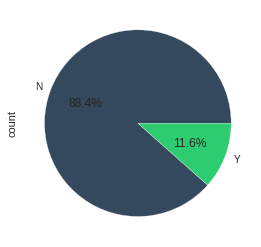

P1_EMP_STATUS


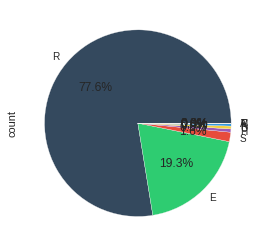

BUS_USE


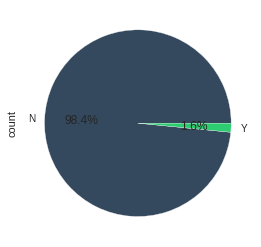

AD_BUILDINGS


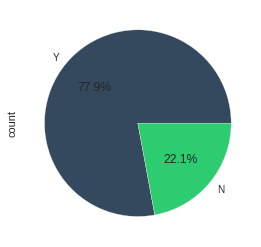

SUM_INSURED_BUILDINGS


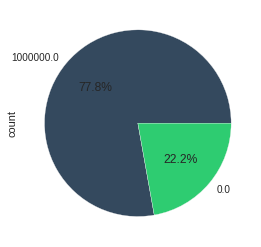

NCD_GRANTED_YEARS_B


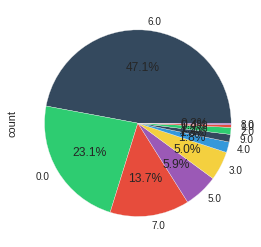

AD_CONTENTS


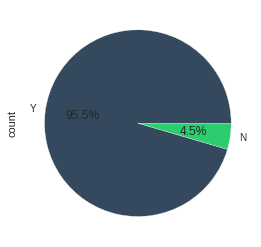

SUM_INSURED_CONTENTS


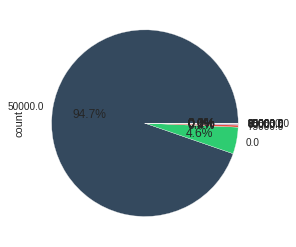

NCD_GRANTED_YEARS_C


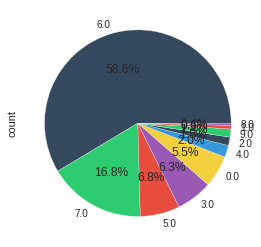

CONTENTS_COVER


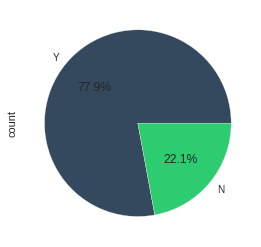

BUILDINGS_COVER


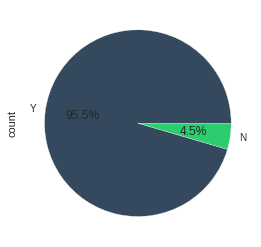

P1_MAR_STATUS


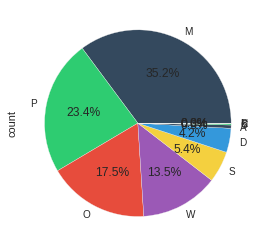

P1_POLICY_REFUSED


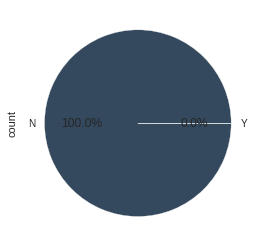

P1_SEX


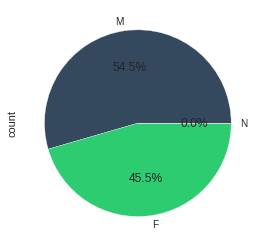

APPR_ALARM


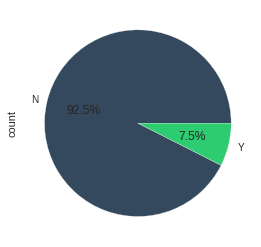

APPR_LOCKS


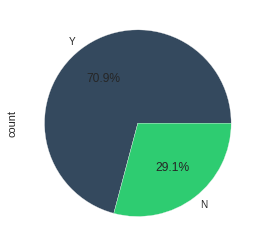

BEDROOMS


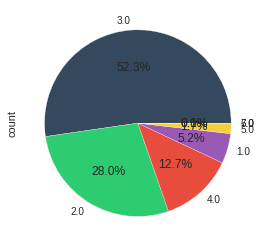

ROOF_CONSTRUCTION


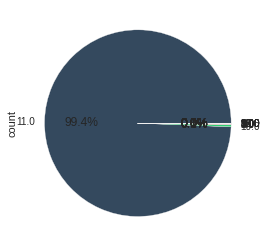

WALL_CONSTRUCTION


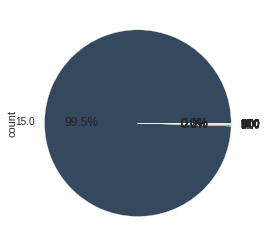

FLOODING


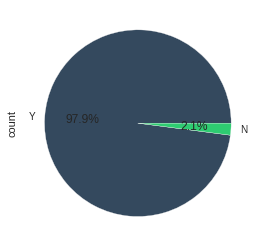

LISTED


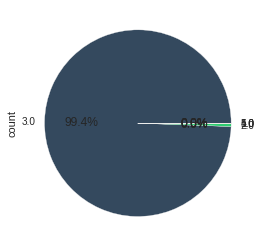

MAX_DAYS_UNOCC


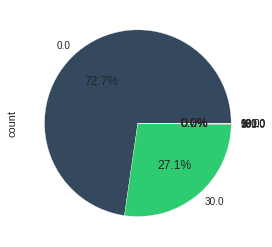

NEIGH_WATCH


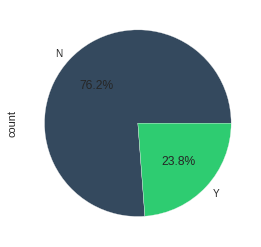

OCC_STATUS


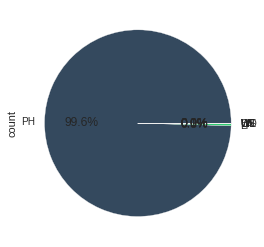

OWNERSHIP_TYPE


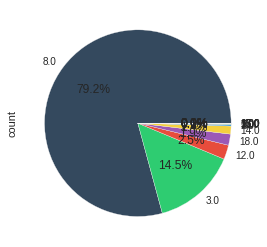

PAYING_GUESTS


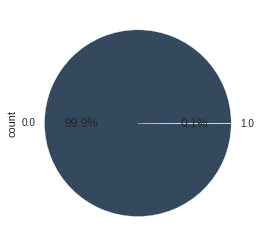

PROP_TYPE


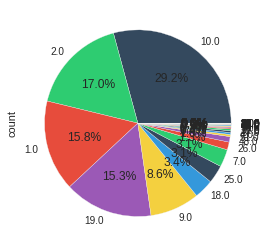

SAFE_INSTALLED


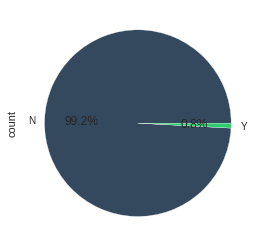

SEC_DISC_REQ


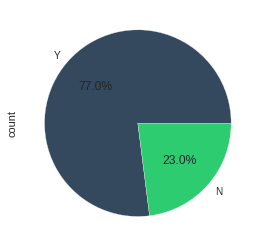

SUBSIDENCE


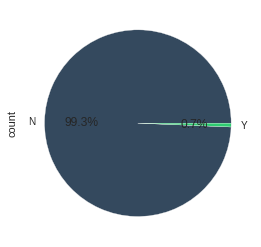

PAYMENT_METHOD


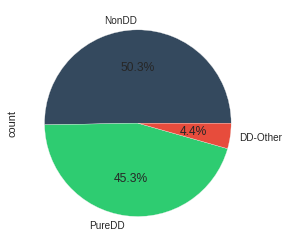

PAYMENT_FREQUENCY


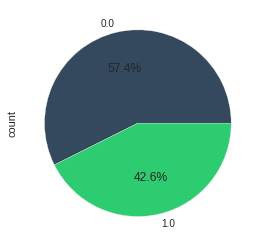

LEGAL_ADDON_PRE_REN


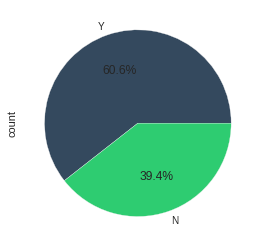

LEGAL_ADDON_POST_REN


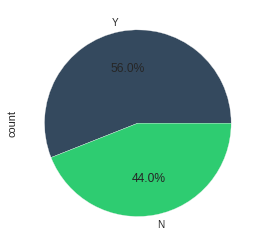

HOME_EM_ADDON_PRE_REN


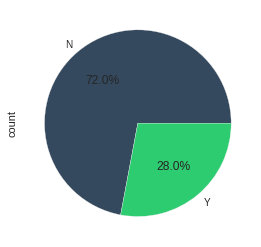

HOME_EM_ADDON_POST_REN


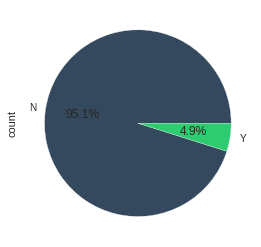

GARDEN_ADDON_PRE_REN


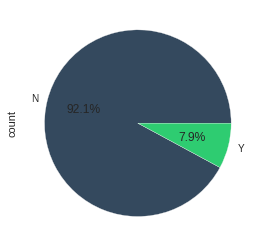

GARDEN_ADDON_POST_REN


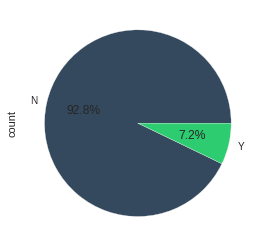

KEYCARE_ADDON_PRE_REN


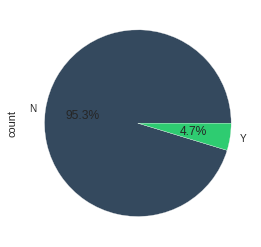

KEYCARE_ADDON_POST_REN


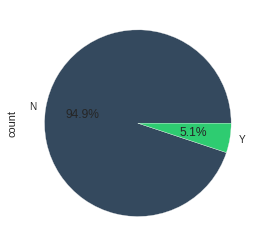

HP1_ADDON_PRE_REN


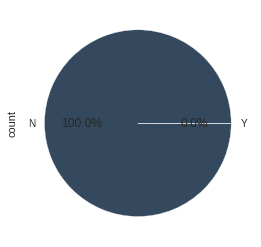

HP1_ADDON_POST_REN


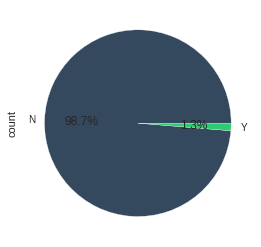

HP2_ADDON_PRE_REN


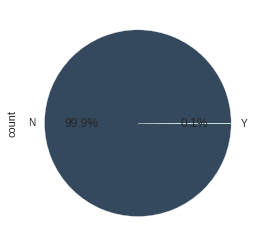

HP2_ADDON_POST_REN


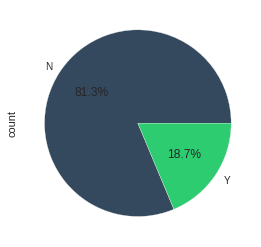

HP3_ADDON_PRE_REN


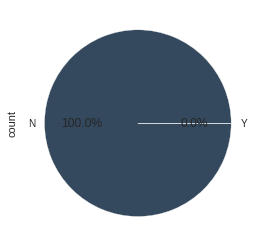

HP3_ADDON_POST_REN


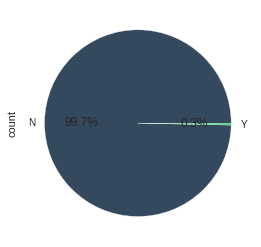

MTA_FLAG


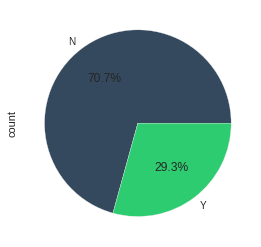

POL_STATUS


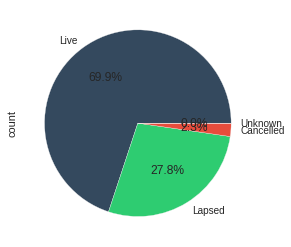

In [ ]:
for col in cat_cols:
    print(col)
    #print('Skew :', round(df4[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    #plt.subplot(1, 2, 1)
    # Calculate the value counts
    counts = df4[col].value_counts()

    # Plot the pie chart
    #plt.bar(counts.index, counts.values)
    plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
    plt.ylabel('count')
   # plt.subplot(1, 2, 2)
    #sns.boxplot(x=df4[col])
    plt.show()

CLAIM3YEARS


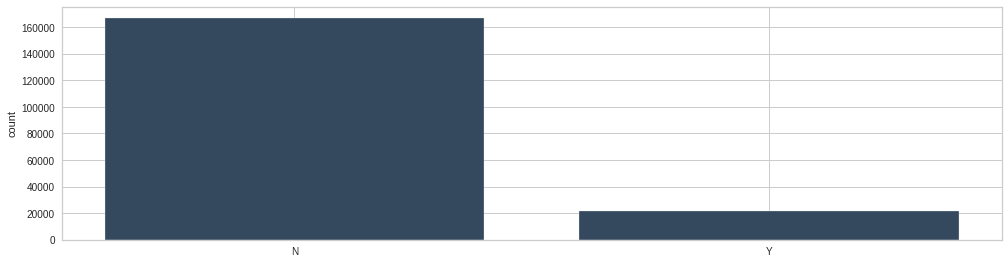

P1_EMP_STATUS


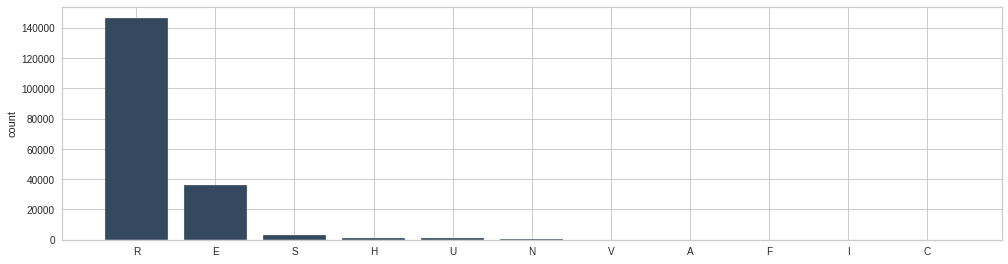

BUS_USE


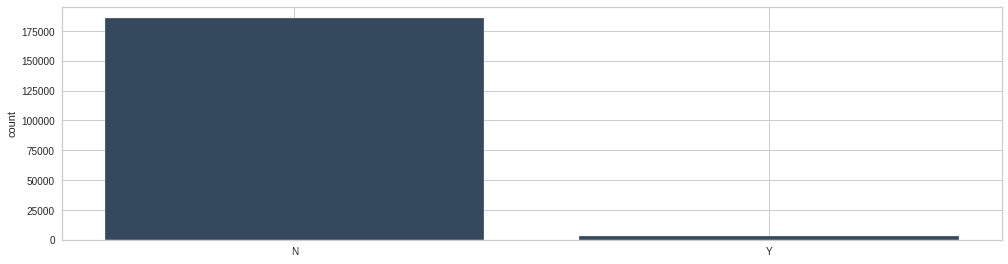

AD_BUILDINGS


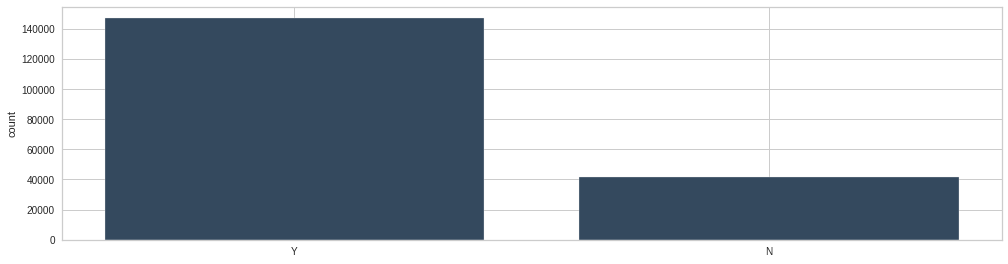

SUM_INSURED_BUILDINGS


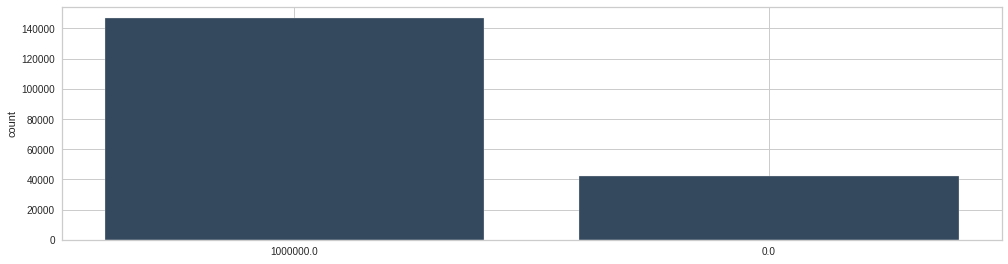

NCD_GRANTED_YEARS_B


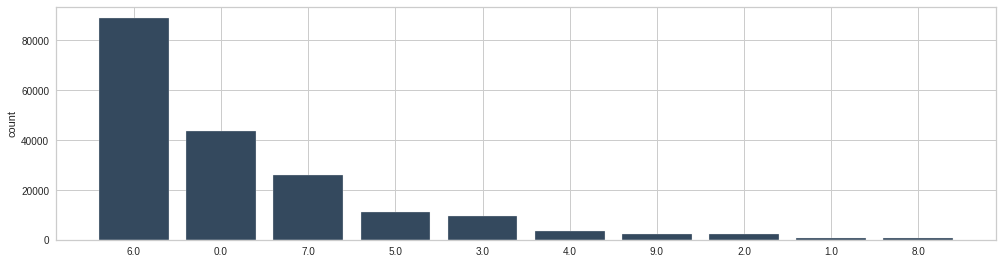

AD_CONTENTS


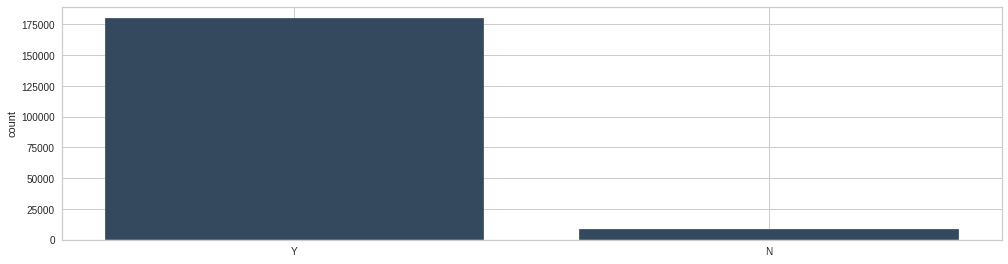

SUM_INSURED_CONTENTS


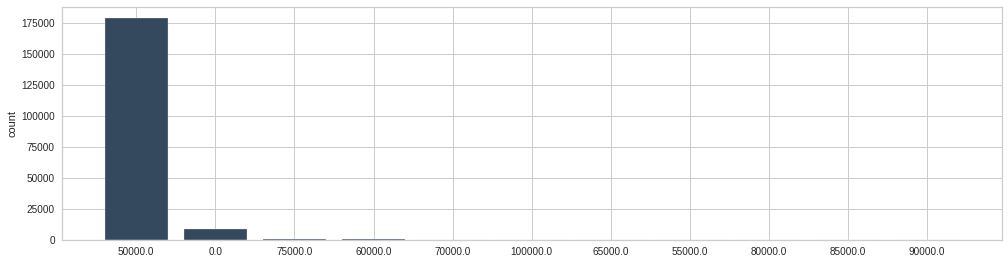

NCD_GRANTED_YEARS_C


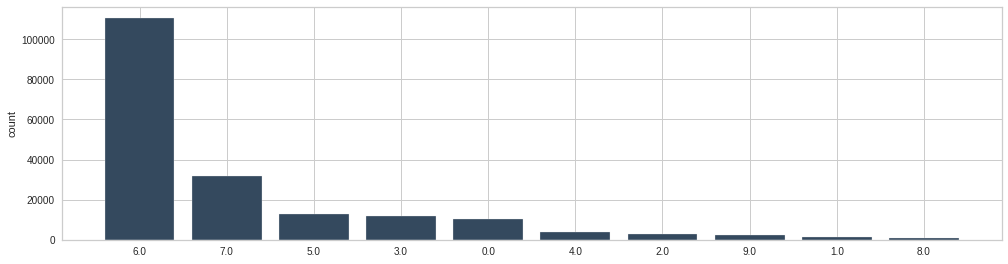

CONTENTS_COVER


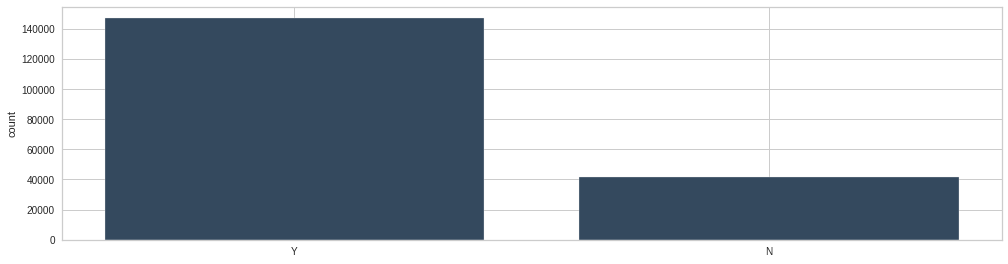

BUILDINGS_COVER


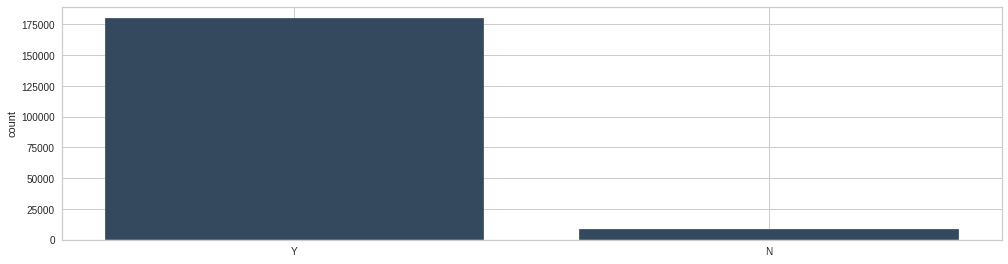

P1_MAR_STATUS


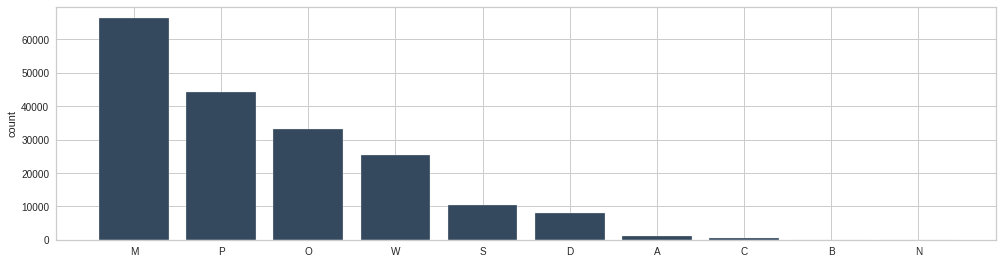

P1_POLICY_REFUSED


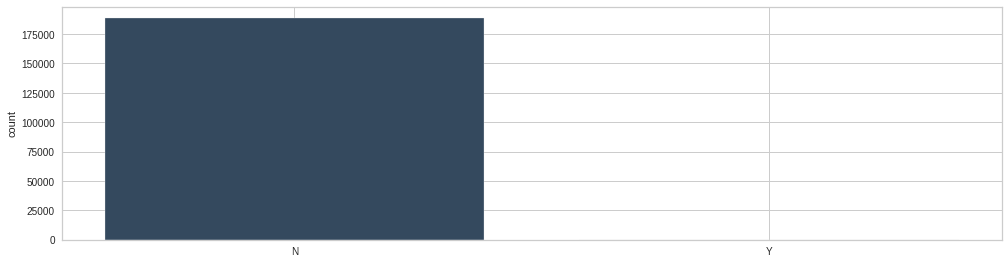

P1_SEX


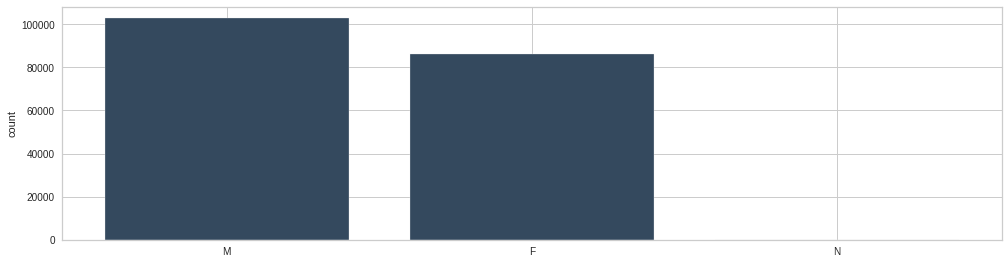

APPR_ALARM


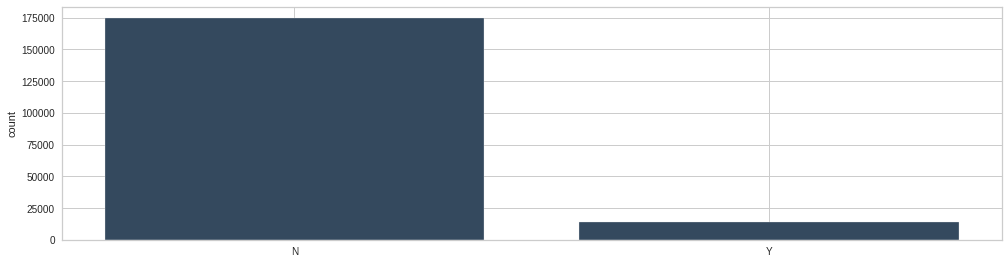

APPR_LOCKS


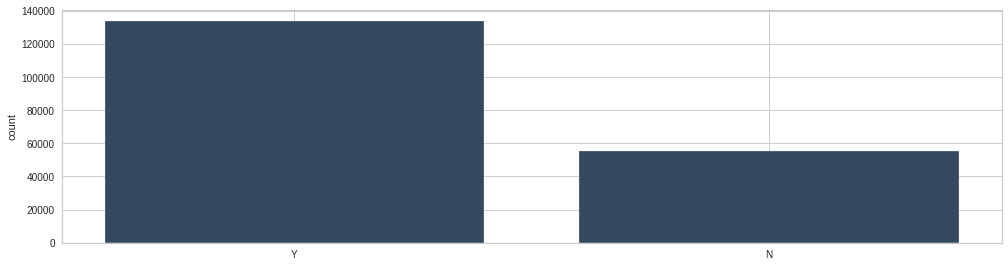

BEDROOMS


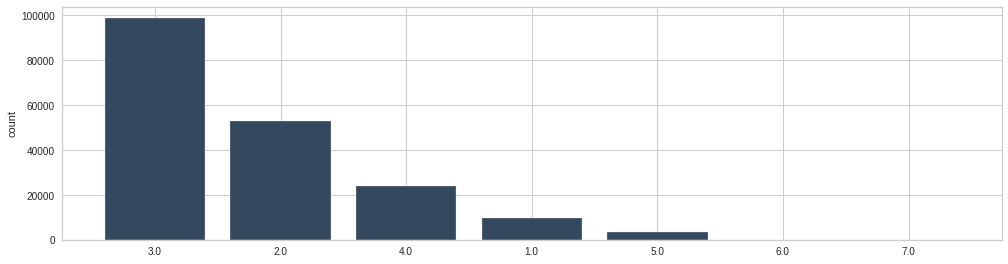

ROOF_CONSTRUCTION


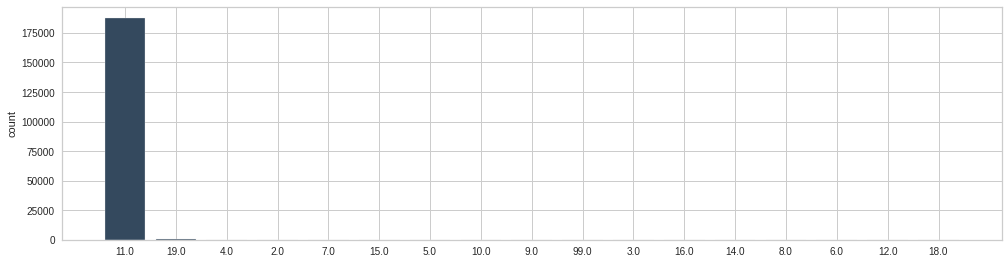

WALL_CONSTRUCTION


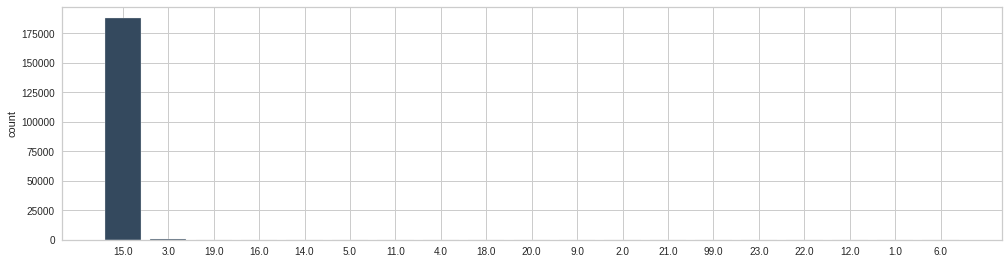

FLOODING


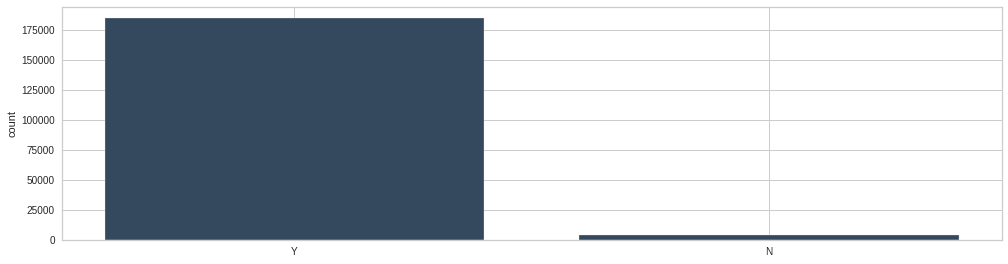

LISTED


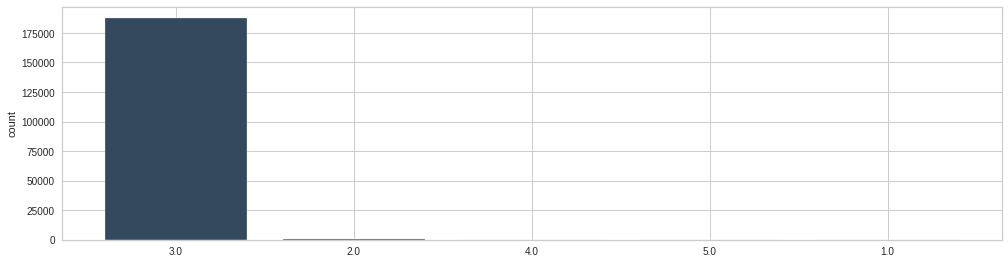

MAX_DAYS_UNOCC


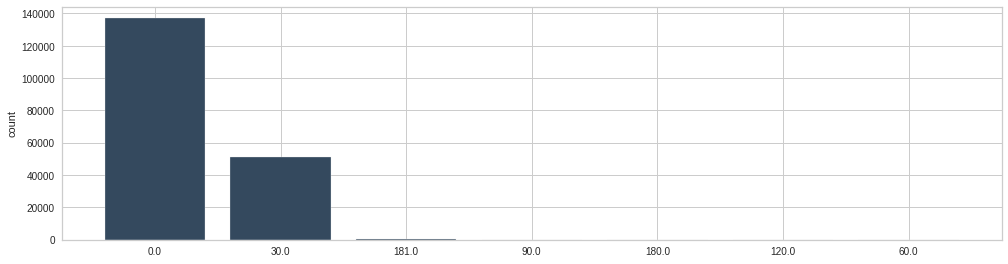

NEIGH_WATCH


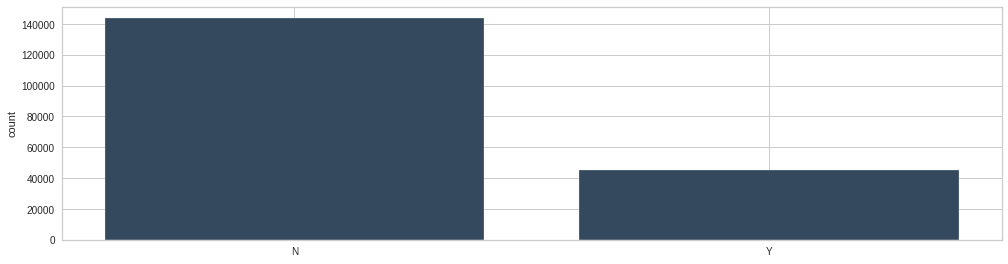

OCC_STATUS


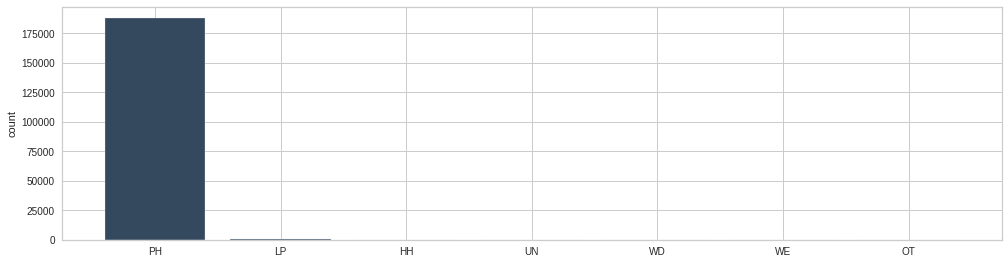

OWNERSHIP_TYPE


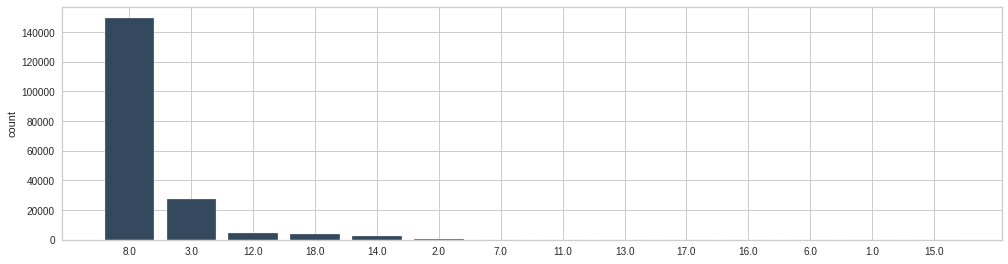

PAYING_GUESTS


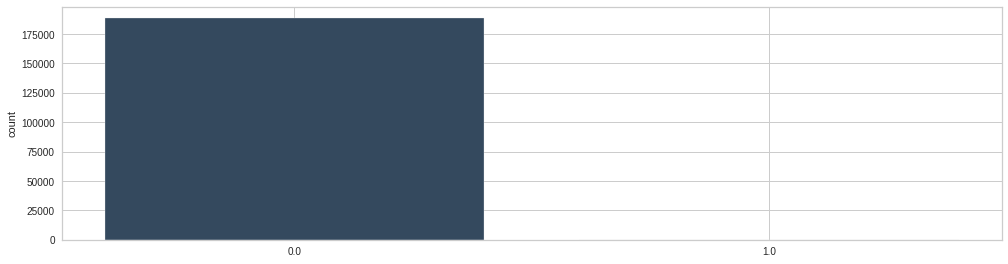

PROP_TYPE


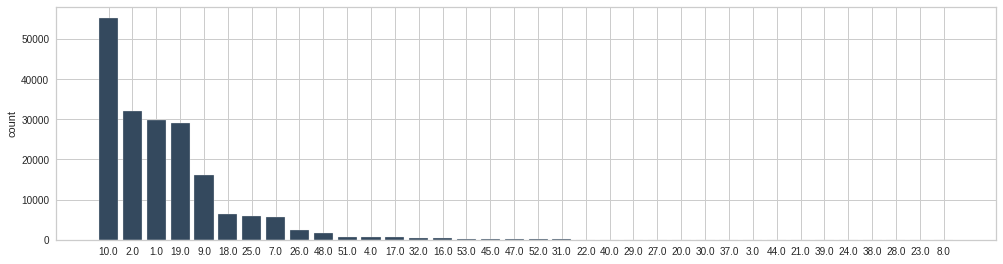

SAFE_INSTALLED


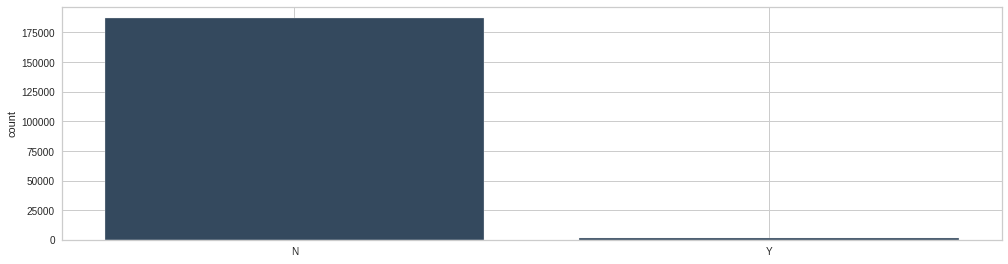

SEC_DISC_REQ


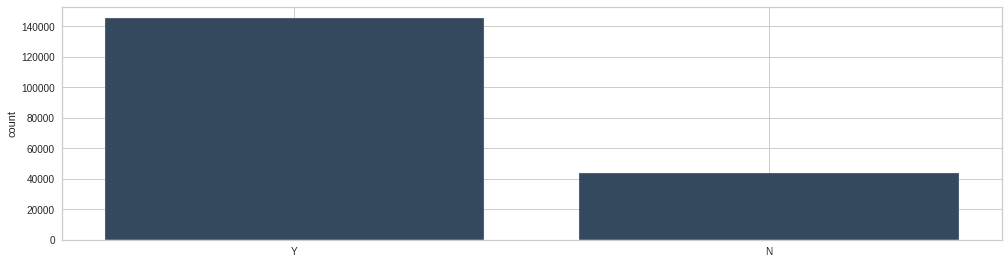

SUBSIDENCE


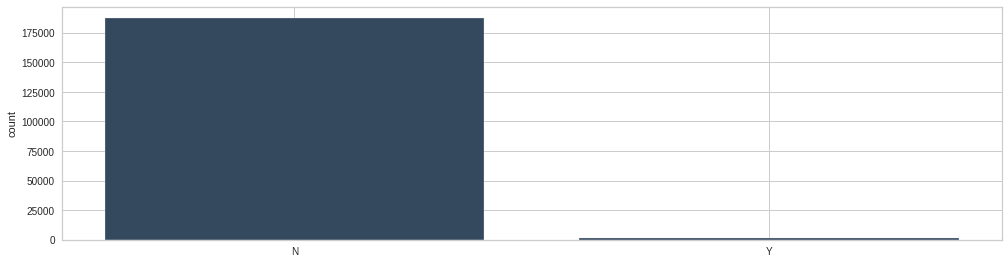

PAYMENT_METHOD


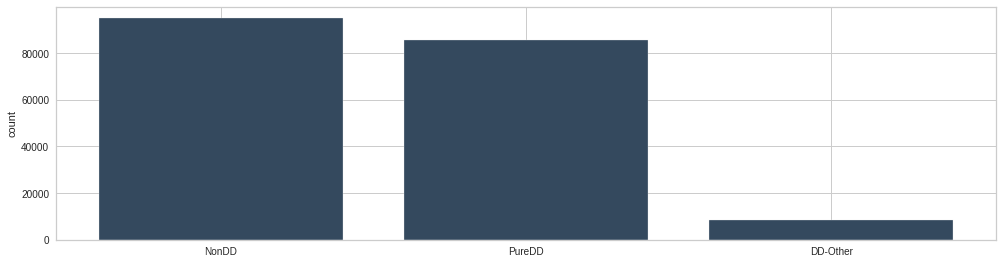

PAYMENT_FREQUENCY


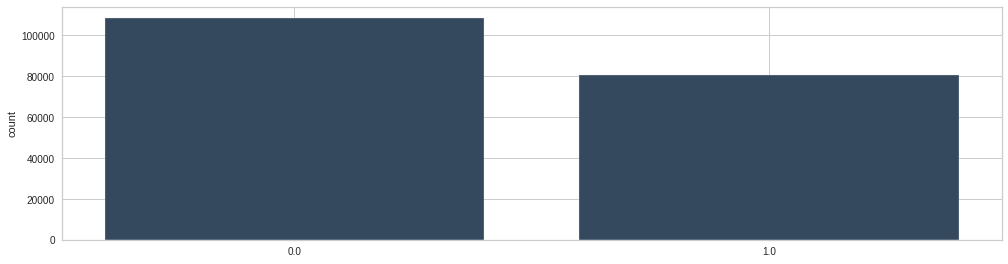

LEGAL_ADDON_PRE_REN


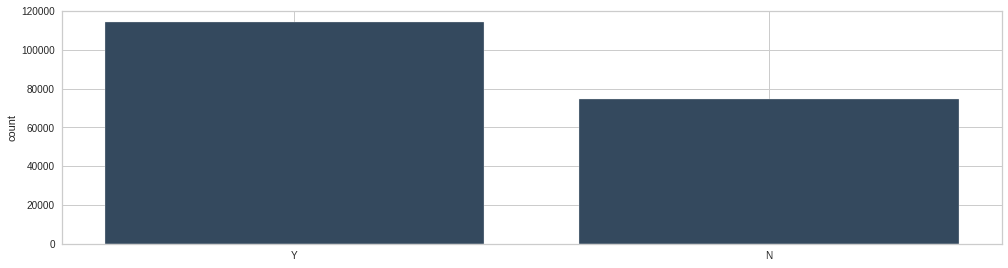

LEGAL_ADDON_POST_REN


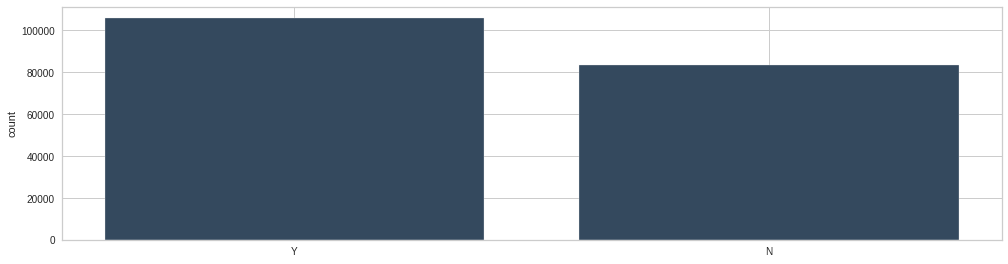

HOME_EM_ADDON_PRE_REN


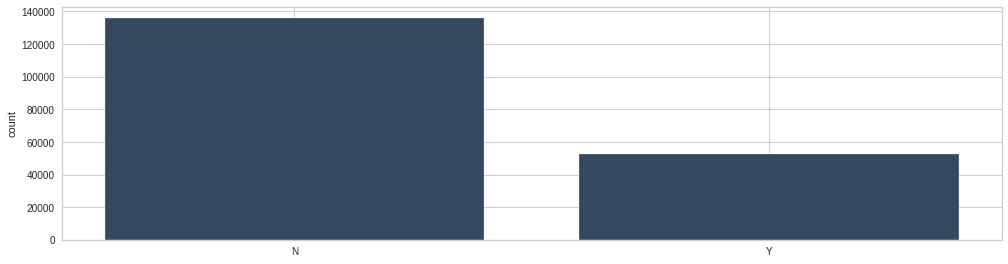

HOME_EM_ADDON_POST_REN


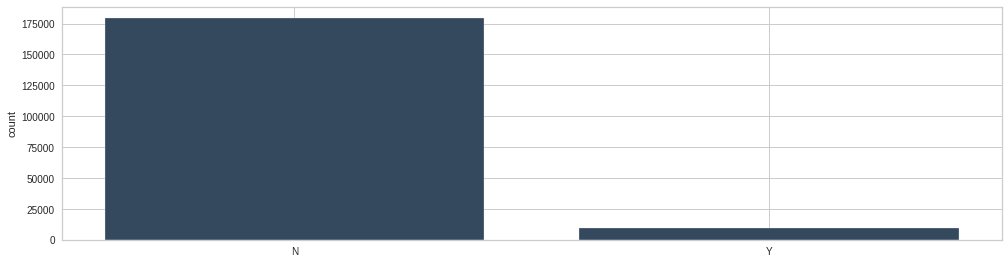

GARDEN_ADDON_PRE_REN


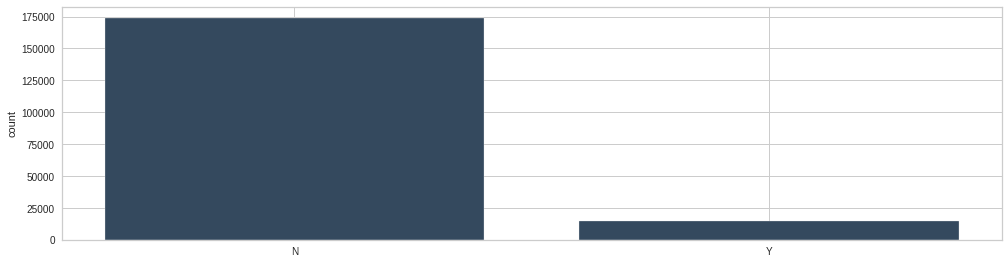

GARDEN_ADDON_POST_REN


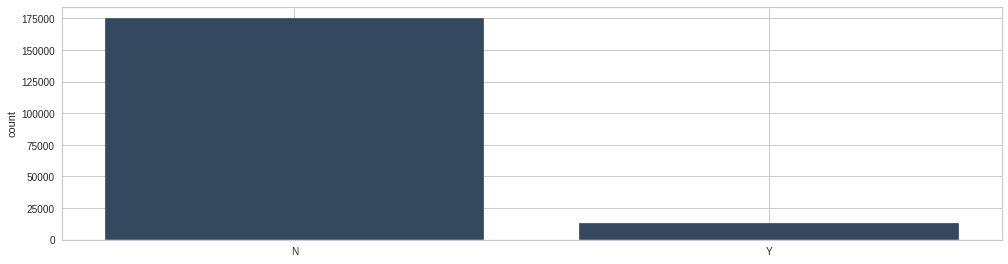

KEYCARE_ADDON_PRE_REN


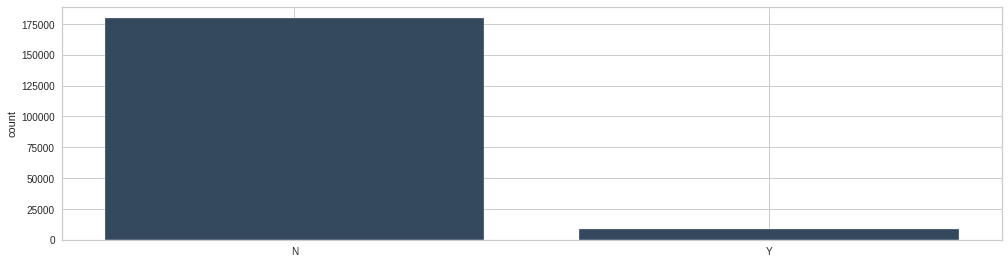

KEYCARE_ADDON_POST_REN


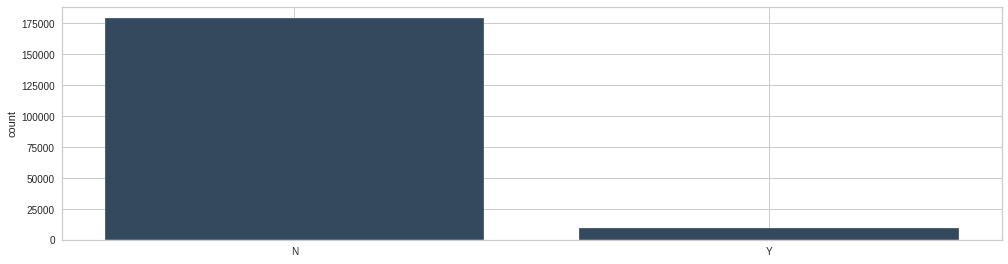

HP1_ADDON_PRE_REN


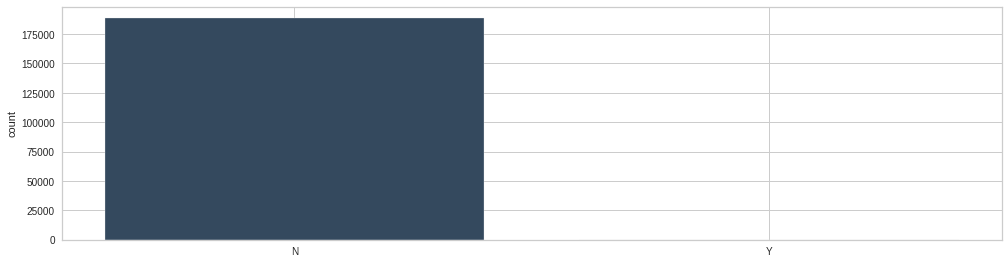

HP1_ADDON_POST_REN


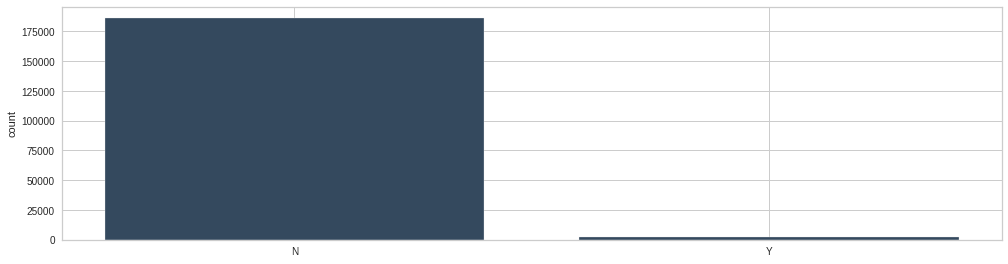

HP2_ADDON_PRE_REN


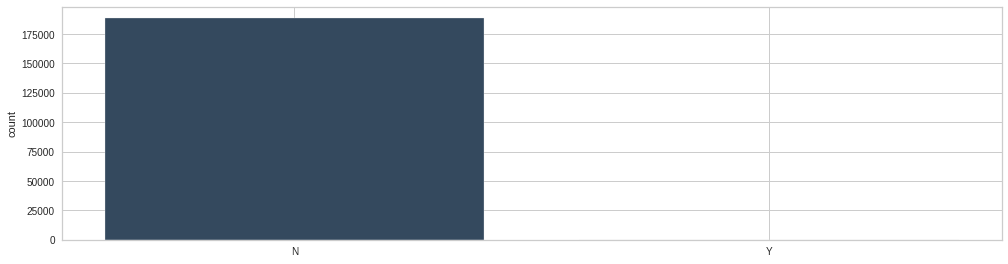

HP2_ADDON_POST_REN


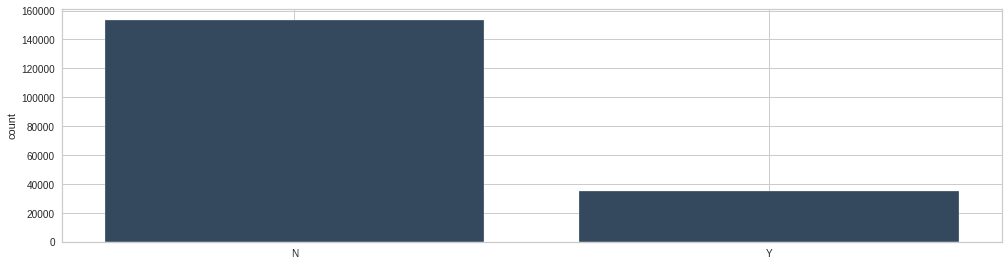

HP3_ADDON_PRE_REN


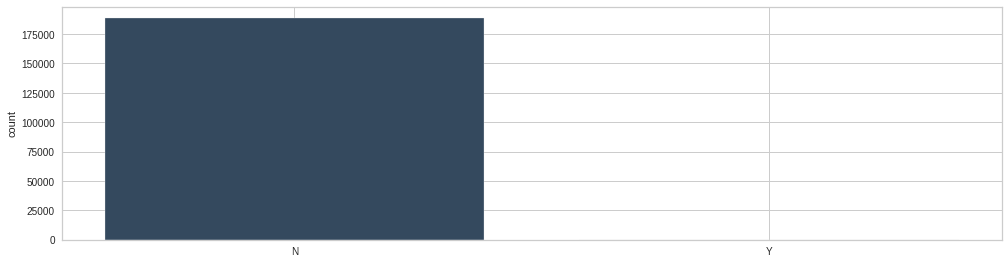

HP3_ADDON_POST_REN


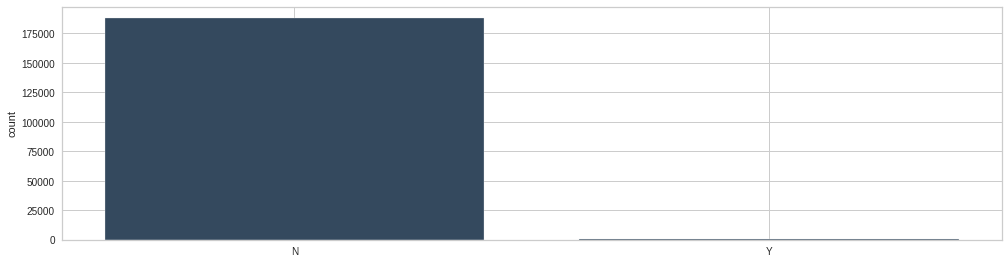

MTA_FLAG


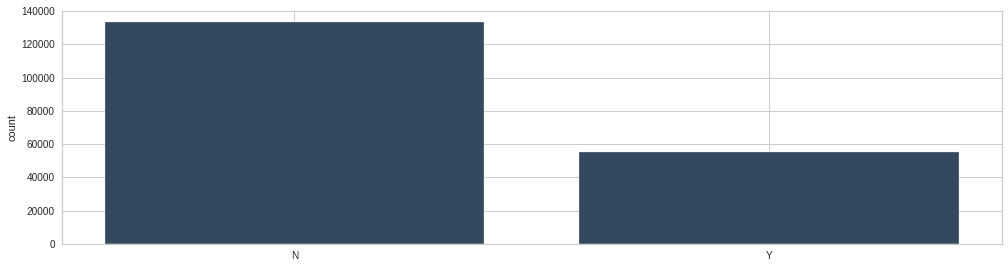

POL_STATUS


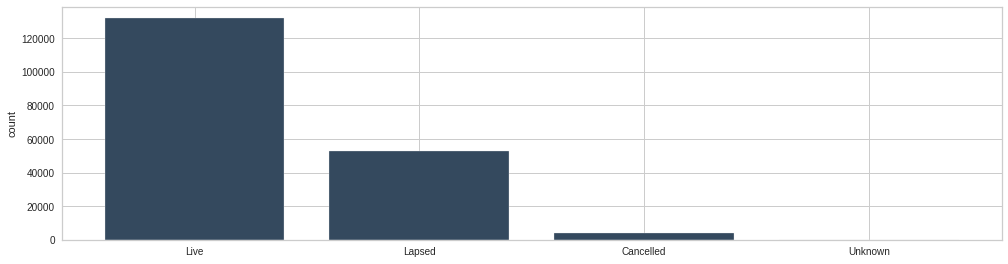

In [ ]:
for col in cat_cols:
    print(col)
    #print('Skew :', round(df4[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    #plt.subplot(1, 2, 1)
    # Calculate the value counts
    counts = df4[col].value_counts()

    # Plot the bar chart
    plt.bar(counts.index, counts.values)
    plt.ylabel('count')
   # plt.subplot(1, 2, 2)
    #sns.boxplot(x=df4[col])
    plt.show()

## Calculate the age of policy holders

Months the cover started - P1_DOB

Now that we have changed the data types to appropriate ones.

We will use DOB to get the age to when the cover started


In [ ]:
df_years = df4.copy()

#### We want to get the years

In [ ]:
from datetime import datetime

df_years['birthday_year'] = df_years['P1_DOB'].dt.year
df_years['cover_year'] = df_years['COVER_START'].dt.year

df_years['client_age'] = df_years['cover_year'] - df_years['birthday_year']


In [ ]:
#Getting a glimpse of the new created variable "client_age"
df_years['client_age']

0         68
1         38
2         60
3         82
4         71
          ..
256131    68
256132    72
256133    61
256134    67
256135    57
Name: client_age, Length: 189021, dtype: int32

In [ ]:
df_years.describe().T

,count,mean,min,25%,50%,75%,max,std
COVER_START,189021,2007-06-05 09:15:23.383116288,1992-11-05 00:00:00,2005-01-07 00:00:00,2008-12-26 00:00:00,2010-11-24 00:00:00,2012-01-30 00:00:00,NaN
RISK_RATED_AREA_B,189021.0,10.27444,0.0,6.0,10.27444,12.0,98.0,7.294858
RISK_RATED_AREA_C,189021.0,9.055649,0.0,4.0,8.0,13.0,98.0,7.446483
SPEC_SUM_INSURED,189021.0,329.517122,0.0,0.0,0.0,0.0,47500.0,1333.646192
SPEC_ITEM_PREM,189021.0,2.507135,0.0,0.0,0.0,0.0,973.53,10.666524
UNSPEC_HRP_PREM,189021.0,5.653579,0.0,0.0,0.0,12.45,162.61,10.254535
P1_DOB,189021,1939-11-08 22:24:11.153046528,1890-01-01 00:00:00,1931-09-05 00:00:00,1939-01-31 00:00:00,1947-05-30 00:00:00,1991-02-19 00:00:00,NaN
YEARBUILT,189021.0,1944.994715,1749.0,1920.0,1946.0,1960.0,2000.0,28.903691
LAST_ANN_PREM_GROSS,189021.0,186.72464,-1152.68,123.38,177.34,234.96,4631.86,99.49624
birthday_year,189021.0,1939.363404,1890.0,1931.0,1939.0,1947.0,1991.0,10.908454


We added three more columns: birtday_year, cover_year and client_age. That is why we created a new dataframe.

In [ ]:
#We the visualize

Skew : -0.36


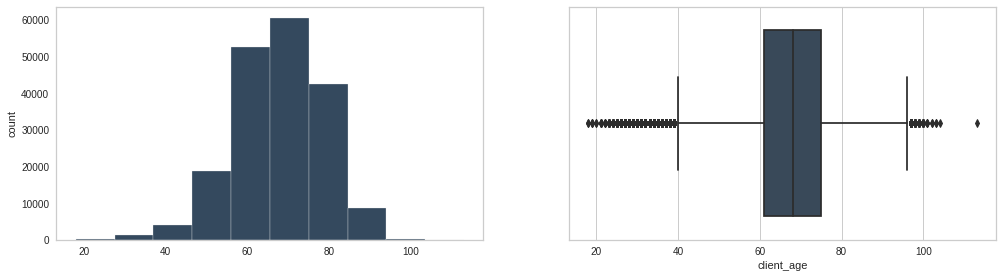

In [ ]:
print('Skew :', round(df_years['client_age'].skew(), 2))
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
df_years['client_age'].hist(grid=False)
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x = df_years['client_age'])
plt.show()

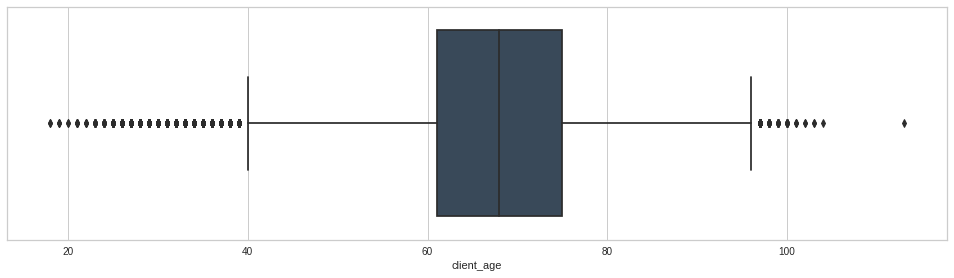

In [ ]:
plt.figure(figsize = (15, 4))
sns.boxplot(x = df_years['client_age'])
plt.show()

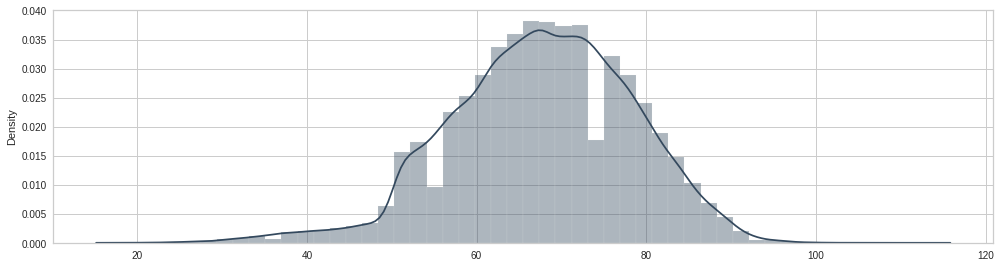

In [ ]:
plt.figure(figsize = (15, 4))
sns.distplot(x = df_years['client_age'])
plt.show()

We observe that the client's ages are normally distributed.

From the distplot we observe that people from age 68 to around 75 bought more polices. This implies that Retired people buy more home insurance products as that is the range where most people tend to retire.  

### We also convert 'YEARBUILT' to datetime.
THis will enable us to determine the building's age.

In [ ]:
 df_years['YEARBUILT'] = pd.to_datetime(df_years['YEARBUILT'], format='%Y')

In [ ]:
df_years['building_year'] = df_years['YEARBUILT'].dt.year
df_years['cover_year'] = df_years['COVER_START'].dt.year

df_years['Building_age'] = df_years['cover_year'] - df_years['building_year']

In [ ]:
df_years.describe().T

,count,mean,min,25%,50%,75%,max,std
COVER_START,189021,2007-06-05 09:15:23.383116288,1992-11-05 00:00:00,2005-01-07 00:00:00,2008-12-26 00:00:00,2010-11-24 00:00:00,2012-01-30 00:00:00,NaN
RISK_RATED_AREA_B,189021.0,10.27444,0.0,6.0,10.27444,12.0,98.0,7.294858
RISK_RATED_AREA_C,189021.0,9.055649,0.0,4.0,8.0,13.0,98.0,7.446483
SPEC_SUM_INSURED,189021.0,329.517122,0.0,0.0,0.0,0.0,47500.0,1333.646192
SPEC_ITEM_PREM,189021.0,2.507135,0.0,0.0,0.0,0.0,973.53,10.666524
UNSPEC_HRP_PREM,189021.0,5.653579,0.0,0.0,0.0,12.45,162.61,10.254535
P1_DOB,189021,1939-11-08 22:24:11.153046528,1890-01-01 00:00:00,1931-09-05 00:00:00,1939-01-31 00:00:00,1947-05-30 00:00:00,1991-02-19 00:00:00,NaN
YEARBUILT,189021,1944-12-29 15:19:52.038979840,1749-01-01 00:00:00,1920-01-01 00:00:00,1946-01-01 00:00:00,1960-01-01 00:00:00,2000-01-01 00:00:00,NaN
LAST_ANN_PREM_GROSS,189021.0,186.72464,-1152.68,123.38,177.34,234.96,4631.86,99.49624
birthday_year,189021.0,1939.363404,1890.0,1931.0,1939.0,1947.0,1991.0,10.908454


We have added building year and Building_age.

Next we check the number of buildings per year built.

In [ ]:
year_built = df_years[(df_years['building_year'] != 'null') & (df_years['building_year'] > 0)]
year_built = year_built.groupby('building_year').size().reset_index(name='count')
year_built = year_built.sort_values('building_year')

pd.DataFrame(year_built).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
building_year,1749,1750,1869,1870,1871,1900,1910,1920,1930,1946,1950,1960,1970,1980,1990,1995,2000
count,222,6,2564,2835,11,15687,1,33679,4,64831,4,31287,2,28057,5692,3,4136


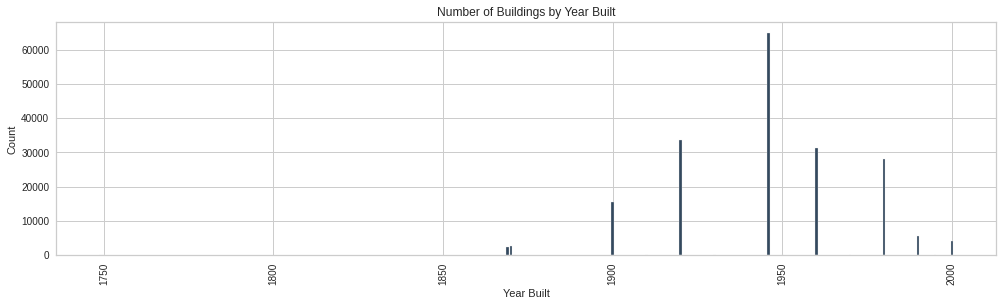

In [ ]:
plt.figure(figsize=(15,4))
plt.bar(year_built['building_year'], year_built['count'])
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.title('Number of Buildings by Year Built')
plt.xticks(rotation=90)
plt.show()

Skew : 0.83


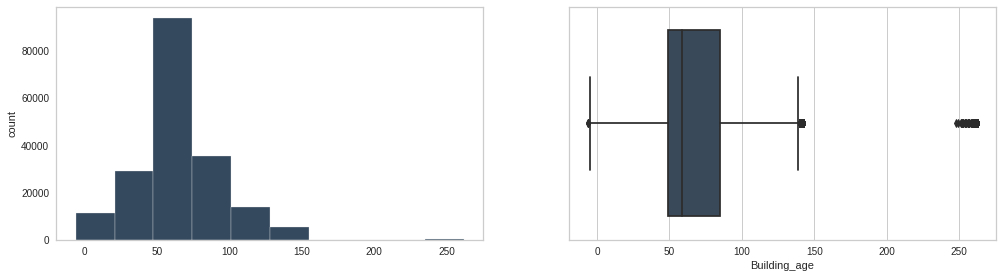

In [ ]:
print('Skew :', round(df_years['Building_age'].skew(), 2))
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
df_years['Building_age'].hist(grid=False)
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x = df_years['Building_age'])
plt.show()

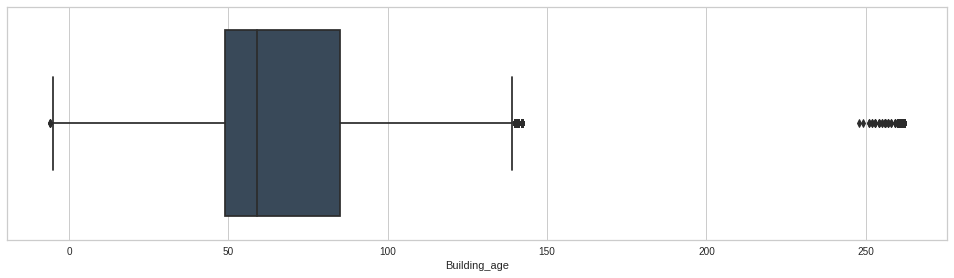

In [ ]:
plt.figure(figsize = (15, 4))
sns.boxplot(x = df_years['Building_age'])
plt.show()

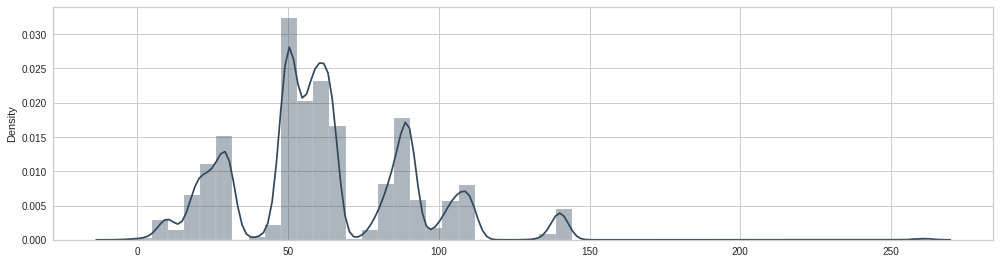

In [ ]:
plt.figure(figsize = (15, 4))
sns.distplot(x = df_years['Building_age'])
plt.show()

In [ ]:
df_years.head()

,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,BUS_USE,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,...,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,LAST_ANN_PREM_GROSS,POL_STATUS,birthday_year,cover_year,client_age,building_year,Building_age
0,2007-11-22,N,R,N,Y,19.00000,1000000.0,7.0,Y,6.0,...,N,N,N,274.81,Lapsed,1939,2007,68,1960,47
1,2008-01-01,N,E,Y,Y,25.00000,1000000.0,6.0,Y,9.0,...,N,N,Y,308.83,Live,1970,2008,38,1960,48
2,2007-11-23,N,E,N,N,10.27444,0.0,0.0,Y,12.0,...,N,N,Y,52.65,Live,1947,2007,60,1946,61
3,2007-12-12,N,R,N,N,10.27444,0.0,0.0,Y,14.0,...,N,N,N,54.23,Live,1925,2007,82,1870,137
4,2007-12-15,N,R,N,Y,5.00000,1000000.0,7.0,Y,10.0,...,N,N,N,244.58,Live,1936,2007,71,1960,47


In [ ]:
df_years.shape

(189021, 62)

We now have 62 columns as we have added five columns:
- Cover year
- Birthday year
- Client age
- Building year
- Building age

In [ ]:
df_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189021 entries, 0 to 256135
Data columns (total 62 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   COVER_START             189021 non-null  datetime64[ns]
 1   CLAIM3YEARS             189021 non-null  object        
 2   P1_EMP_STATUS           189021 non-null  object        
 3   BUS_USE                 189021 non-null  object        
 4   AD_BUILDINGS            189021 non-null  object        
 5   RISK_RATED_AREA_B       189021 non-null  float64       
 6   SUM_INSURED_BUILDINGS   189021 non-null  object        
 7   NCD_GRANTED_YEARS_B     189021 non-null  object        
 8   AD_CONTENTS             189021 non-null  object        
 9   RISK_RATED_AREA_C       189021 non-null  float64       
 10  SUM_INSURED_CONTENTS    189021 non-null  object        
 11  NCD_GRANTED_YEARS_C     189021 non-null  object        
 12  CONTENTS_COVER          189021 non-

In [ ]:
df_years.describe().T

,count,mean,min,25%,50%,75%,max,std
COVER_START,189021,2007-06-05 09:15:23.383116288,1992-11-05 00:00:00,2005-01-07 00:00:00,2008-12-26 00:00:00,2010-11-24 00:00:00,2012-01-30 00:00:00,NaN
RISK_RATED_AREA_B,189021.0,10.27444,0.0,6.0,10.27444,12.0,98.0,7.294858
RISK_RATED_AREA_C,189021.0,9.055649,0.0,4.0,8.0,13.0,98.0,7.446483
SPEC_SUM_INSURED,189021.0,329.517122,0.0,0.0,0.0,0.0,47500.0,1333.646192
SPEC_ITEM_PREM,189021.0,2.507135,0.0,0.0,0.0,0.0,973.53,10.666524
UNSPEC_HRP_PREM,189021.0,5.653579,0.0,0.0,0.0,12.45,162.61,10.254535
P1_DOB,189021,1939-11-08 22:24:11.153046528,1890-01-01 00:00:00,1931-09-05 00:00:00,1939-01-31 00:00:00,1947-05-30 00:00:00,1991-02-19 00:00:00,NaN
YEARBUILT,189021,1944-12-29 15:19:52.038979840,1749-01-01 00:00:00,1920-01-01 00:00:00,1946-01-01 00:00:00,1960-01-01 00:00:00,2000-01-01 00:00:00,NaN
LAST_ANN_PREM_GROSS,189021.0,186.72464,-1152.68,123.38,177.34,234.96,4631.86,99.49624
birthday_year,189021.0,1939.363404,1890.0,1931.0,1939.0,1947.0,1991.0,10.908454


In [ ]:
df_years.shape

(189021, 62)

In [ ]:
df_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189021 entries, 0 to 256135
Data columns (total 62 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   COVER_START             189021 non-null  datetime64[ns]
 1   CLAIM3YEARS             189021 non-null  object        
 2   P1_EMP_STATUS           189021 non-null  object        
 3   BUS_USE                 189021 non-null  object        
 4   AD_BUILDINGS            189021 non-null  object        
 5   RISK_RATED_AREA_B       189021 non-null  float64       
 6   SUM_INSURED_BUILDINGS   189021 non-null  object        
 7   NCD_GRANTED_YEARS_B     189021 non-null  object        
 8   AD_CONTENTS             189021 non-null  object        
 9   RISK_RATED_AREA_C       189021 non-null  float64       
 10  SUM_INSURED_CONTENTS    189021 non-null  object        
 11  NCD_GRANTED_YEARS_C     189021 non-null  object        
 12  CONTENTS_COVER          189021 non-

#### Here,we will handle the outliers, encode categorical variables and introduce new features into the final data set we will for modeling.

### OUTLIERS
https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

Due to the presence of outliers in most columns we need to treat the outliers by replacing the values with mean as the column consists of continuous data.


In [ ]:
#Checking for the data types
cat_cols=df_years.select_dtypes(include=['object']).columns
num_cols = df_years.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("sum of cat_variables:",len(cat_cols))
print("Numerical Variables:")
print(num_cols)
print("sum of numerical_variables:",len(num_cols))

Categorical Variables:
Index(['CLAIM3YEARS', 'P1_EMP_STATUS', 'BUS_USE', 'AD_BUILDINGS',
       'SUM_INSURED_BUILDINGS', 'NCD_GRANTED_YEARS_B', 'AD_CONTENTS',
       'SUM_INSURED_CONTENTS', 'NCD_GRANTED_YEARS_C', 'CONTENTS_COVER',
       'BUILDINGS_COVER', 'P1_MAR_STATUS', 'P1_POLICY_REFUSED', 'P1_SEX',
       'APPR_ALARM', 'APPR_LOCKS', 'BEDROOMS', 'ROOF_CONSTRUCTION',
       'WALL_CONSTRUCTION', 'FLOODING', 'LISTED', 'MAX_DAYS_UNOCC',
       'NEIGH_WATCH', 'OCC_STATUS', 'OWNERSHIP_TYPE', 'PAYING_GUESTS',
       'PROP_TYPE', 'SAFE_INSTALLED', 'SEC_DISC_REQ', 'SUBSIDENCE',
       'PAYMENT_METHOD', 'PAYMENT_FREQUENCY', 'LEGAL_ADDON_PRE_REN',
       'LEGAL_ADDON_POST_REN', 'HOME_EM_ADDON_PRE_REN',
       'HOME_EM_ADDON_POST_REN', 'GARDEN_ADDON_PRE_REN',
       'GARDEN_ADDON_POST_REN', 'KEYCARE_ADDON_PRE_REN',
       'KEYCARE_ADDON_POST_REN', 'HP1_ADDON_PRE_REN', 'HP1_ADDON_POST_REN',
       'HP2_ADDON_PRE_REN', 'HP2_ADDON_POST_REN', 'HP3_ADDON_PRE_REN',
       'HP3_ADDON_POST_REN', 'MTA_

In [ ]:
df_years['UNSPEC_HRP_PREM'].nunique()

2993

## Boxplot to visualize the outliers

RISK_RATED_AREA_B
Skew : 1.66


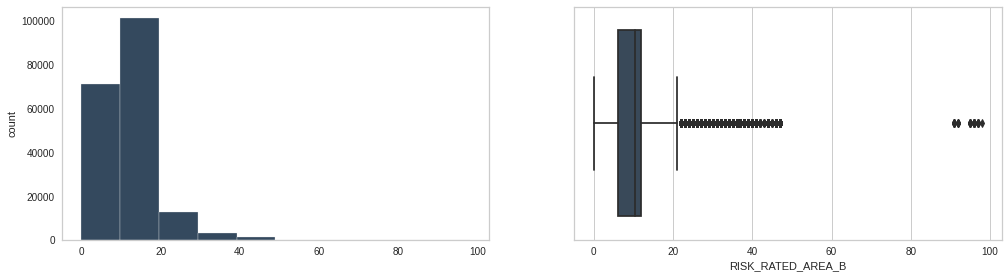

RISK_RATED_AREA_C
Skew : 1.33


<Figure size 576x396 with 0 Axes>

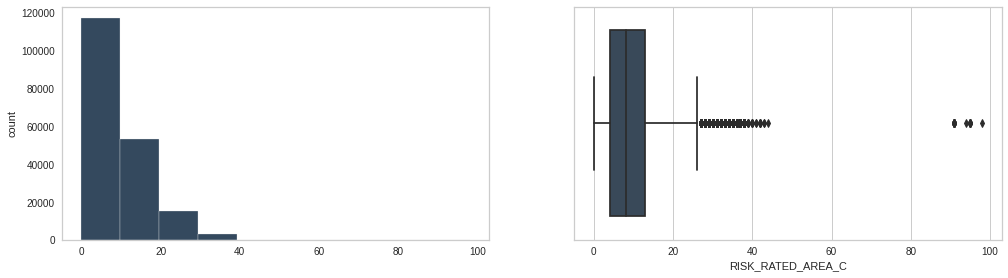

SPEC_SUM_INSURED
Skew : 6.99


<Figure size 576x396 with 0 Axes>

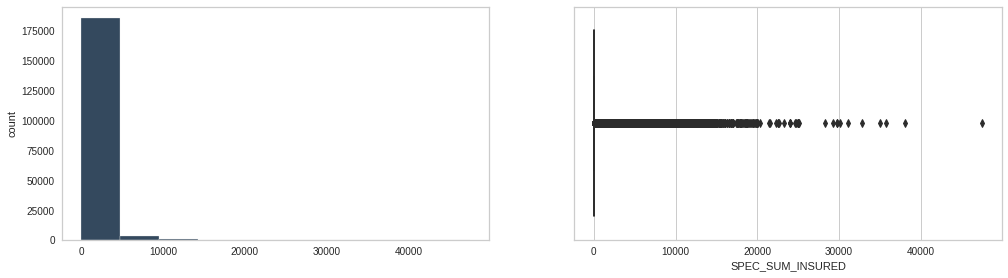

SPEC_ITEM_PREM
Skew : 12.77


<Figure size 576x396 with 0 Axes>

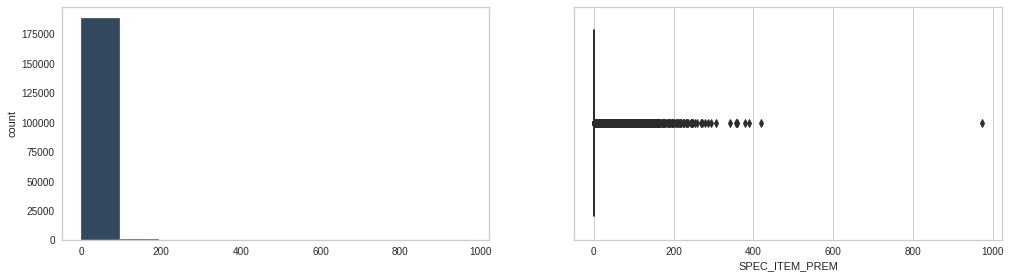

UNSPEC_HRP_PREM
Skew : 1.8


<Figure size 576x396 with 0 Axes>

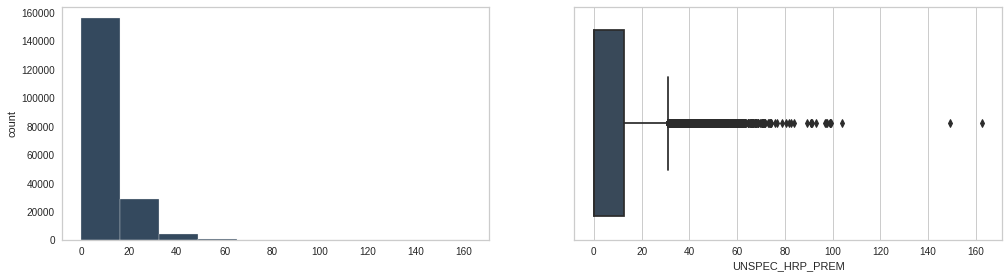

LAST_ANN_PREM_GROSS
Skew : 2.19


<Figure size 576x396 with 0 Axes>

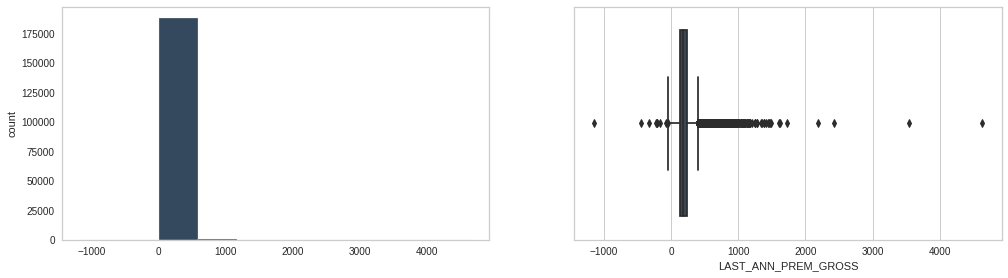

birthday_year
Skew : 0.36


KeyError: 'birthday_year'

<Figure size 576x396 with 0 Axes>

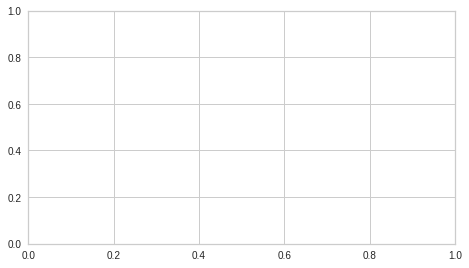

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(df_years[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df4[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_years[col])
    plt.show()
    plt.savefig('box_plot.png')

In [ ]:
print('Skew :', round(df_years['LAST_ANN_PREM_GROSS'].skew(), 2))
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.distplot(x = df_years['LAST_ANN_PREM_GROSS'])
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x = df_years['LAST_ANN_PREM_GROSS'])
plt.show()

In [ ]:
print('Skew :', round(df_years['LAST_ANN_PREM_GROSS'].skew(), 2))
plt.figure(figsize = (15, 4))
sns.distplot(x = df_years['LAST_ANN_PREM_GROSS'])
plt.show()

**TREATING OUTLIERS**

We create a new data set with the treated outliers

1. df_transformed
2. df_spec_SI



We will use the winsorizer method to handle the outliers [link text](https://feature-engine.trainindata.com/en/latest/user_guide/outliers/Winsorizer.html).

In [ ]:
#Install feature-engine
pip install feature-engine

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from feature_engine.outliers import Winsorizer

RISK_RATED_AREA_B


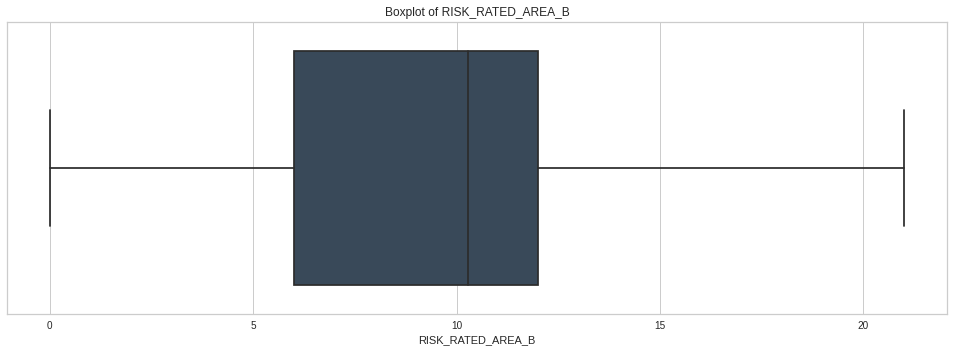

RISK_RATED_AREA_C


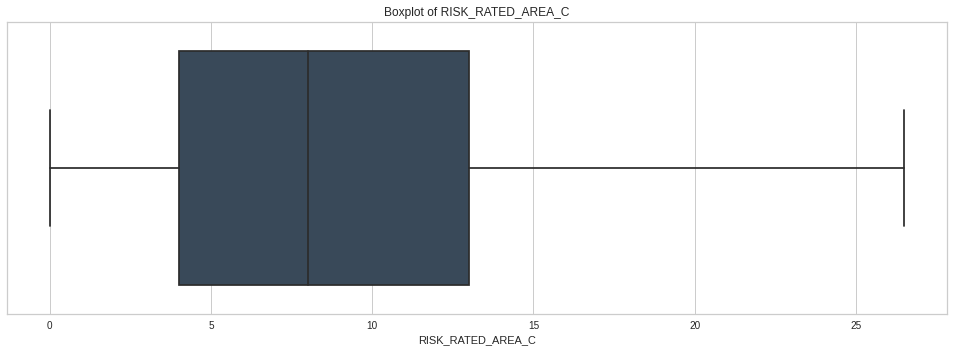

UNSPEC_HRP_PREM


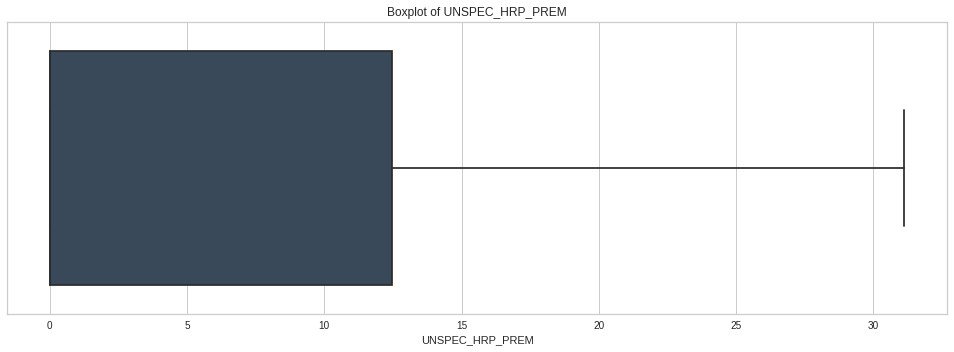

LAST_ANN_PREM_GROSS


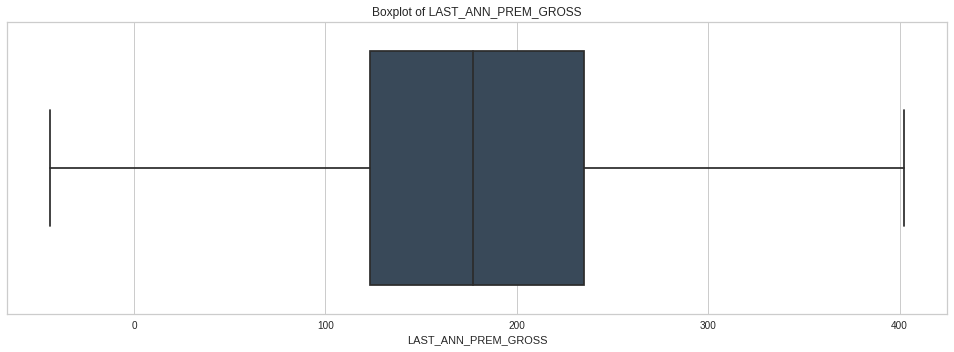

client_age


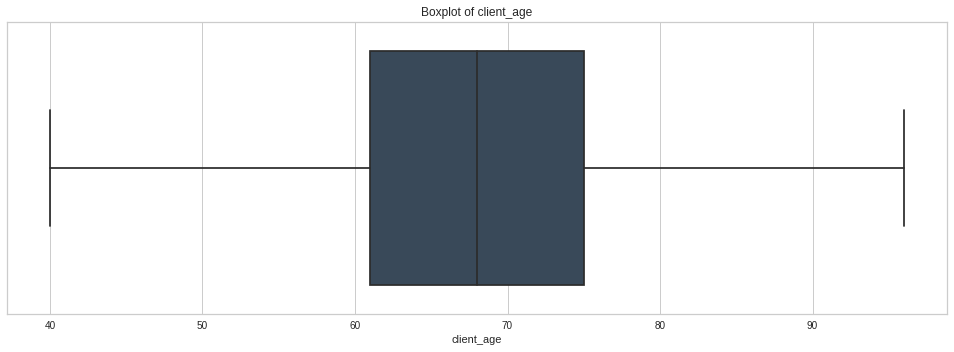

Building_age


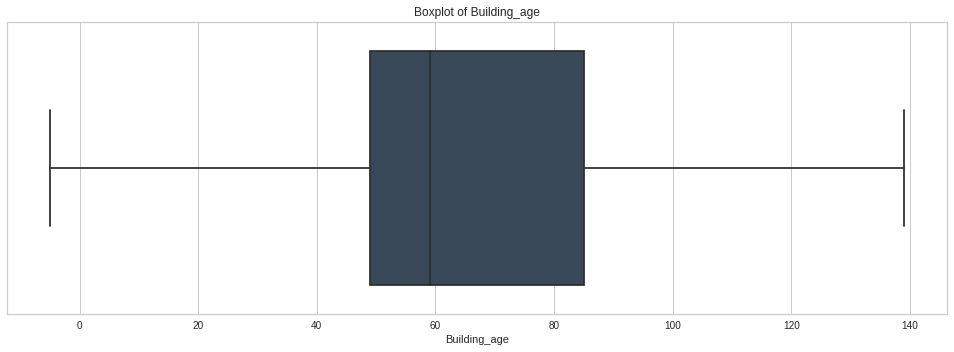

In [ ]:
# Define the columns to be treated
columns_to_winsorize = ['RISK_RATED_AREA_B', 'RISK_RATED_AREA_C','UNSPEC_HRP_PREM','LAST_ANN_PREM_GROSS','client_age', 'Building_age']

# Create a new DataFrame to store the transformed data
df_transformed = df_years

# Apply winsorization to each column
for col in columns_to_winsorize:
    winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=[col])
    df_transformed[col] = winsorizer.fit_transform(df_transformed[[col]])

# Generate boxplots for each column
for col in columns_to_winsorize:
    print(col)
    plt.figure(figsize=(15,5))
    sns.boxplot(x=df_transformed[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

We can see that the variables no longer have outliers.

In [ ]:
df_transformed.shape

(189021, 62)

In [ ]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189021 entries, 0 to 256135
Data columns (total 62 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   COVER_START             189021 non-null  datetime64[ns]
 1   CLAIM3YEARS             189021 non-null  object        
 2   P1_EMP_STATUS           189021 non-null  object        
 3   BUS_USE                 189021 non-null  object        
 4   AD_BUILDINGS            189021 non-null  object        
 5   RISK_RATED_AREA_B       189021 non-null  float64       
 6   SUM_INSURED_BUILDINGS   189021 non-null  object        
 7   NCD_GRANTED_YEARS_B     189021 non-null  object        
 8   AD_CONTENTS             189021 non-null  object        
 9   RISK_RATED_AREA_C       189021 non-null  float64       
 10  SUM_INSURED_CONTENTS    189021 non-null  object        
 11  NCD_GRANTED_YEARS_C     189021 non-null  object        
 12  CONTENTS_COVER          189021 non-

NOW we treat the outliers in the SPEC_SUM_INSURED. We will use gaussian method as the IQR could not work because its values were not varying.

SPEC_SUM_INSURED


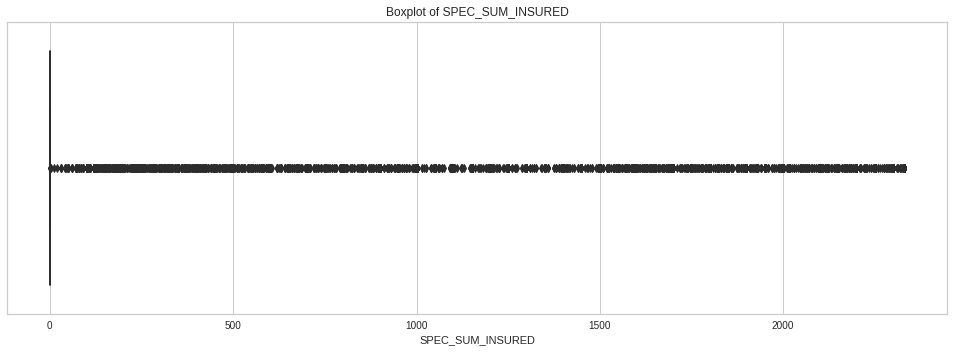

SPEC_ITEM_PREM


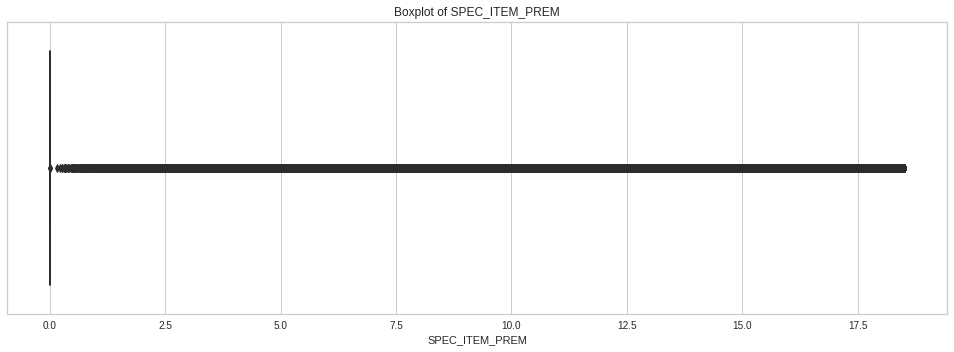

In [ ]:
# Define the columns to be treated
columns_to_winsorize2 = ['SPEC_SUM_INSURED','SPEC_ITEM_PREM']

# Create a new DataFrame to store the transformed data
df_transformed2 = df_transformed.copy()

# Apply winsorization to each column
for col in columns_to_winsorize2:
    winsorizer = Winsorizer(capping_method='gaussian', tail='both', fold=1.5, variables=[col])
    df_transformed2[col] = winsorizer.fit_transform(df_transformed2[[col]])

# Generate boxplots for each column
for col in columns_to_winsorize2:
    print(col)
    plt.figure(figsize=(15,5))
    sns.boxplot(x=df_transformed2[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

The ouliers in the two columns reduced a bit.

In [ ]:
df_transformed2.shape

(189021, 62)

## EDA

https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

<Axes: xlabel='BEDROOMS', ylabel='LAST_ANN_PREM_GROSS'>

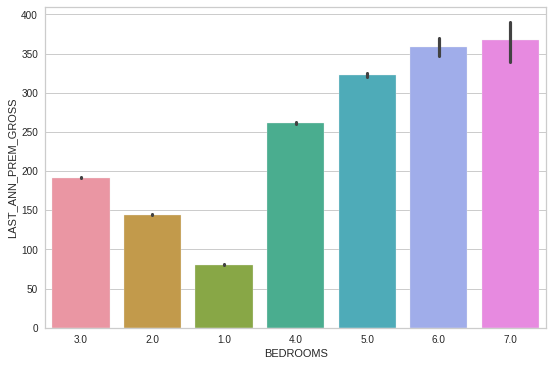

In [ ]:

#plotting bar plot between number of bedrooms and premium charged.
sns.barplot(x='BEDROOMS', y='LAST_ANN_PREM_GROSS', data=df_transformed2)


<Axes: xlabel='PAYING_GUESTS', ylabel='LAST_ANN_PREM_GROSS'>

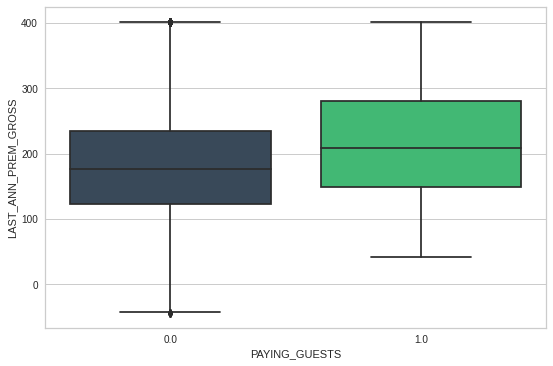

In [ ]:
#plotting box plot between number of bedrooms and premium charged.
sns.boxplot(x='PAYING_GUESTS', y='LAST_ANN_PREM_GROSS', data=df_transformed2)


<Axes: xlabel='LISTED', ylabel='LAST_ANN_PREM_GROSS'>

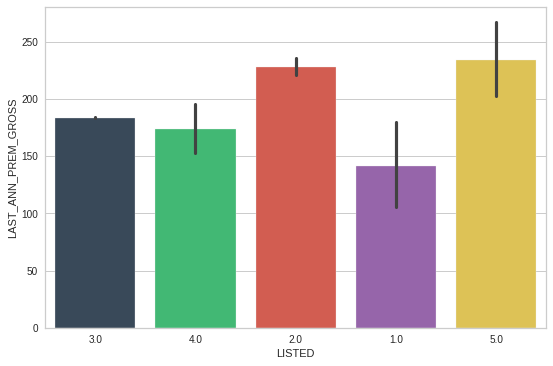

In [ ]:
#plotting bar plot between number of bedrooms and premium charged.
sns.barplot(x='LISTED', y='LAST_ANN_PREM_GROSS', data=df_transformed2)


<Axes: xlabel='LISTED', ylabel='LAST_ANN_PREM_GROSS'>

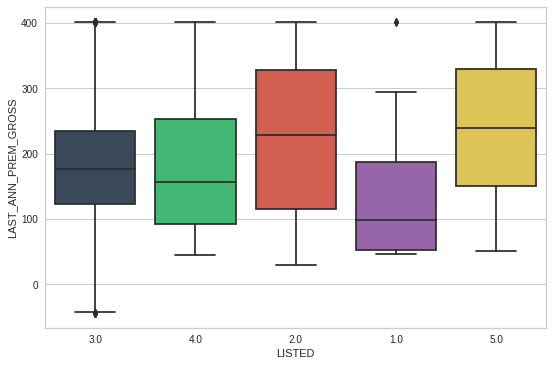

In [ ]:
#plotting box plot between alcohol and quality
sns.boxplot(x='LISTED', y='LAST_ANN_PREM_GROSS', data=df_transformed2)


<Axes: xlabel='CLAIM3YEARS', ylabel='LAST_ANN_PREM_GROSS'>

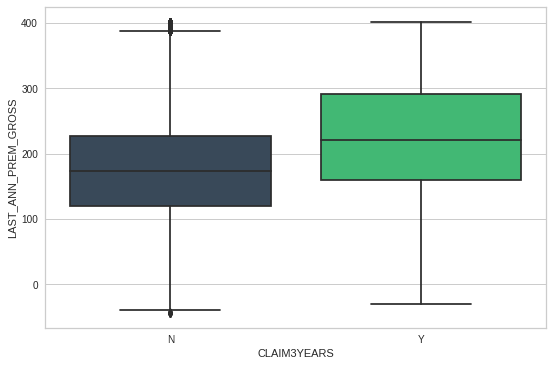

In [ ]:
#plotting box plot between alcohol and quality
sns.boxplot(x='CLAIM3YEARS', y='LAST_ANN_PREM_GROSS', data=df_transformed2)


<Axes: xlabel='BUS_USE', ylabel='LAST_ANN_PREM_GROSS'>

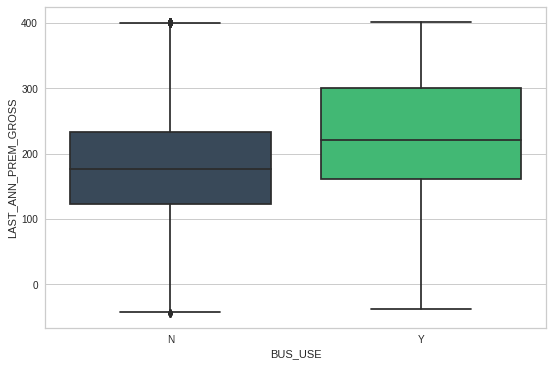

In [ ]:
#plotting box plot between alcohol and quality
sns.boxplot(x='BUS_USE', y='LAST_ANN_PREM_GROSS', data=df_transformed2)


<Axes: xlabel='AD_BUILDINGS', ylabel='LAST_ANN_PREM_GROSS'>

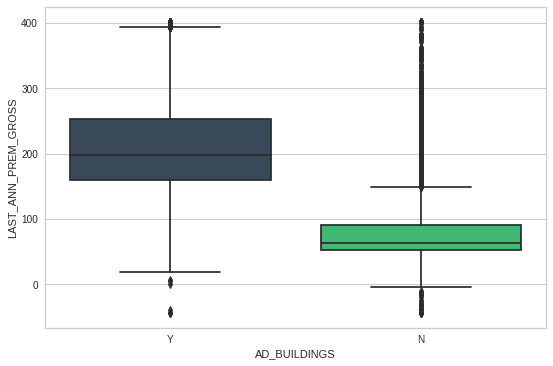

In [ ]:
#plotting box plot between alcohol and quality
sns.boxplot(x='AD_BUILDINGS', y='LAST_ANN_PREM_GROSS', data=df_transformed2)


<Axes: xlabel='AD_CONTENTS', ylabel='LAST_ANN_PREM_GROSS'>

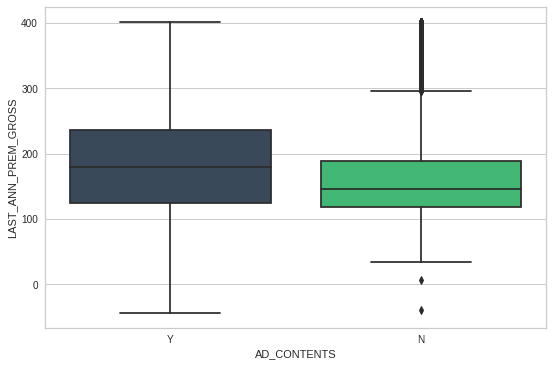

In [ ]:
#plotting box plot between alcohol and quality
sns.boxplot(x='AD_CONTENTS', y='LAST_ANN_PREM_GROSS', data=df_transformed2)


In [ ]:
df_transformed2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189021 entries, 0 to 256135
Data columns (total 62 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   COVER_START             189021 non-null  datetime64[ns]
 1   CLAIM3YEARS             189021 non-null  object        
 2   P1_EMP_STATUS           189021 non-null  object        
 3   BUS_USE                 189021 non-null  object        
 4   AD_BUILDINGS            189021 non-null  object        
 5   RISK_RATED_AREA_B       189021 non-null  float64       
 6   SUM_INSURED_BUILDINGS   189021 non-null  object        
 7   NCD_GRANTED_YEARS_B     189021 non-null  object        
 8   AD_CONTENTS             189021 non-null  object        
 9   RISK_RATED_AREA_C       189021 non-null  float64       
 10  SUM_INSURED_CONTENTS    189021 non-null  object        
 11  NCD_GRANTED_YEARS_C     189021 non-null  object        
 12  CONTENTS_COVER          189021 non-

In [ ]:
#df_transformed2.to_csv('/content/drive/MyDrive/Internship/Project/for_encoding.csv', index=False)

# DATA ENCODING

Now that we have handled missing data and treated the outliers, we proceed to encoding the categorical columns.

In [ ]:
#We check for the categorical columns in the data set
cat_cols=df_transformed2.select_dtypes(include=['object']).columns
num_cols = df_transformed2.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("sum of cat_variables:",len(cat_cols))
print("Numerical Variables:")
print(num_cols)
print("sum of numerical_variables:",len(num_cols))

Categorical Variables:
Index(['CLAIM3YEARS', 'P1_EMP_STATUS', 'BUS_USE', 'AD_BUILDINGS',
       'SUM_INSURED_BUILDINGS', 'NCD_GRANTED_YEARS_B', 'AD_CONTENTS',
       'SUM_INSURED_CONTENTS', 'NCD_GRANTED_YEARS_C', 'CONTENTS_COVER',
       'BUILDINGS_COVER', 'P1_MAR_STATUS', 'P1_POLICY_REFUSED', 'P1_SEX',
       'APPR_ALARM', 'APPR_LOCKS', 'BEDROOMS', 'ROOF_CONSTRUCTION',
       'WALL_CONSTRUCTION', 'FLOODING', 'LISTED', 'MAX_DAYS_UNOCC',
       'NEIGH_WATCH', 'OCC_STATUS', 'OWNERSHIP_TYPE', 'PAYING_GUESTS',
       'PROP_TYPE', 'SAFE_INSTALLED', 'SEC_DISC_REQ', 'SUBSIDENCE',
       'PAYMENT_METHOD', 'PAYMENT_FREQUENCY', 'LEGAL_ADDON_PRE_REN',
       'LEGAL_ADDON_POST_REN', 'HOME_EM_ADDON_PRE_REN',
       'HOME_EM_ADDON_POST_REN', 'GARDEN_ADDON_PRE_REN',
       'GARDEN_ADDON_POST_REN', 'KEYCARE_ADDON_PRE_REN',
       'KEYCARE_ADDON_POST_REN', 'HP1_ADDON_PRE_REN', 'HP1_ADDON_POST_REN',
       'HP2_ADDON_PRE_REN', 'HP2_ADDON_POST_REN', 'HP3_ADDON_PRE_REN',
       'HP3_ADDON_POST_REN', 'MTA_

### We create a new dataframe for encoding the categorical columns

In [ ]:
df_encoding = df_transformed2.copy()

In [ ]:
for col in cat_cols:
    #print(col)
    # Calculate the value counts
    counts = df_encoding[col].value_counts()
    print(counts)

CLAIM3YEARS
N    167185
Y     21836
Name: count, dtype: int64
P1_EMP_STATUS
R    146621
E     36398
S      3065
H      1069
U       921
N       754
V        68
A        52
F        29
I        28
C        16
Name: count, dtype: int64
BUS_USE
N    186077
Y      2944
Name: count, dtype: int64
AD_BUILDINGS
Y    147259
N     41762
Name: count, dtype: int64
SUM_INSURED_BUILDINGS
1000000.0    147083
0.0           41938
Name: count, dtype: int64
NCD_GRANTED_YEARS_B
6.0    88958
0.0    43755
7.0    25985
5.0    11221
3.0     9503
4.0     3458
9.0     2494
2.0     2268
1.0      833
8.0      546
Name: count, dtype: int64
AD_CONTENTS
Y    180452
N      8569
Name: count, dtype: int64
SUM_INSURED_CONTENTS
50000.0     178991
0.0           8735
75000.0        671
60000.0        309
70000.0         98
100000.0        59
65000.0         54
55000.0         44
80000.0         40
85000.0         11
90000.0          9
Name: count, dtype: int64
NCD_GRANTED_YEARS_C
6.0    110765
7.0     31788
5.0     12946
3

## We perform Label Encoding

In [ ]:
df_encoding['CLAIM3YEARS']=df_encoding['CLAIM3YEARS'].map({'N':0,'Y':1})
df_encoding['BUS_USE']=df_encoding['BUS_USE'].map({'N':0,'Y':1})
df_encoding['AD_BUILDINGS']=df_encoding['AD_BUILDINGS'].map({'N':0,'Y':1})
df_encoding['AD_CONTENTS']=df_encoding['AD_CONTENTS'].map({'N':0,'Y':1})
df_encoding['CONTENTS_COVER']=df_encoding['CONTENTS_COVER'].map({'N':0,'Y':1})
df_encoding['BUILDINGS_COVER']=df_encoding['BUILDINGS_COVER'].map({'N':0,'Y':1})
df_encoding['P1_POLICY_REFUSED']=df_encoding['P1_POLICY_REFUSED'].map({'N':0,'Y':1})
df_encoding['APPR_ALARM']=df_encoding['APPR_ALARM'].map({'N':0,'Y':1})
df_encoding['APPR_LOCKS']=df_encoding['APPR_LOCKS'].map({'N':0,'Y':1})
df_encoding['FLOODING']=df_encoding['FLOODING'].map({'N':0,'Y':1})
df_encoding['NEIGH_WATCH']=df_encoding['NEIGH_WATCH'].map({'N':0,'Y':1})

df_encoding['SAFE_INSTALLED']=df_encoding['SAFE_INSTALLED'].map({'N':0,'Y':1})
df_encoding['SEC_DISC_REQ']=df_encoding['SEC_DISC_REQ'].map({'N':0,'Y':1})
df_encoding['SUBSIDENCE']=df_encoding['SUBSIDENCE'].map({'N':0,'Y':1})
df_encoding['LEGAL_ADDON_PRE_REN']=df_encoding['LEGAL_ADDON_PRE_REN'].map({'N':0,'Y':1})
df_encoding['LEGAL_ADDON_POST_REN']=df_encoding['LEGAL_ADDON_POST_REN'].map({'N':0,'Y':1})
df_encoding['HOME_EM_ADDON_PRE_REN']=df_encoding['HOME_EM_ADDON_PRE_REN'].map({'N':0,'Y':1})
df_encoding['HOME_EM_ADDON_POST_REN']=df_encoding['HOME_EM_ADDON_POST_REN'].map({'N':0,'Y':1})
df_encoding['GARDEN_ADDON_PRE_REN']=df_encoding['GARDEN_ADDON_PRE_REN'].map({'N':0,'Y':1})
df_encoding['GARDEN_ADDON_POST_REN']=df_encoding['GARDEN_ADDON_POST_REN'].map({'N':0,'Y':1})
df_encoding['KEYCARE_ADDON_PRE_REN']=df_encoding['KEYCARE_ADDON_PRE_REN'].map({'N':0,'Y':1})

df_encoding['KEYCARE_ADDON_POST_REN']=df_encoding['KEYCARE_ADDON_POST_REN'].map({'N':0,'Y':1})
df_encoding['HP1_ADDON_PRE_REN']=df_encoding['HP1_ADDON_PRE_REN'].map({'N':0,'Y':1})
df_encoding['HP1_ADDON_POST_REN']=df_encoding['HP1_ADDON_POST_REN'].map({'N':0,'Y':1})
df_encoding['HP2_ADDON_PRE_REN']=df_encoding['HP2_ADDON_PRE_REN'].map({'N':0,'Y':1})
df_encoding['HP2_ADDON_POST_REN']=df_encoding['HP2_ADDON_POST_REN'].map({'N':0,'Y':1})
df_encoding['HP3_ADDON_PRE_REN']=df_encoding['HP3_ADDON_PRE_REN'].map({'N':0,'Y':1})
df_encoding['HP3_ADDON_POST_REN']=df_encoding['HP3_ADDON_POST_REN'].map({'N':0,'Y':1})
#df_years['APPR_ALARM']=df_years['APPR_ALARM'].map({'N':0,'Y':1})
df_encoding['MTA_FLAG']=df_encoding['MTA_FLAG'].map({'N':0,'Y':1})
df_encoding['SUM_INSURED_BUILDINGS']=df_encoding['SUM_INSURED_BUILDINGS'].map({'0.0':0,'1000000.0':1})

In [ ]:
df_encoding['P1_SEX']=df_encoding['P1_SEX'].map({'M':0,'F':1,'N':2})
df_encoding['PAYMENT_METHOD']=df_encoding['PAYMENT_METHOD'].map({'PureDD':0,'NonDD':1,'DD-Other':2})
df_encoding['P1_EMP_STATUS']=df_encoding['P1_EMP_STATUS'].map({'R':0,'E':1,'S':2,'N':3,'H':4,'U':5,'A':6,'F':7,'V':8,'I':9,'C':10})
df_encoding['OCC_STATUS']=df_encoding['OCC_STATUS'].map({'PH':0,'UN':1,'LP':2,'HH':3,'WD':4,'WE':5,'OT':6})
df_encoding['POL_STATUS']=df_encoding['POL_STATUS'].map({'Lapsed':0,'Live':1,'Cancelled':2,'Unknown':3})
df_encoding['P1_MAR_STATUS']=df_encoding['P1_MAR_STATUS'].map({'M':0,'P':1,'O':2,'W':3,'S':4,'D':5,'A':6,'C':7,'B':8,'N':9})


In [ ]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189021 entries, 0 to 256135
Data columns (total 62 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   COVER_START             189021 non-null  datetime64[ns]
 1   CLAIM3YEARS             189021 non-null  int64         
 2   P1_EMP_STATUS           189021 non-null  int64         
 3   BUS_USE                 189021 non-null  int64         
 4   AD_BUILDINGS            189021 non-null  int64         
 5   RISK_RATED_AREA_B       189021 non-null  float64       
 6   SUM_INSURED_BUILDINGS   189021 non-null  int64         
 7   NCD_GRANTED_YEARS_B     189021 non-null  object        
 8   AD_CONTENTS             189021 non-null  int64         
 9   RISK_RATED_AREA_C       189021 non-null  float64       
 10  SUM_INSURED_CONTENTS    189021 non-null  object        
 11  NCD_GRANTED_YEARS_C     189021 non-null  object        
 12  CONTENTS_COVER          189021 non-

In [ ]:
#Checking the first five rows of the encoded data
df_encoding.head()

,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,BUS_USE,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,...,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,LAST_ANN_PREM_GROSS,POL_STATUS,birthday_year,cover_year,client_age,building_year,Building_age
0,2007-11-22,0,0,0,1,19.00000,1,7.0,1,6.0,...,0,0,0,274.81,0,1939,2007,68,1960,47
1,2008-01-01,0,1,1,1,21.00000,1,6.0,1,9.0,...,0,0,1,308.83,1,1970,2008,40,1960,48
2,2007-11-23,0,1,0,0,10.27444,0,0.0,1,12.0,...,0,0,1,52.65,1,1947,2007,60,1946,61
3,2007-12-12,0,0,0,0,10.27444,0,0.0,1,14.0,...,0,0,0,54.23,1,1925,2007,82,1870,137
4,2007-12-15,0,0,0,1,5.00000,1,7.0,1,10.0,...,0,0,0,244.58,1,1936,2007,71,1960,47


# Coming Up with a new variable

In [ ]:
df_clean = df_encoding.copy()

In [ ]:
df_clean.shape

(189021, 62)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189021 entries, 0 to 256135
Data columns (total 62 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   COVER_START             189021 non-null  datetime64[ns]
 1   CLAIM3YEARS             189021 non-null  int64         
 2   P1_EMP_STATUS           189021 non-null  int64         
 3   BUS_USE                 189021 non-null  int64         
 4   AD_BUILDINGS            189021 non-null  int64         
 5   RISK_RATED_AREA_B       189021 non-null  float64       
 6   SUM_INSURED_BUILDINGS   189021 non-null  int64         
 7   NCD_GRANTED_YEARS_B     189021 non-null  object        
 8   AD_CONTENTS             189021 non-null  int64         
 9   RISK_RATED_AREA_C       189021 non-null  float64       
 10  SUM_INSURED_CONTENTS    189021 non-null  object        
 11  NCD_GRANTED_YEARS_C     189021 non-null  object        
 12  CONTENTS_COVER          189021 non-

In [ ]:
df_clean.dtypes

COVER_START      datetime64[ns]
CLAIM3YEARS               int64
P1_EMP_STATUS             int64
BUS_USE                   int64
AD_BUILDINGS              int64
                      ...      
birthday_year             int32
cover_year                int32
client_age                int32
building_year             int32
Building_age              int32
Length: 62, dtype: object

**We convert some of the categorical variables which whose groups were in numerical values.**

In [ ]:
#Multiple columns string conversion
df_clean[['WALL_CONSTRUCTION','ROOF_CONSTRUCTION','BEDROOMS','SUM_INSURED_CONTENTS','PAYMENT_FREQUENCY']] = df_clean[['WALL_CONSTRUCTION', 'ROOF_CONSTRUCTION','BEDROOMS','SUM_INSURED_CONTENTS','PAYMENT_FREQUENCY']].astype(float)


In [ ]:
#Multiple columns string conversion
df_clean[['NCD_GRANTED_YEARS_B','NCD_GRANTED_YEARS_C','SUM_INSURED_BUILDINGS','OWNERSHIP_TYPE','PAYING_GUESTS','PROP_TYPE','LISTED','MAX_DAYS_UNOCC']] = df_clean[['NCD_GRANTED_YEARS_B','NCD_GRANTED_YEARS_C','SUM_INSURED_BUILDINGS','OWNERSHIP_TYPE','PAYING_GUESTS','PROP_TYPE','LISTED','MAX_DAYS_UNOCC']].astype(float)
print("After converting multiple columns to string:\n", df_clean.dtypes)

After converting multiple columns to string:
 COVER_START      datetime64[ns]
CLAIM3YEARS               int64
P1_EMP_STATUS             int64
BUS_USE                   int64
AD_BUILDINGS              int64
                      ...      
birthday_year             int32
cover_year                int32
client_age                int32
building_year             int32
Building_age              int32
Length: 62, dtype: object


In [ ]:
df_clean.head()

,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,BUS_USE,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,...,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,LAST_ANN_PREM_GROSS,POL_STATUS,birthday_year,cover_year,client_age,building_year,Building_age
0,2007-11-22,0,0,0,1,19.00000,1.0,7.0,1,6.0,...,0,0,0,274.81,0,1939,2007,68,1960,47
1,2008-01-01,0,1,1,1,21.00000,1.0,6.0,1,9.0,...,0,0,1,308.83,1,1970,2008,40,1960,48
2,2007-11-23,0,1,0,0,10.27444,0.0,0.0,1,12.0,...,0,0,1,52.65,1,1947,2007,60,1946,61
3,2007-12-12,0,0,0,0,10.27444,0.0,0.0,1,14.0,...,0,0,0,54.23,1,1925,2007,82,1870,137
4,2007-12-15,0,0,0,1,5.00000,1.0,7.0,1,10.0,...,0,0,0,244.58,1,1936,2007,71,1960,47


## Now we remove the year columns

In [ ]:
df_clean = df_clean.drop(['birthday_year','building_year','cover_year','COVER_START','P1_DOB'],axis=1)

In [ ]:
df_clean.shape

(189021, 57)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189021 entries, 0 to 256135
Data columns (total 57 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CLAIM3YEARS             189021 non-null  int64         
 1   P1_EMP_STATUS           189021 non-null  int64         
 2   BUS_USE                 189021 non-null  int64         
 3   AD_BUILDINGS            189021 non-null  int64         
 4   RISK_RATED_AREA_B       189021 non-null  float64       
 5   SUM_INSURED_BUILDINGS   189021 non-null  float64       
 6   NCD_GRANTED_YEARS_B     189021 non-null  float64       
 7   AD_CONTENTS             189021 non-null  int64         
 8   RISK_RATED_AREA_C       189021 non-null  float64       
 9   SUM_INSURED_CONTENTS    189021 non-null  float64       
 10  NCD_GRANTED_YEARS_C     189021 non-null  float64       
 11  CONTENTS_COVER          189021 non-null  int64         
 12  BUILDINGS_COVER         189021 non-

In [ ]:
df_clean = df_clean.drop(['YEARBUILT'],axis=1)

In [ ]:
df_clean.dtypes

CLAIM3YEARS                 int64
P1_EMP_STATUS               int64
BUS_USE                     int64
AD_BUILDINGS                int64
RISK_RATED_AREA_B         float64
SUM_INSURED_BUILDINGS     float64
NCD_GRANTED_YEARS_B       float64
AD_CONTENTS                 int64
RISK_RATED_AREA_C         float64
SUM_INSURED_CONTENTS      float64
NCD_GRANTED_YEARS_C       float64
CONTENTS_COVER              int64
BUILDINGS_COVER             int64
SPEC_SUM_INSURED          float64
SPEC_ITEM_PREM            float64
UNSPEC_HRP_PREM           float64
P1_MAR_STATUS               int64
P1_POLICY_REFUSED           int64
P1_SEX                      int64
APPR_ALARM                  int64
APPR_LOCKS                  int64
BEDROOMS                  float64
ROOF_CONSTRUCTION         float64
WALL_CONSTRUCTION         float64
FLOODING                    int64
LISTED                    float64
MAX_DAYS_UNOCC            float64
NEIGH_WATCH                 int64
OCC_STATUS                  int64
OWNERSHIP_TYPE

## Now that we have a clean data set, we can proceed to build our machine learning models


### Standardizing the 'SPEC_SUM_INSURED','SPEC_ITEM_PREMIUM' and 'UNSPEC_HRP_PREMIUM'

In [ ]:
import scipy
from scipy import stats
# List of columns to standardize
col_std = ['SPEC_SUM_INSURED','SPEC_ITEM_PREM','UNSPEC_HRP_PREM']

# Standardize each column
for col in col_std:
    df_clean[col] = stats.zscore(df_clean[col])

In [ ]:
df_clean[['SPEC_SUM_INSURED','SPEC_ITEM_PREM','UNSPEC_HRP_PREM']]

,SPEC_SUM_INSURED,SPEC_ITEM_PREM,UNSPEC_HRP_PREM
0,3.611230,3.628563,0.734073
1,-0.325291,-0.335136,2.007263
2,-0.325291,-0.335136,-0.570555
3,-0.325291,-0.335136,-0.570555
4,-0.325291,-0.335136,1.506370
...,...,...,...
256131,-0.325291,-0.335136,1.426730
256132,-0.325291,-0.335136,2.236752
256133,-0.325291,-0.335136,-0.570555
256134,-0.325291,-0.335136,-0.570555


In [ ]:
df_clean

,CLAIM3YEARS,P1_EMP_STATUS,BUS_USE,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,...,HP1_ADDON_POST_REN,HP2_ADDON_PRE_REN,HP2_ADDON_POST_REN,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,LAST_ANN_PREM_GROSS,POL_STATUS,client_age,Building_age
0,0,0,0,1,19.00000,1.0,7.0,1,6.000000,50000.0,...,0,0,0,0,0,0,274.81,0,68,47
1,0,1,1,1,21.00000,1.0,6.0,1,9.000000,50000.0,...,0,0,0,0,0,1,308.83,1,40,48
2,0,1,0,0,10.27444,0.0,0.0,1,12.000000,50000.0,...,0,0,0,0,0,1,52.65,1,60,61
3,0,0,0,0,10.27444,0.0,0.0,1,14.000000,50000.0,...,0,0,0,0,0,0,54.23,1,82,137
4,0,0,0,1,5.00000,1.0,7.0,1,10.000000,50000.0,...,0,0,0,0,0,0,244.58,1,71,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256131,1,0,0,1,16.00000,1.0,2.0,1,10.000000,50000.0,...,0,0,0,0,0,0,235.08,0,68,25
256132,0,0,0,1,0.00000,1.0,5.0,1,0.000000,50000.0,...,0,0,0,0,0,1,194.02,1,72,20
256133,0,0,0,1,1.00000,1.0,5.0,1,18.000000,50000.0,...,0,0,0,0,0,0,287.30,1,61,106
256134,0,0,0,1,21.00000,1.0,5.0,0,9.055649,0.0,...,0,0,0,0,0,0,402.33,0,67,104


Now that we have cleaned our dataset, that is, removed missing values, handled the outliers,encoded categorical variables, applied standardisation to numerical values, we may proceed to build our model.

## Exploratory Data Analysis

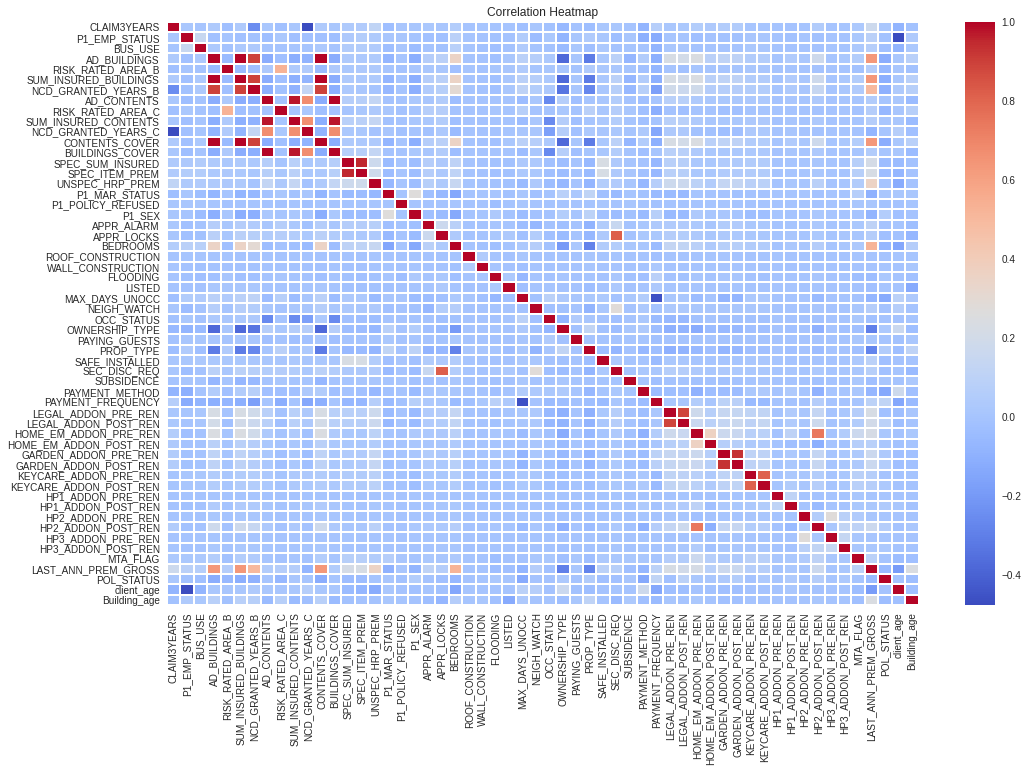

In [ ]:
#specifying the gigure size
plt.figure(figsize=(15, 10))

# Using Seaborn to create a heatmap
sns.heatmap(df_clean.corr(), annot=False, fmt='.2f', cmap='coolwarm', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# finding the correlation of your DataFrame
correlation_matrix = df_clean.corr()

# Filter the correlation matrix based on the threshold
threshold = 0.9
highly_correlated = correlation_matrix.abs() >= threshold
correlation_matrix_filtered = correlation_matrix.mask(~highly_correlated)

# Flatten the filtered correlation matrix into a DataFrame
filtered_values = correlation_matrix_filtered.unstack().dropna()
filtered_values = filtered_values[filtered_values != 1]  # Exclude diagonal values

# Create a DataFrame to display the filtered correlation values
table_df = pd.DataFrame(filtered_values, columns=['Correlation'])

# Display the table
#print(table_df)

In [ ]:
table_df

Correlation
AD_BUILDINGS          SUM_INSURED_BUILDINGS     0.997303
SUM_INSURED_BUILDINGS AD_BUILDINGS              0.997303
                      CONTENTS_COVER            0.997303
AD_CONTENTS           SUM_INSURED_CONTENTS      0.973645
SUM_INSURED_CONTENTS  AD_CONTENTS               0.973645
                      BUILDINGS_COVER           0.973645
CONTENTS_COVER        SUM_INSURED_BUILDINGS     0.997303
BUILDINGS_COVER       SUM_INSURED_CONTENTS      0.973645
SPEC_SUM_INSURED      SPEC_ITEM_PREM            0.952683
SPEC_ITEM_PREM        SPEC_SUM_INSURED          0.952683
GARDEN_ADDON_PRE_REN  GARDEN_ADDON_POST_REN     0.926434
GARDEN_ADDON_POST_REN GARDEN_ADDON_PRE_REN      0.926434

<Axes: xlabel='APPR_LOCKS', ylabel='LAST_ANN_PREM_GROSS'>

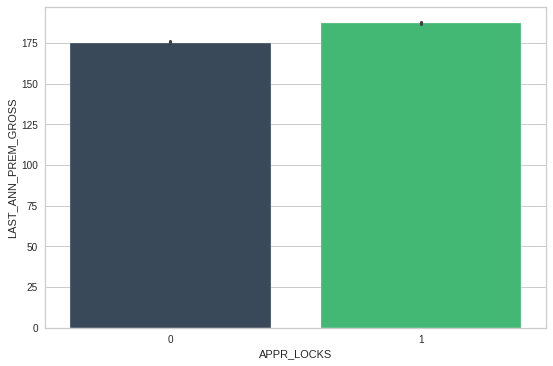

In [ ]:
#plotting box plot between 'APPR_LOCKS' and 'LAST_ANN_PREM_GROSS'
sns.barplot(x='APPR_LOCKS', y='LAST_ANN_PREM_GROSS', data=df_clean)


# MODEL DEVELOPMENT

In [ ]:
X = df_clean.drop(['LAST_ANN_PREM_GROSS'], axis = 1)
y = df_clean[['LAST_ANN_PREM_GROSS']]
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [ ]:
l1=[]
l2=[]
l3=[]
cvs = 0
for i in range (40,50):
    xtrain, xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=i)
    lrmodel=LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs=(cross_val_score(lrmodel,X,y,cv = 5,)).mean()
    l3.append(cvs)
    df_rand=pd.DataFrame({'train acc':l1,'test cc':l2, 'cvs':l3})

df_rand

,train acc,test cc,cvs
0,0.713342,0.715403,0.713492
1,0.713128,0.716284,0.713492
2,0.713608,0.714384,0.713492
3,0.713845,0.713430,0.713492
4,0.712944,0.716986,0.713492
5,0.713641,0.714145,0.713492
6,0.713344,0.715398,0.713492
7,0.713323,0.715509,0.713492
8,0.713195,0.716035,0.713492
9,0.715095,0.708389,0.713492


We will choose our random state as 44 as it is the one with the best test accuracy.

## Linear Regression

In [ ]:
#Linear Regression
xtrain,xtest,ytrain,ytest,train_test_split(X,y,test_size=0.2,random_state=44)
lrmodel = LinearRegression()
lrmodel.fit(xtrain,ytrain)
#print('Linear Regression:')
lr_train = lrmodel.score(xtrain,ytrain)
lr_test = lrmodel.score(xtest,ytest)
lr_cv = cross_val_score(lrmodel,X,y,cv=5,).mean()
print("r2_Train:",lr_train)
print(" r2_Test:",lr_test)
print("r2_cv:",lr_cv)

r2_Train: 0.7150949001885878
 r2_Test: 0.7083894100268554
r2_cv: 0.7134920214244954


In [ ]:
# Make predictions on the test set
y_pred = lrmodel.predict(xtest)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(ytest, y_pred)

# Print the evaluation metrics
print("MAE:", mae)
print("MSE:", mse)

MAE: 36.36757825519042
MSE: 2282.0533276687197


## Ridge Regression

In [ ]:
# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)
ridge_train_r2 = ridge_model.score(xtrain, ytrain)
ridge_test_r2 = ridge_model.score(xtest, ytest)
ridge_cv_r2 = cross_val_score(ridge_model, X, y, cv=5).mean()

In [ ]:
print("\nRidge Regression:")
print("Train R-squared:", ridge_train_r2)
print("Test R-squared:", ridge_test_r2)
print("Cross-validation R-squared:", ridge_cv_r2)


Ridge Regression:
Train R-squared: 0.7150943998431509
Test R-squared: 0.708398628384702
Cross-validation R-squared: 0.7134930440998389


In [ ]:
# Make predictions on the test set
y_pred_ridge = ridge_model.predict(xtest)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, y_pred_ridge)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(ytest, y_pred_ridge)

# Print the evaluation metrics
print("MAE:", mae)
print("MSE:", mse)

MAE: 36.36782745201656
MSE: 2281.9811876816175


## Lasso Regression

In [ ]:
# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)
lasso_train_r2 = lasso_model.score(xtrain, ytrain)
lasso_test_r2 = lasso_model.score(xtest, ytest)
lasso_cv_r2 = cross_val_score(lasso_model, X, y, cv=5).mean()


In [ ]:
print("\nLasso Regression:")
print("Train R-squared:", lasso_train_r2)
print("Test R-squared:", lasso_test_r2)
print("Cross-validation R-squared:", lasso_cv_r2)


Lasso Regression:
Train R-squared: 0.7038551533379049
Test R-squared: 0.6985153471340384
Cross-validation R-squared: 0.7026856786776378


In [ ]:
# Make predictions on the test set
y_pred_lasso = lasso_model.predict(xtest)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, y_pred_lasso)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(ytest, y_pred_lasso)

# Print the evaluation metrics
print("MAE:", mae)
print("MSE:", mse)

MAE: 36.98425482212542
MSE: 2359.324657507044


### Random Forest

https://www.geeksforgeeks.org/random-forest-regression-in-python/

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor(random_state=47)
rfmodel.fit(xtrain,ytrain)
ypredtrain2= rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print("Train: ",r2_score(ytrain,ypredtrain2))
print("Test: ",r2_score(ytest,ypredtest2))
print("cv: ",cross_val_score(rfmodel,X,y,cv=5,).mean())


Train:  0.9742964883580812
Test:  0.8140230551763915
cv:  0.8164632338737003


In [ ]:
print("Train MSE:", mean_squared_error(ytrain, ypredtrain2))
print("Test MSE:", mean_squared_error(ytest, ypredtest2))
#print("CV MSE:", -cross_val_score(rfmodel, X, y, cv=5, scoring="neg_mean_squared_error").mean())

Train MSE: 198.90251045285288
Test MSE: 1455.3974389046123


In [ ]:
print("Train MAE:", mean_absolute_error(ytrain, ypredtrain2))
print("Test MAE:", mean_absolute_error(ytest, ypredtest2))
#print("CV MAE:", -cross_val_score(rfmodel, X, y, cv=5, scoring="neg_mean_absolute_error").mean())

Train MAE: 9.659660253867358
Test MAE: 26.322764212594702


#### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Expand the range of values
    'max_depth': [None, 5, 10, 15],  # Example of including max_depth
    'min_samples_split': [2, 5, 10],  # Example of including min_samples_split
    'min_samples_leaf': [1, 2, 4],  # Example of including min_samples_leaf
    'max_features': ['auto', 'sqrt', 'log2']  # Example of including max_features
}

estimator = RandomForestRegressor(random_state=44)
grid = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid.fit(xtrain, ytrain)
print("Best parameters:", grid.best_params_)

rfmodel = RandomForestRegressor(random_state=44, **grid.best_params_)  # Use the best parameters
rfmodel.fit(xtrain, ytrain)
ypredtrain2 = rfmodel.predict(xtrain)
ypredtest2 = rfmodel.predict(xtest)
print("Train R^2:", r2_score(ytrain, ypredtrain2))
print("Test R^2:", r2_score(ytest, ypredtest2))




Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Train R^2: 0.974290506806863
Test R^2: 0.807749293852517


In [ ]:
print("CV R^2:", cross_val_score(rfmodel, X, y, cv=5, scoring="r2").mean())


CV R^2: 0.8117092355953055


In [ ]:
print("Train MSE:", mean_squared_error(ytrain, ypredtrain2))
print("Test MSE:", mean_squared_error(ytest, ypredtest2))
#

Train MSE: 198.94879772948116
Test MSE: 1504.4939340197775


In [ ]:
print("CV MSE:", -cross_val_score(rfmodel, X, y, cv=5, scoring="neg_mean_squared_error").mean())


CV MSE: 1460.2307023482194


In [ ]:
print("Train MAE:", mean_absolute_error(ytrain, ypredtrain2))
print("Test MAE:", mean_absolute_error(ytest, ypredtest2))
#

Train MAE: 9.88418316948905
Test MAE: 27.150694764457533


In [ ]:
print("CV MAE:", -cross_val_score(rfmodel, X, y, cv=5, scoring="neg_mean_absolute_error").mean())

CV MAE: 26.834676853142252


## KNN

In [ ]:
# KNN
knnmodel = KNeighborsRegressor()
knnmodel.fit(xtrain, ytrain)
ypredtrain_knn = knnmodel.predict(xtrain)
ypredtest_knn = knnmodel.predict(xtest)
knn_train_r2 = r2_score(ytrain, ypredtrain_knn)
knn_test_r2 = r2_score(ytest, ypredtest_knn)
knn_cv_r2 = cross_val_score(knnmodel, X, y, cv=5).mean()
knn_train_mae = mean_absolute_error(ytrain, ypredtrain_knn)
knn_test_mae = mean_absolute_error(ytest, ypredtest_knn)
knn_train_mse = mean_squared_error(ytrain, ypredtrain_knn)
knn_test_mse = mean_squared_error(ytest, ypredtest_knn)

In [ ]:
print("\nKNN:")
print("Train R-squared:", knn_train_r2)
print("Test R-squared:", knn_test_r2)
print("Cross-validation R-squared:", knn_cv_r2)
print("Train MAE:", knn_train_mae)
print("Test MAE:", knn_test_mae)
print("Train MSE:", knn_train_mse)
print("Test MSE:", knn_test_mse)


KNN:
Train R-squared: 0.7761027222828979
Test R-squared: 0.6555874534735061
Cross-validation R-squared: 0.6571385546175876
Train MAE: 29.28050993281135
Test MAE: 36.543996508398365
Train MSE: 1732.5932441411228
Test MSE: 2695.26493521386


## SVR

In [ ]:
# SVR
svrmodel = SVR()
svrmodel.fit(xtrain, ytrain)
ypredtrain_svr = svrmodel.predict(xtrain)
ypredtest_svr = svrmodel.predict(xtest)
svr_train_r2 = r2_score(ytrain, ypredtrain_svr)
svr_test_r2 = r2_score(ytest, ypredtest_svr)
svr_cv_r2 = cross_val_score(svrmodel, X, y, cv=5).mean()
svr_train_mae = mean_absolute_error(ytrain, ypredtrain_svr)
svr_test_mae = mean_absolute_error(ytest, ypredtest_svr)
svr_train_mse = mean_squared_error(ytrain, ypredtrain_svr)
svr_test_mse = mean_squared_error(ytest, ypredtest_svr)


In [ ]:
print("\nSVR:")
print("Train R-squared:", svr_train_r2)
print("Test R-squared:", svr_test_r2)
print("Cross-validation R-squared:", svr_cv_r2)
print("Train MAE:", svr_train_mae)
print("Test MAE:", svr_test_mae)
print("Train MSE:", svr_train_mse)
print("Test MSE:", svr_test_mse)


SVR:
Train R-squared: 0.004686583544560641
Test R-squared: 0.006344354597614177
Cross-validation R-squared: 0.005014551138551382
Train MAE: 68.6930906045337
Test MAE: 69.0582999696267
Train MSE: 7702.073552375275
Test MSE: 7776.038491455858


## Decision Tree

In [ ]:
# Decision Tree
dtmodel = DecisionTreeRegressor()
dtmodel.fit(xtrain, ytrain)
ypredtrain_dt = dtmodel.predict(xtrain)
ypredtest_dt = dtmodel.predict(xtest)
dt_train_r2 = r2_score(ytrain, ypredtrain_dt)
dt_test_r2 = r2_score(ytest, ypredtest_dt)
dt_cv_r2 = cross_val_score(dtmodel, X, y, cv=5).mean()
dt_train_mae = mean_absolute_error(ytrain, ypredtrain_dt)
dt_test_mae = mean_absolute_error(ytest, ypredtest_dt)
dt_train_mse = mean_squared_error(ytrain, ypredtrain_dt)
dt_test_mse = mean_squared_error(ytest, ypredtest_dt)

In [ ]:
# Print the results
print("Decision Tree:")
print("Train R-squared:", dt_train_r2)
print("Test R-squared:", dt_test_r2)
print("Cross-validation R-squared:", dt_cv_r2)
print("Train MAE:", dt_train_mae)
print("Test MAE:", dt_test_mae)
print("Train MSE:", dt_train_mse)
print("Test MSE:", dt_test_mse)

Decision Tree:
Train R-squared: 0.999975858723056
Test R-squared: 0.6383165922813178
Cross-validation R-squared: 0.6331650490242691
Train MAE: 0.003297137869009429
Test MAE: 36.34019150905965
Train MSE: 0.18681340731139567
Test MSE: 2830.4212965070756


## Gradient Boosting

In [ ]:
# Gradient Boosting
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3 = gbmodel.predict(xtest)
print("Train:",r2_score(ytrain,ypredtrain3))
print("Test:",r2_score(ytest,ypredtest3))


Train: 0.799974651427612
Test: 0.7934612956113044


In [ ]:
print("cv:",cross_val_score(gbmodel,X,y,cv=5,).mean())

cv: 0.7983966655529151


In [ ]:
print("Train MSE:", mean_squared_error(ytrain, ypredtrain3))
print("Test MSE:", mean_squared_error(ytest, ypredtest3))
print("CV MSE:", -cross_val_score(rfmodel, X, y, cv=5, scoring="neg_mean_squared_error").mean())

Train MSE: 1547.8641416595515
Test MSE: 1616.3073422196892
CV MSE: 1460.2307023482194


In [ ]:
print("Train MAE:", mean_absolute_error(ytrain, ypredtrain3))
print("Test MAE:", mean_absolute_error(ytest, ypredtest3))
print("CV MAE:", -cross_val_score(rfmodel, X, y, cv=5, scoring="neg_mean_absolute_error").mean())

Train MAE: 28.1637564419866
Test MAE: 28.651238652514348
CV MAE: 26.834676853142252


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Expand the range of values
    'learning_rate': [0.01, 0.1, 0.5],  # Expand the range of values
    'max_depth': [3, 5, 7],  # Example of including max_depth
    'min_samples_split': [2, 5, 10],  # Example of including min_samples_split
    'min_samples_leaf': [1, 2, 4],  # Example of including min_samples_leaf
    'max_features': ['auto', 'sqrt', 'log2']  # Example of including max_features
}

estimator = GradientBoostingRegressor()
grid = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid.fit(xtrain, ytrain)
print("Best parameters:", grid.best_params_)

gbmodel = GradientBoostingRegressor(**grid.best_params_)  # Use the best parameters
gbmodel.fit(xtrain, ytrain)
ypredtrain3 = gbmodel.predict(xtrain)
ypredtest3 = gbmodel.predict(xtest)
print("Train R^2:", r2_score(ytrain, ypredtrain3))
print("Test R^2:", r2_score(ytest, ypredtest3))


Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Train R^2: 0.8478607643566114
Test R^2: 0.8241979131520115


In [ ]:
print("CV R^2:", cross_val_score(gbmodel, X, y, cv=5, scoring="r2").mean())

CV R^2: 0.8279947418423627


In [ ]:
print("Train MSE:", mean_squared_error(ytrain, ypredtrain3))
print("Test MSE:", mean_squared_error(ytest, ypredtest3))
#print("CV MSE:", -cross_val_score(rfmodel, X, y, cv=5, scoring="neg_mean_squared_error").mean())

Train MSE: 1177.3051219389388
Test MSE: 1375.772180768553


In [ ]:
print("CV MSE:", -cross_val_score(rfmodel, X, y, cv=5, scoring="neg_mean_squared_error").mean())

CV MSE: 1460.2307023482194


In [ ]:
print("Train MAE:", mean_absolute_error(ytrain, ypredtrain3))
print("Test MAE:", mean_absolute_error(ytest, ypredtest3))

Train MAE: 24.129628520273645
Test MAE: 25.748597766771265


In [ ]:
print("CV MAE:", -cross_val_score(rfmodel, X, y, cv=5, scoring="neg_mean_absolute_error").mean())

CV MAE: 26.834676853142252


### XGBoost Regressor


In [ ]:
#pip install xgboost
from xgboost import XGBRegressor

In [ ]:
xgbmodel=XGBRegressor()
xgbmodel.fit(xtrain,ytrain)
ypredtrain4=xgbmodel.predict(xtrain)
ypredtest4=xgbmodel.predict(xtest)
#print("Train:",r2_score(ytrain,ypredtrain4))
#print("Test:",r2_score(ytest,ypredtest4))
#print("cv:",cross_val_score(xgmodel,X,y,cv=5,).mean())

# Evaluate the model
print("Train R^2:", r2_score(ytrain, ypredtrain4))
print("Test R^2:", r2_score(ytest, ypredtest4))

Train R^2: 0.8555795658481669
Test R^2: 0.827284842908564


In [ ]:
# Perform cross-validation
cv_score = cross_val_score(xgbmodel, X, y, cv=5, scoring="r2")
print("CV R^2:", cv_score.mean())

CV R^2: 0.8307204925021576


In [ ]:
print("Train MSE:", mean_squared_error(ytrain, ypredtrain4))
print("Test MSE:", mean_squared_error(ytest, ypredtest4))
#

Train MSE: 1117.5744121532077
Test MSE: 1351.6148333832307


In [ ]:
print("CV MSE:", -cross_val_score(xgbmodel, X, y, cv=5, scoring="neg_mean_squared_error").mean())

CV MSE: 1312.7882430019283


In [ ]:
print("Train MAE:", mean_absolute_error(ytrain, ypredtrain4))
print("Test MAE:", mean_absolute_error(ytest, ypredtest4))
#

Train MAE: 23.461113428172453
Test MAE: 25.442390162873217


In [ ]:
print("CV MAE:", -cross_val_score(xgbmodel, X, y, cv=5, scoring="neg_mean_absolute_error").mean())

CV MAE: 25.15008914182003


#### Hyperparameter tuning

In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],  # Expand the range of values
    'max_depth': [3, 5, 7],  # Expand the range of values
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],  # Adjust the range of values
    'learning_rate': [0.01, 0.1, 0.2]  # Example of including learning_rate
}

estimator = XGBRegressor()
grid = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid.fit(xtrain, ytrain)
print("Best parameters:", grid.best_params_)

xgbmodel = XGBRegressor(**grid.best_params_)  # Use the best parameters
xgbmodel.fit(xtrain, ytrain)
ypredtrain4 = xgbmodel.predict(xtrain)
ypredtest4 = xgbmodel.predict(xtest)
print("Train R^2:", r2_score(ytrain, ypredtrain4))
print("Test R^2:", r2_score(ytest, ypredtest4))
print("CV R^2:", cross_val_score(xgbmodel, X, y, cv=5, scoring="r2").mean())

Best parameters: {'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Train R^2: 0.8802788395277767
Test R^2: 0.8324482701511431
CV R^2: 0.8351082533426144


In [ ]:
print("Train MSE:", mean_squared_error(ytrain, ypredtrain4))
print("Test MSE:", mean_squared_error(ytest, ypredtest4))
print("CV MSE:", -cross_val_score(xgbmodel, X, y, cv=5, scoring="neg_mean_squared_error").mean())

Train MSE: 926.443036422256
Test MSE: 1311.2074657283445
CV MSE: 1278.7731541537253


In [ ]:
print("Train MAE:", mean_absolute_error(ytrain, ypredtrain4))
print("Test MAE:", mean_absolute_error(ytest, ypredtest4))


Train MAE: 21.3901263067753
Test MAE: 24.890610767745418


In [ ]:
print("CV MAE:", -cross_val_score(xgbmodel, X, y, cv=5, scoring="neg_mean_absolute_error").mean())

CV MAE: 24.656270336510477


## FINAL MODEL BASED ON THE IMPORTANT FEATURES

In [ ]:
import shap

In [ ]:
# load JS visualization code to notebook
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(xgbmodel)
shap_values=explainer.shap_values(xtest)

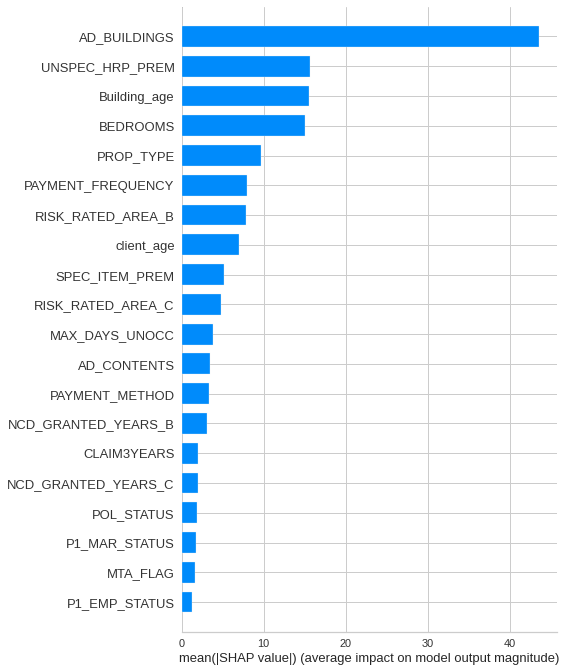

In [ ]:
shap.summary_plot(shap_values, xtest,plot_type="bar")

### Making the above feature importance plot bigger

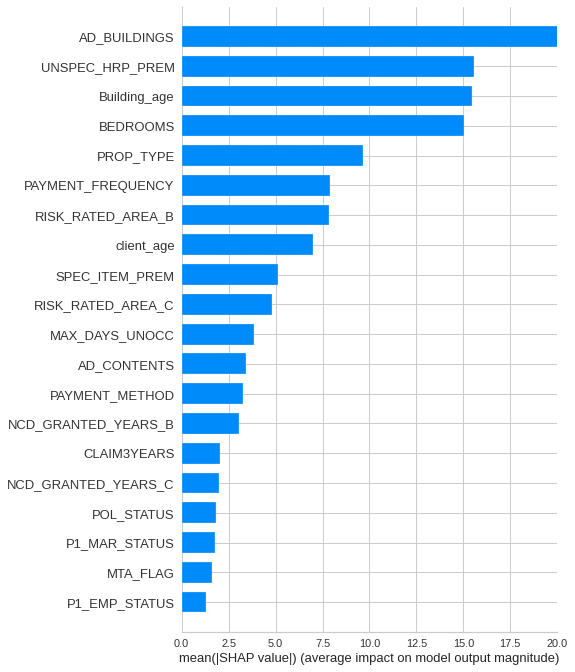

In [ ]:
# Generate the SHAP summary plot
shap.summary_plot(shap_values, xtest, plot_type="bar", show=False)

# Adjust the x-axis scale
plt.xlim([0.0, 20.0])  # Replace xmin and xmax with the desired range of values

# Show the plot
plt.show()

In [ ]:
df_final = df_clean.drop(df_clean[['BUS_USE','SUM_INSURED_BUILDINGS','SUM_INSURED_CONTENTS', 'CONTENTS_COVER',
'BUILDINGS_COVER', 'P1_POLICY_REFUSED', 'P1_SEX',
'APPR_ALARM', 'APPR_LOCKS', 'ROOF_CONSTRUCTION',
'WALL_CONSTRUCTION', 'FLOODING', 'LISTED',
'NEIGH_WATCH', 'OCC_STATUS', 'OWNERSHIP_TYPE', 'PAYING_GUESTS',
'SAFE_INSTALLED', 'SEC_DISC_REQ', 'SUBSIDENCE',
'LEGAL_ADDON_PRE_REN','LEGAL_ADDON_POST_REN', 'HOME_EM_ADDON_PRE_REN',
'HOME_EM_ADDON_POST_REN', 'GARDEN_ADDON_PRE_REN',
'GARDEN_ADDON_POST_REN', 'KEYCARE_ADDON_PRE_REN',
'KEYCARE_ADDON_POST_REN', 'HP1_ADDON_PRE_REN', 'HP1_ADDON_POST_REN',
'HP2_ADDON_PRE_REN', 'HP2_ADDON_POST_REN', 'HP3_ADDON_PRE_REN',
'HP3_ADDON_POST_REN','SPEC_SUM_INSURED']],axis=1)

In [ ]:
df_final

,CLAIM3YEARS,P1_EMP_STATUS,AD_BUILDINGS,RISK_RATED_AREA_B,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,NCD_GRANTED_YEARS_C,SPEC_ITEM_PREM,UNSPEC_HRP_PREM,...,BEDROOMS,MAX_DAYS_UNOCC,PROP_TYPE,PAYMENT_METHOD,PAYMENT_FREQUENCY,MTA_FLAG,LAST_ANN_PREM_GROSS,POL_STATUS,client_age,Building_age
0,0,0,1,19.00000,7.0,1,6.000000,7.0,3.628563,0.734073,...,3.0,0.0,10.0,0,0.0,0,274.81,0,68,47
1,0,1,1,21.00000,6.0,1,9.000000,7.0,-0.335136,2.007263,...,3.0,0.0,2.0,0,0.0,1,308.83,1,40,48
2,0,1,0,10.27444,0.0,1,12.000000,7.0,-0.335136,-0.570555,...,2.0,0.0,9.0,0,0.0,1,52.65,1,60,61
3,0,0,0,10.27444,0.0,1,14.000000,7.0,-0.335136,-0.570555,...,2.0,0.0,19.0,1,0.0,0,54.23,1,82,137
4,0,0,1,5.00000,7.0,1,10.000000,7.0,-0.335136,1.506370,...,3.0,0.0,1.0,2,0.0,0,244.58,1,71,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256131,1,0,1,16.00000,2.0,1,10.000000,2.0,-0.335136,1.426730,...,3.0,0.0,2.0,0,1.0,0,235.08,0,68,25
256132,0,0,1,0.00000,5.0,1,0.000000,5.0,-0.335136,2.236752,...,3.0,0.0,1.0,1,1.0,1,194.02,1,72,20
256133,0,0,1,1.00000,5.0,1,18.000000,5.0,-0.335136,-0.570555,...,3.0,0.0,19.0,0,1.0,0,287.30,1,61,106
256134,0,0,1,21.00000,5.0,0,9.055649,0.0,-0.335136,-0.570555,...,5.0,0.0,19.0,2,1.0,0,402.33,0,67,104


In [ ]:
df_final.shape

(189021, 21)

In [ ]:
df_final.columns

Index(['CLAIM3YEARS', 'P1_EMP_STATUS', 'AD_BUILDINGS', 'RISK_RATED_AREA_B',
       'NCD_GRANTED_YEARS_B', 'AD_CONTENTS', 'RISK_RATED_AREA_C',
       'NCD_GRANTED_YEARS_C', 'SPEC_ITEM_PREM', 'UNSPEC_HRP_PREM',
       'P1_MAR_STATUS', 'BEDROOMS', 'MAX_DAYS_UNOCC', 'PROP_TYPE',
       'PAYMENT_METHOD', 'PAYMENT_FREQUENCY', 'MTA_FLAG',
       'LAST_ANN_PREM_GROSS', 'POL_STATUS', 'client_age', 'Building_age'],
      dtype='object')

In [ ]:
Xf=df_final
y=df_final[['LAST_ANN_PREM_GROSS']]
xtrain,xtest,ytrain,ytest=train_test_split(Xf,y,test_size=0.2,random_state=44)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain9=finalmodel.predict(xtrain)
ypredtest9=finalmodel.predict(xtest)
print("Train r2:",r2_score(ytrain,ypredtrain9))
print("Test r2:",r2_score(ytest,ypredtest9))

Train r2: 0.9990688849281943
Test r2: 0.9991164754521205


In [ ]:
print("CV r2:",cross_val_score(finalmodel,Xf,y,cv=5,).mean())

CV r2: 0.9990803962659843


In [ ]:
print("Train MSE:", mean_squared_error(ytrain, ypredtrain9))
print("Test MSE:", mean_squared_error(ytest, ypredtest9))
print("CV MSE:", -cross_val_score(finalmodel, Xf, y, cv=5, scoring="neg_mean_squared_error").mean())

Train MSE: 7.2035019077362765
Test MSE: 6.921120036181645
CV MSE: 7.133883299748


In [ ]:
print("Train MAE:", mean_absolute_error(ytrain, ypredtrain9))
print("Test MAE:", mean_absolute_error(ytest, ypredtest9))
print("CV MAE:", -cross_val_score(finalmodel, Xf, y, cv=5, scoring="neg_mean_absolute_error").mean())

Train MAE: 1.894121072634152
Test MAE: 1.8817360964440724
CV MAE: 1.8952610373932397


## Predicted values against Actual Values using XGBoost

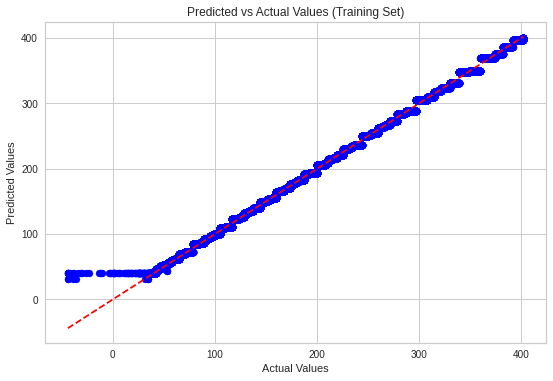

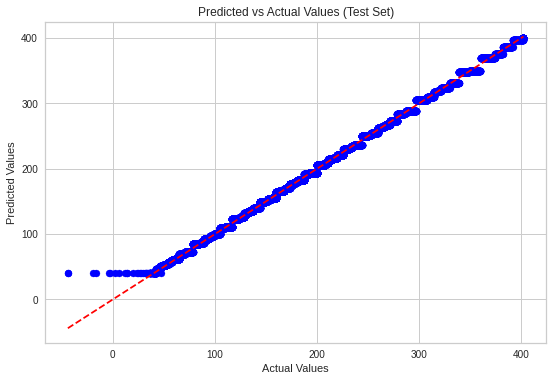

In [ ]:
import matplotlib.pyplot as plt

# Plotting predicted values against actual values for the training set
plt.scatter(ytrain, ypredtrain9, color='blue')
plt.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Training Set)')
plt.show()

# Plotting predicted values against actual values for the test set
plt.scatter(ytest, ypredtest9, color='blue')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Test Set)')
plt.show()

## Saving the model

In [ ]:
from pickle import dump
dump(finalmodel,open('homeinsurancemodelf.pkl','wb'))